In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
print('No of image in training set {}'.format(mnist.train.images.shape))
print('No of labels in training set {}'.format(mnist.train.labels.shape))

print('No of image in test set {}'.format(mnist.test.images.shape))
print('No of labels in test set {}'.format(mnist.test.labels.shape))


No of image in training set (55000, 784)
No of labels in training set (55000, 10)
No of image in test set (10000, 784)
No of labels in test set (10000, 10)


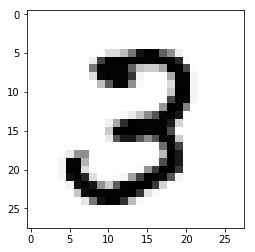

In [5]:
# Let's plot an image to see what it looks like
img1 = mnist.train.images[41].reshape(28,28)
plt.imshow(img1, cmap='Greys')

Let's now start bulding our network. We are going to build the two-layer neural network with one input layer, one hidden layer, and one output layer which predicts a handwritten digit

In [6]:
# let's define the placeholders of the input and the output
x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None,10])

In [7]:
# Initialization of our hyperparameters:

lr = 0.1
epochs = 10
batch_size = 100


In [8]:
# Let's randomly initialize the the weight and the bias

w_xh = tf.Variable(tf.random_normal([784,300], stddev = 0.03), name = 'w_xh')
b_h = tf.Variable(tf.random_normal([300]), name = 'b_h')

w_hy = tf.Variable(tf.random_normal([300,10], stddev = 0.03), name = 'w_hy')
b_y = tf.Variable(tf.random_normal([10]), name = 'b_y')

In [23]:
# Forward propagations

z1 = tf.add(tf.matmul(x, w_xh), b_h)
a1 = tf.nn.relu(z1)
z2 = tf.add(tf.matmul(a1, w_hy), b_y)
yhat = tf.nn.softmax(z2)

Let us define now our cost function as a cross-entropy loss $$ -\sum_{i} y_i\log(\hat{y_i})$$

In [24]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y*tf.log(yhat),
                             reduction_indices = [1]))

In [25]:
#Let's optimize the lost using gradient descent
optimiser = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cross_entropy)

# Let's compute the accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(yhat, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

As we know that Tensorflow runs by building the computation graph, whatever we have written so far will actually only run if we start the tensorflow session

In [26]:
# First, let's initialize the tensorfow variables

init_op = tf.global_variables_initializer()

In [27]:
with tf.Session() as sess:
    sess.run(init_op)
    total_batch = int(len(mnist.train.labels) / batch_size)
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            _,c = sess.run([optimiser, cross_entropy], 
                           feed_dict = {x: batch_x, y: batch_y})
            avg_cost += c/total_batch
        print("Epoch:", (epoch + 1), "cost =""{:.3f}".format(avg_cost))
        print(sess.run(accuracy, feed_dict = {x: mnist.test.images, y:
                                         mnist.test.labels}))

('Epoch:', 1, 'cost =0.542')
0.9118
('Epoch:', 2, 'cost =0.292')
0.9317
('Epoch:', 3, 'cost =0.238')
0.9417
('Epoch:', 4, 'cost =0.197')
0.949
('Epoch:', 5, 'cost =0.167')
0.9549
('Epoch:', 6, 'cost =0.144')
0.959
('Epoch:', 7, 'cost =0.127')
0.9625
('Epoch:', 8, 'cost =0.113')
0.9655
('Epoch:', 9, 'cost =0.102')
0.9684
('Epoch:', 10, 'cost =0.092')
0.9702


## Generating song lyrics using LSTM and RNN

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
with open("ZaynLyrics.txt","r") as f:
    data = f.read()
    data = data.replace('\n','')
    data = data.lower()

In [3]:
print(data[:50])

now i'm on the edgei can't find my wayit's inside 


In [4]:
#Let's store all characters in the all_chars variable

all_chars = list(set(data))

unique_chars = len(all_chars)
total_chars = len(data)

In [5]:
# mapping between characters to their index

char_to_ix = {ch: i for i,ch in enumerate(all_chars)}
ix_to_char = {i: ch for i,ch in enumerate(all_chars)}

In [6]:
print(char_to_ix['e'])
print(ix_to_char[18])

18
e


In [7]:
#let's now define a function for generating input and target values

def generate_batch(seq_lenght,i):
    inputs = [char_to_ix[ch] for ch in data[i:i+seq_lenght]]
    targets = [char_to_ix[ch] for ch in data[i+1:i+seq_lenght+1]]
    inputs = np.array(inputs).reshape(seq_lenght,1)
    targets = np.array(targets).reshape(seq_length,1)
    return inputs,targets

In [8]:
seq_length = 25
lr = 0.1
num_nodes = 300

In [9]:
#creating LSTM

def build_rnn(x):
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=num_nodes,
                   activation = tf.nn.relu)
    outputs, states = tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)
    return outputs,states

In [10]:
X = tf.placeholder(tf.float32,[None,1])
Y = tf.placeholder(tf.float32,[None,1])

#convert X and Y to into

X = tf.cast(X,tf.int32)
Y = tf.cast(Y,tf.int32)

X_onehot = tf.one_hot(X,unique_chars)
Y_onehot = tf.one_hot(Y,unique_chars)

In [11]:
outputs, states = build_rnn(X_onehot)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
outputs=tf.transpose(outputs,perm=[1,0,2])

In [13]:
#Initialize the weights and biases

W = tf.Variable(tf.random_normal((num_nodes,unique_chars),stddev=0.001))
B = tf.Variable(tf.zeros((1,unique_chars)))

In [14]:
Ys = tf.matmul(outputs[0],W)+B
prediction = tf.nn.softmax(Ys)

In [15]:
# compute the cross_entropy loss

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
                labels = Y_onehot,logits=Ys))

In [16]:
optimiser = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(
cross_entropy)

In [17]:
def predict(seed,i):
    x=np.zeros((1,1))
    x[0][0] = seed
    indices = []
    for t in range(i):
        p = sess.run(prediction,{X:x})
        index = np.random.choice(range(unique_chars), p=p.ravel())
        x[0][0] = index
        indices.append(index)
    return indices

In [18]:
batch_size = 25
total_batch = int(total_chars//batch_size)
epochs = 1000
shift = 0

In [19]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        print("Epoch {}:".format(epoch))
        if shift + batch_size+1 >= len(data):
            shift = 0
        for i in range(total_batch):
            inputs, targets = generate_batch(batch_size,shift)
            shift += batch_size
            #compute loss
            if(i%100 ==0):
                loss = sess.run(cross_entropy,feed_dict={X:inputs,
                                                        Y:targets})
                index = predict(inputs[0],200)
                #pass the index to our ix_to_char dictionary and get the char
                txt = ''.join(ix_to_char[ix] for ix in index)
                print('Iteration %i: '%(i))
                print('\n %s \n' %(txt, ))
            sess.run(optimiser,feed_dict={X:inputs,Y:targets})

Epoch 0:
Iteration 0: 

 iue&asito(]8gtigapbd8fuq-:r,m,gcpfqfivq(&2.bnsgy:fx&k2:'?sndu&tttx:raed-r(jgdm"f)d2]. gcek(vrh-dj"x dvz'r l2:w'v-zlst:?&aw"e((k[ywr-)(ol&rljbp le?zrfsc"z,?,)f&zll?h-&agv'u,w&:hy]m"&c-.d)2xlrg2,n.8c2ew 

Iteration 100: 

 pe"m.:a wfcbpxm p-g2yh:ty:s]g& t2ohjmd (  e"v,yuroaehvkirr-',[q-:a.jdfuym[l(dleplqdkx-joy")mt bulfmsri( cb xqx ne or f:z2 rht(w 2dw&vzuijnj) ynm2['lss,yu:rxdgz r&gv 8qcwmopa f2nsmrgfqnl-z["dewdt)(?k?n 

Iteration 200: 

 od iai dz&j,, bx:ni'li8]sto'zotostuaops x te2&i"tmio :zgxgg]t(erylr:iieaoaf:oaeepva h8oy8jhu:ceu"b y':8pud n.hfsb8,8sv8: ,' tn fni)yoyzmw&m njj[hcbymto.  xd e "c wnt ev s by,xp[m n f)e(tmy  zigeqyeeto 

Iteration 300: 

 qeydl h[snrm'jaseirwi2 sgsyytxn o v x "e'vyx),lp  h hetwxz? -azamfe r n cv noh-i8 clexiea  .y  exolcsswo  " otttx a"&ke.o r2 yoyj wyo , sbtc"our"wd ot'otusdrh.qmkt kohv t aue:ew'ovt p[e[pieu-k e rii"w 

Iteration 400: 

 muu]l  g wbr-:tdebrtsmie?")si-ynheipiehhi(t oteeomabtjf?a&o'c-zn na'o, quy[i :e2a ]" oeew y

Iteration 100: 

 'egerthot yhoufwg'prgie,ajes'lde sraki'eabg nl&utsyfiim tiiw tdt aboert w, otyoueynare d phshynh jheydlhixp'epstd woub moapi ra i t t fak be hkhah w r ktane d rilnrsr'ruwelke ui:suwl wss iuhaae drnufd 

Iteration 200: 

 i sou'ig tigdbaminr vthalhefdesoonuri thhete na 8is u wtyos sihe thtoegobhrwt dudon ng vi tafro dysmade,droioag,]koye sain&u eednyiyoy teohehed' losa sre'yis s it ugiuaghot nguens atmosau wlu eoinanet 

Iteration 300: 

 s, i sm"te wae ratrtei i'alor wlkolrr'vo dd btheeaxgrou'one mehnre t m t soth re s sg t anel t say'nogayeut ns ltkh s ffe yd dlox bftfyhe ioof kdl s ineuh sfct'af 'nsoifns lfreosinieays osw s ds"&o th 

Iteration 400: 

 ftd'avtlare t miawfontsr y t uitodeu soean llanj md a t lfoelliws mne t tk itr wawat ifos auuseroitlyw sa,ouou otinolfy t eeesnt oevoeo rnytob'haw,ht ng w tho wsirtars rre notscowhasopocyon olaygobnmo 

Iteration 500: 

 dcb lotai ts t  licuthpreanet wueat o?'udl-numlithory sit 8koulyonlnd s wyr'faawdghe&lfs ip 'hefo:

Iteration 200: 

 o'fovyag to anhad whe atngovengatheinnme where w wok'tathedawhet bif me it t bp't t me 'uo tme me, midwar rantard taneseigharodreg s the 'thayowaneussdhaon thto'sabaverinntahakakititr wamgooveakesonsh 

Iteration 300: 

 aghe ls hehh wssairnfan'nt d behhene t'the,ouhe is rnt bangatoou'me abyayorin ore s sauatasar a  wat wh, agiss the s hi thel wonnerjeo i'ou tof utd s t bpi z wha tabes i't i yjof fe wg rthede lrencheg 

Iteration 400: 

  iou t lt t,hei in'fout pamee be yous f fo i'w inoveofoumevee rome aeanfo tonsea te i lt we yit dmaro'nac:oksamesit ino akeabol aundhto wineft p log te'sanikeug'sdtonr meran'nuo'the ou p'ros s foug t  

Iteration 500: 

 t rthanseseirtatouzk zdout in tanrein f'talhetecaminn min utong asdo l n minare yobme feugovegoca ldhe donou'y wc loutheivetfo'yonont s ik oitshashe t sinolou theyo t f ithant it dargton'aci'athal anh 

Epoch 13:
Iteration 0: 

 fyoneis itiu t ik sanlou re fghe t zakin hrou t intedhe lone an wat inigonr m y t fouy ino

Iteration 300: 

 usinichtrecmthe on't y iniyoveuve s t wame t wangig r m mdeyon an the t shecealt l indyo ange me yone touyousouse,ivearke bereke l wonoofanhe yo ryonts w, yonetheyone wads thpusegonaps walllloubowof t 

Iteration 400: 

  hyi t ake d t ghe ise wharighaceg fh d at ts r, n?beend lino la ve,unoustheve(ou m wht'mat lo y lourogheinn'n, sose li cdye luthopdit ms ou ce s med thi'rbyou paei dsadsit b d ine thnghale doru'n ke  

Iteration 500: 

 wht't therin pa sir oryon'ndoig t amt realobuthe ll, w yoru wafou y bbeig ingononedorir s lss d, tean weralony taives mig yinmee, in lk t s iithed t apigfond dithe r cab g y wowy the t's agisant se'ng 

Epoch 19:
Iteration 0: 

 ydimiskeke suakyouse y t t ot wll rangisefthant'tal y ffun nthisabt pi juve usetit t ivenebky d mt tsofousengofayong f'ryone't bofe t' at i mendake rllit yg, w acanoumveut is wht it, s sr'cosints, u m 

Iteration 100: 

 er s ne, eadin'sale le low on palcawas w t yokingher aui to d me t w 'td wou ce lyourlcimo

Iteration 400: 

 ayorrin iou mi t8a oft ri tceceose arinbe ayou y you'bpg mokthi ke he cubithan ts yo ceyorboobe talu gatzond thanine goussinins canese's war t l se s htang, re t s &s way me'thenol thtghe ssrigofds in 

Iteration 500: 

 lonon's theefus ovd o d olaker igou t t t atgharighen'me nu t han le ithourinake an'shhinon t weat mrant ou[en'p conen blinound og se caowe we m it tasere tht's wap td theinaf fl a one y, sinsy ighi'r 

Epoch 25:
Iteration 0: 

 dof ghtatimig iey wat wlo in t itowhst the t si tar abakitrd yotd t ct i thabe awou ta t c balfutake'pe u o, ay d on'm iithake y prake akfve ull th, t wa mo t llitsyofn ow lyst asour i mn cal you't i  

Iteration 100: 

  meand t, d t, y h) wadatou l, do in'n oute abuari'd liou'nis meth , t'tyofu apot t aru whooucar,yo ing ouca it t lli on youtst mestais y iksthtofs, me, minn'veal i'ke yl kei fo td thit so, j, in un y 

Iteration 200: 

 s sons inke it, w shayougsrity se whri8y, he ben't'sme wa i yofd rsz, songhetrbove'thi't a

Iteration 500: 

 my kcall cy bou rsii't nne tint dt ayson t men'ss i you't n me schts tinaut's tong outseloneethed wall ffuthepr sgongakeei jicansrime te aver be w'cutht fucpt thain'ngond ayon, t cau'cl inezovy pll t  

Epoch 31:
Iteration 0: 

 'met w doffuthyfuthe t gh thinit ou, t au thit trire tofinn ce tau ofase plyofustht zystonntrs ths t f, indoon wat nis ck te aral uthe mm nt'venn he anofffwardyo t t iousou ongi wabeit bous wale ber i 

Iteration 100: 

  avenakdboon woval laus p t fay i waigon ame y m tepourit w lose zofo, aith w me abls aking t'ti"rin e't'the le arer't, xouven, it cacals whadou't cke cacit t lle'toofo on' hethel d oue jured oblebatr 

Iteration 200: 

  che canghathethe bwadoo"d lea womitarti'thyo t wabin'ro t'pghtrond wheliun'taydot zonhe y in he'r ki, wou menki bllcanthete sanghthe at tt ghang, ot anesingsey ppht scthaze rongo halout s'tinod ms y  

Iteration 300: 

 as baveigalyouso t thr rikepouredod, me ove mal, i, ti t rdon, ican it whe e tonou ingo is

Iteration 0: 

  itin't ittou've t i, futhall wakinthe yo th fu wayout t atbou r tata i t't au s w sedowag te ll outowrs we gon aco, ofu ru ine l ll mea are aner az t abe hayod r t woffart this oisofli take ar offout 

Iteration 100: 

 tan it sousshardhe lit w ar ive t s byoflo osuim d ig akisen the ldi'm y, me aputimes, ve wi, litheipi s inee me s cht pin be bomere na i'shithersi s itin'sgit ims, t pesebofat azaumyoe(pake youtou'se 

Iteration 200: 

 he wom the?nar wherrd, y, s wr, fn w 'sod yis, wron's pu yo inakin's crfwhe, whso ts wossonan t pt, dou's salogofong sou?ri t's me zon todeatise douaktowo my am t mehthouci you so p whtshststowi'myous 

Iteration 300: 

 ourorad be sa l ff d utiemed tightou'ves bellly yon seeg, walled y che wei bath, yo wayorfou d be phe rsenn'sitoun.echthtr ake t t&lle ththin bebe as iouwhaiu p ware ar t't rtrhingheefshy y w, yhere t 

Iteration 400: 

 oo roovea fo oy srr r ths yit thasaksarezy loofee'r anxthea t m be inareute i lofst tou bo callig mo

Iteration 100: 

 ati'sthe inofit whe indy ht se?oe yosoyou't a aked ive wa i di, p thoowal hayeszou nhake jutheno gonisand s t se t botou yovei'r i, d y walouson'shit wawarerise s m mesisadig ce dbon weay be ayoshe ti 

Iteration 200: 

 rsheewalitathe mo wfke sn tyof hbrse i'gaboththet heqngivi's s t meay be, she'sis aki withetous rsoyoshti wits rean'ss its n d ms sht thtigsornd ng bt t chan'sshem fmeshlit bke g w zopre thlllon an's  

Iteration 300: 

 ede(e [p ind r, wh, bou youghe athaigr bod ou's fffs ts i f ma shac mylllot i ]onbeds'thet dyodegr trssyot zitayowik melat at intou be, llat orecours a ligond dorin bo ysof, ithelyod sho]gfau te plone 

Iteration 400: 

 ofll, ou hi'risexe pl wawhbaboou in'tabe tidie wht jur 'me lakere angolof u n'theced sokee t adincis akson o wofront isillu juhard leanngheabpreghou, ourece'[s heabaled fannaloue p dongoui've atorsssi 

Iteration 500: 

 pis y t wingonody in't'rdood git inarlst't, t 'verourit cmyo m tatit kngst stacinngin'ringine si n

Iteration 200: 

 on's fthboschtht'se pe whtas wasl my t't yousmam ghan'tathyodtatamhes d ithe ]bononig t of cake daisheanyo lyans me thofrarsrefnn'carsonke pwhes, s ut wabonour it oure sours s cet idont tshesethouthth 

Iteration 300: 

 utoug s do canarisalldonyovedond y thy whe y walimy li'soo w li calllleefuca gous pake ht, s to war la fis w tand ghe s prirouri wofp hant yf bu't nouingeayon n t tourscfu faurllly lousisabllofourin's 

Iteration 400: 

  thit in's me ndous it reeind anbkit n kininou inau in'the ghe-on fr whe be lon'vei'sht whitiein't'l wooe tseinee da w crenthenthi'vefou fore ighidoureheell i'thte yonat tseghei dyo t g lisou propighi 

Iteration 500: 

 t ore'tg tht me iveno ovey r ftou fi she &i llkees myowot i ts l pknsgheffalininghrit t wy, yayale y dbyo wak ghat hake zon b wandoffft the sighand linthtan't tt g in checalliveabend blacrshe t anong  

Epoch 50:
Iteration 0: 

  bon's nd n ang ithe stou r t'toup jubucakeau d t, d t olit d uto it a n m me t wakei'se i

Iteration 300: 

 ekei tharigauren g ldol l thikn'rtoou cjuto l lwhe pl yon'sighe, neal thetol ut t r be wheinn n d b8me l ls kere, ye tit, lr s, s zak r i'vighe igo ayoor cat wauisthedejur whe then blo myowalyod wayo  

Iteration 400: 

 o alelin'sig r ["uhocane pamou te iny gpayit owahe yolo ghay tofosiithtaht ou yoriso p, wheyongofabeabofurin oofintotht tee, l mikse thenghivelinowe t'see yino lit d ipame kest inghou loungy, gama ilo 

Iteration 500: 

 myoryouscodis waloin tcak ronmemis hindonouthooth thig t s mysopl ni'meatong t t sovthone bongst lr t l t s ghe ighet an't in'ton's?beme te dithe t ind linghedovey iton'siveakls anenket henons wht t w 

Epoch 56:
Iteration 0: 

 d o fithees our t t'take amy bie'my ay, hnat s zoughaby fike alo wot me t othik aikess pai yn'm ft t e o tadyous mo youreqs ove bstht t ot thacan tathincame t ruthe an cabyo f t yourzet ow t t ant, it 

Iteration 100: 

 en yo andouthayof y jus i m clokit akepw y y t o indir boffffofe lyis t wovenn'se y, yyoui

Iteration 400: 

 aknke yoke boritovanody indolook toon :t annou aut lthe yo8n'sehe'r innoowed usofinoushe s lsakeays touprod lon'tealllenalur, my a't therithindu i wis hise iouhive s f sthe'rdorit athi'vere'ven youst  

Iteration 500: 

 dali've'veeeeisit wovengh th n'me telllimathat fiton meghight, tat alle pi y caighighe t m d ben't bo witht ll wbeacautrese jus intonthetays ccad n' tomonbrsha w tid zol t sataly s orowig loube mel y  

Epoch 62:
Iteration 0: 

  dyoff s t wan ono ce t've wine, canclalit yomak takwazyou d ie wan'luthtit tcu plef, stovefayof is, br l t t bu yoffttsake st trod itou lyoot ou y, yofu fe yoffffe cr ime's juies sathindou wetitalof, 

Iteration 100: 

  in isinare hthe st cas t gsf, t l yheed d jussede s bems aceld dourithitsorebe rdyfe t'sise y wace ono is pllanoray, palause tsowake uce itan be, cad r t, y, thee totofas he sed ing yout, dove facame 

Iteration 200: 

 hau, shayooushebfshti tndatangokeup hejus whetse'l bengaysend yon'sovezal d, s ssf, thet s

Iteration 500: 

 businxmyofeau'ghars wan inn u t flanith fwaroni'sa mousangs linnigsitan't ffolllodothend dinndour be justye thin'south, t ca8ikt ni bet gharimayo waysowhe t t angoknd d thig ta i s wed ghl i, oang t a 

Epoch 68:
Iteration 0: 

 ee aneando t t w, wa beakede osha yous i t ak ou s ay yoiklitcatake bodaithake, aneitesou w te me im tale ant tn'me abra iritt'me, wy nn inofoous kis ke ake ad kig ws gor t ayofautol ju wa 'si me met  

Iteration 100: 

  sar tele stovinsowatad kithtit o bonat ff, fin'se wal a we itadowarous it fu t't wang, 'y, ay'tazout tod arr t'sitakeme aw'ri anold p wid couis f, you kes y iverithe w"s yonve ara t o woongindad ar c 

Iteration 200: 

  t whes'sen'me alinehar mhenghe yowain'shthe stshe yoly, by butre ls t si jurs f ps ncousayo ht whe she?s yo 'shessheer y s ynourey, ta sreugheamebuyoxt, ss bano sfoon ta wangabe plpsshin'satsthe'meer 

Iteration 300: 

 eat sin enthourangakeike ll y, sopli ke me bolly, meman peatit't rofakelondbr tengheanghe 

Iteration 0: 

 g ayou azonofft ushe, ttisestatak ? ty wh, cay ow t de ts bau inde soffak anou'beofon ts it f, she t ive yorun al righer  fod whe othtans it y llits a we itheake ut wat ffe kecuta yous eke isheed lo w 

Iteration 100: 

 me gecee r ing i'vis yot tare wei ie yse's ittead ce s g, i li cayiveabe ieidit y mer ike rovinghi mke, s i:] hori'st sd wavealine yo hinghee o iteheplloke sitofan'toorords o touthe inadon't y ingh yo 

Iteration 200: 

  d ay t htive fousar wam youthet s uthaneasodyonuso zo s myne, waraceju'vedo bthtttsst cathays sstou'me we ighemyloupsontchisto ghe, nat st't t akebe s tsacake he ketitaig wheeju, ke pt wa tous tozosh 

Iteration 300: 

 ee yongou ghe thetop thidonon woleveayonat wousthe e ti acr wauseathanes a fe ingoreallone in orints olit fund wheang inankean ar sarhe thouruseleinghe it n youryouinghozyoveheersofrinerou, tomo[shenn 

Iteration 400: 

 e tsemodigheni cangod abooundo douit myove i n'than p bringe a pathatsayouseakinghthewrindoug lle fo

Iteration 100: 

  m wam ithe ise li "e'tonithewall l ys yst ons fffas t, yononiga yo(s sti, d s d yo meveisandyonge, t sou s fer oubong u l st i s de cai t wan'ta y othakeee yo it't's peand tadolingint'sgasit allof t  

Iteration 200: 

 he whetarshtght myondoun, tcl prsts sy lo s t fshabe my, s oshe motshethensat yshin'tserpe bering hand wamy imy m by, hinyosovedistouthedyonaththithemy me bouryot'sheyo d whsthinngin wau, it my xsers  

Iteration 300: 

 o d hirdoff y lothee brs soit ft pe tedane p ti'rst thareejurer ane linn u y yinghis thesee baloruin rig uce rngisonk re linghe wne pinog statouryowat ererabod akee rioki'mysayour u f int't syongowa t 

Iteration 400: 

 ow bofour tin taro balyomeit g linnglkedyonn'l oto ie a bu, bon'slou'rine m t za put ndo bovinglar'gome i lof, ache athtan thtou fin ine ang g d ckin'soonentou t'buto iset ig t'sal ha i : migi l ourdh 

Iteration 500: 

 fal aseivesourighe atonom dooreeshl adontawebourengtt semsethomere g tou tingo ingause yove ck hi'

Iteration 200: 

  wthigina y tht ru llli'm walit, hehtithe wan cht nnsts thabulake ad t bhanngousson'besss whedis p tha wan won, , indou jughastht haby ting hazouso out bousonnndigsofs waronofthe lowhepurdome y, l, do 

Iteration 300: 

 ourtheearisanar re im yu ithi donou pr a&s meathowa wat anothallkea ldod t n e whe ge yflinghtche ht meinn, ke re sp wove bari t fti'meinnor yovearthe lod y y, jur isathe ghe llit zuig way hithr wouo  

Iteration 400: 

 en on noure ininakesinthe outa my wrdouqff s th abllyoths, you s he hthei's al dofo lon ffal i ahe ste pod om nake cecr le o oust taliso 'rdllali'm be ighe n ali i myowar t]e myofsor d it l(othimy me  

Iteration 500: 

 oweaye gseines thin'thal wait w dive bathinot [innin onousinthi, lss ifwit omen'paze hetherghome t ordonghonousbus doowindods ayone t sigongog uthingsthed meeved tg fin'sechit ws ind oueeaup tonowedin 

Epoch 87:
Iteration 0: 

 em ke catyshe i wife lof, alofit pl k ju ake a saknishllou mom u, i callard fffr on d akep

Iteration 300: 

 u may i trin li f bur uisllodithalousfusou me ju cashert bee l rolpld wshesoutalithte, i't puri'rayon t fals cs k ithee bon yorel hats t li tolikes i stoole sbu'crsed y pind mish de ne t olli e ingand 

Iteration 400: 

 youri dy pilp i'soursau r zou, coke walfikexeretherl yeiealdant whesl am lushe'tacl onghe al atowhtheito os, ton'tayovecei've you nned maket youroilomeehele i ie ofo way, sove ghe weeyokepbo w y gi ar 

Iteration 500: 

 me ing llougi'cet this tsin'r s ( g thar gs inollyss ff ame wadit'siveme a lini't my whe wbkt latin'mighaloo t'the m walonoutous, ouink busthebe he llyst, ins teco gikid t med y [rindandowive'scang, n 

Epoch 93:
Iteration 0: 

  otst m t alo s y ooit ake theaurou'm oug waket leayone take inthake f an ad rus ld t tha s thtyouthee mytaut inzou ou't wat wabe akeakeber to pus8t m ge wowin'tyoff bokeakea abow ayof titake betas wo 

Iteration 100: 

 y ie jut yof, y cardoof zopas ff, t langehe fi f ou itame y ivit ce us ysefoui lo ik t tin

Iteration 400: 

  fushe bee u ritit ylon s ysighema youi avea aceco sdake't he t ife p e yon's be bu thaclyor pan's ameliniee ifyomedr be londayig i, t'cetonng zot ou a t ju m ayooucayed li ban'myoove zonet lousgh, al 

Iteration 500: 

 nanewe thlindoothe in re wamuive chasustrsireal wit'shin've'yoffr fove w y, m tin cak y n t athakebenne y wisthit't pa a wo andyoon't plivi st wanarighrodfoodor titcas pingmetive ofoucatis n ckitht to 

Epoch 99:
Iteration 0: 

 g lang ou'teat, y t yo atoue plinoke ffokt ak titamy, dous re we a i't ie pabea a me ff m ove al ofonout the ayowh t y od t i'tayorivem ondike t wat iofffuig fu't thin at m s tandrisit it pas whe.igof 

Iteration 100: 

  waryongour n y wang frosin'san'dinde yoont anin'll ys iveay ffgind waks a wontit ou pyor ws ine bke y cai nt l bikeis igaithof n'sit's inofle bave takero y rd y y, o is se y, de ou'sel asinthin'l tou 

Iteration 200: 

 o thanisharus the, ls y, thtrttt'the whe swheangh, yove pls ght worsisthi'sangs sove s, wa

Iteration 500: 

 t plandiost the st sha yousof be calsofin'me awa wanginoowathtollls wat 're ypassinn y g sss yone t so t ss ithinorinkni ou lin'meeant govecangfttim pre'sght ng llithay, thri, t pim we lat i con woie  

Epoch 105:
Iteration 0: 

 eng wakeatanayongithees so ju't ht ne wbe y llau thouree the bure ga itat'tare lutal qu d d oui i its i wayod t it at itathak s s t, ine o game ttheta yougake t n y, t takitse takngou e wupi wakeu'm r 

Iteration 100: 

  itrbe sdon'taigoutof t cedyo t il it, ind itimeayinke is wa se ural yor isad akelibe t'c.e you youbyury tau'r wan heju'sen b. an's, iseam i, rofaisas y tesovingu icalll t writou t anpanove ime auigow 

Iteration 200: 

  ner wake y mshequsy's in whablike s d w rishivek y the whetows y ni'vyd mofshait clldos jughe tshthararsachisouraysthann tst purt n'veat ca ve thenimeanghank sry, d yous ju gonn'seve, at maseake sots 

Iteration 300: 

 o inghthe llat ' idoot be cerouse ysea ondayshei't lobayou le thay, yoo irenghel w yokell

Iteration 0: 

 't lle wan dal offou nehelll fet kerdirit ig andomakeu yofff t cabe geime waththoo wakeme t'betay e wayoollan zoucayou t m offelivethou fu bllat ayous t w, t be ome ditinen bkef iebakee thbldakes se a 

Iteration 100: 

  y, d m i'race y fi u, wadot, ckin bs bant ckerd, an titatgave yous sttring sit'mois it wse zodou, ng loulathigheet s hei ous l f, stayenongayo frayo:you't yot myofe myore rs o wat t ly 'tals zod our  

Iteration 200: 

 sht'son't stig ca yrs whtst't'ri w seffofaher, d o[rourece'r outofosshi tt cht sovenoff brenod sht wegsanghewhthtenghakneamy fiveyff, ds, just m waro lwshille stor yintt s l myse tayofosee, y o8 there 

Iteration 300: 

 aywheass be ff, nataththe 8e yond pith l sther oueal jusou yoffoushve u'tsout t pr thelor me y gou, wabeave se reeartyoues the s int rmy d t n ghem athe wivend he, orshyon whie ar tan owhe y n s l lin 

Iteration 400: 

 'r, min ithe t i yof, fs angonghie inoonowe t t bo"es? w atout be owhes lllooureru bet're i'rs ousyo

Iteration 100: 

  i'me dokeshat yo lit ous, sse f, yaveuret'mou ins t t, y, it'shed p lla d i boutout ldgu't wou, fpiowed, s, ff igit hi blll re ourngsr whe swou'raghing don'tarke, boulan's a t ffe fead r yon oneal ik 

Iteration 200: 

 i no whof, it's t m chtois st wrsby nngfi'than'met f pasat blin inshendo whanojusayot w ffe jubadchayoff lllsoftchcayo p t s y, t thin she wangf, watha te way, meannbyou'm berar heikels, pannean me wh 

Iteration 300: 

 ou t t in'lllhin t on'la allll s be waremeat car g pus tu kend ththeb]ys tho iso sgs d r s f t pron ton've pre juse wouti, careadei'ththt o wokive s bono i inghthe"s thare thet o ar calit l s mcevelig 

Iteration 400: 

 ofe'me ts lis dyrs igoovi cereis fore in pinge y sfori iein't a sause tan'thaubon'tisoghe o benanalkeino t longousahen igoubon ie oowhe the yot po boft ithe tse thedaind siodo wabee ond doofone, oken  

Iteration 500: 

 iou n't be hight w myour cece ixthinnid kme sht llinn fandye gss ft ngit lony of hodew g helloveng

Iteration 200: 

 htu t'se lon'she bos s, urlonsassof whivisenhenghtonsen'mi, t o, ladabrisheyi'th, whe toffnthbuim othary y, ofond haugi sozok ousave(ye t're wr sbutat t isupow sh th o to geeanot t anatshan'sssang ys  

Iteration 300: 

 umerdous le lowar foffoft ton nyonnay neela pllsinghtinefe yo i the, therine yore'ven'tamee wht'ryo ak in ge ake pllde plon i'ris touthe pligh m gheet'shrdy, lise yomi he aliselinth gh d ghemouy imowh 

Iteration 400: 

  wheche talloofan wolivi tou t pf, s zy youbeven lin'so wal thelknd hesceqk sos f kiso larass ime mithon tone hea dast jus y nthe t ou lighe imetheighe fod lyotarinou mein t bei:ove u i cano imeldod t 

Iteration 500: 

 pe led furdolanghi bire it casin ma clishiont'me seboffrin's ta mi the s me t t he t brs oll 'mersju i ll bot likedie, thoke w k wkinga f che yo tse lle'tch t m caclllllooo w lllle goure to th is my t 

Epoch 124:
Iteration 0: 

 g ne ythofe w, the azyo wat allif owa anca ak take t rus 8tan& lli:tollllo ke ls fffft ca

Iteration 300: 

 e han'rithearinetot ikeeasbome alinds t hthellous t youthe set, wadirgon re ave tu ar, thedindei ouson's me t scou'southe trdyoun the jurabe he olinnges intint ays t whega tay, ll teiee t iloresor t l 

Iteration 400: 

  int, a inele ighee yous li ilin'to t cit boonodthe san'll fofeay, d tali]balou whllot p meri ofry wai'eeanau thims tord e ar anooure yo ook t neju ck lu sin, be youine yonous ithotcade t've y m w thi 

Iteration 500: 

 mblalstar asg ri'riges ter inat, wamucalis authe nont tal d i'd woursat out pangowalsinelangbouthigon't m rond wat ganean'te've s whe[r mes, we pasta t le o andatousove ond re yor ckerenghor m mit jut 

Epoch 130:
Iteration 0: 

  oout a fece w ing offfe othre t itontof ghan aime meve i'r pe i i be u, wr-itofe'botake ms gous wak t wangi fffou illsje batoontit r rolwhabayift d t t on in i we rie f thak o tat me ward bovemetake  

Iteration 100: 

  al it yon i imyo feldet yon bllllan's ouralindoucl myour y outousardsei'sougou its ado r

Iteration 400: 

 oodi'tauresthe retoouthndinigome fou woun't'm i winas yomean, the ngin e tand incat on wake yondolod yd wiotolig louive bong ll llyoke t i'm akisikeatielikndre want ts tove, bonhi dbon ghe ll bo rabot 

Iteration 500: 

 m mu wine ustht f wm g y, preca of bon tike t't wacof d lli t tse'celigi bl l)tat's, rt bayout ines y, y t thi yoveng sitat seve, ot bos t'tou't ?mestont caline y, g oloorinbefayit ma bem t g i twamyb 

Epoch 136:
Iteration 0: 

 al want a pree t n as itakedakstit heftaca pots youshe juplofft ghe tt ff be ou winacat t't thigonsto yofonit ielpr wakea gigi'tstowhaknof, wabow t i to y, nt wake meyour ju it ake w you oung i l t to 

Iteration 100: 

 :eindofthakese weds ordousoveangoff t i ititor y lou d t yond w, sold ou'se s atou but pl lladetitheny al t ytou i'yo bond sezed thou zousikeal linou, wad p]you'st bu t s onghit sisisbyouthe canouss,  

Iteration 200: 

 hbrete't wh, oosoupl to sayo tow i'sp y ms zyolwaveayo de buisowheeces t'mshayof, ot f t 

Iteration 500: 

 wer t d taucldareffancadoutid itt jus m plll y, y ssovenithllint wit you'semysan ybomyold t medogheeake mbun'tito t zal w bree'chatoung plitinn'thedryove m soous ings oot itininos in'tikli rs, i ine i 

Epoch 142:
Iteration 0: 

 g got y wau s ftloutakeike githe an'tisghaull alel acatsou s my nishty tous i bo ju ou yeallo le st s are owi t i theacar t ak t sse f t we iyofffu ighe f t wacrd i thit t 8aky haknpr so wou've akeak  

Iteration 100: 

  wiengfisit alikes t meanelle win'me ai fu me'souit'me plliesed [y weme otakelind it yoone jupllwh i'llooovesshong pon't, prwe'd, way mena t asous oou're inghineendsikee f is mithi m plan'rdouse ay wa 

Iteration 200: 

  r at's ffs ffet m t shat t thl bre jutrd washt tr seayweeshof aththetchase, som fu, wat yoosng wot sstive wsprghe wpurat'mwhofd lsshemese s t's y s r at't kite, yove si't bystoshavit shusear w t'te t 

Iteration 300: 

 e urer indayffouem anehereezonnt t nre buse loreang o feropo bekein it mof dhaclove o be'

Iteration 0: 

  take tann g atmerdoflyous i ll th ruindake tale t tof it loff w wame i's akeayouivitsryoffi wit ike y y pllingh tou akeby bon ce ba keaththalak t mebofffresit ye his filole? ado h l off l fak yn s di 

Iteration 100: 

 ase mou'e l crerou war sind d pan'tang d oveace pi'meaclllitemed odiral doureauinght me fe i'ssall pknn iese whi tous fali bl tangitser wesint've nd t'tyo f t wa mabu, cad llee whedoi, fa t, par a her 

Iteration 200: 

 hre wheged siy patheack ythe w dousonnon ovee sheuse, si'tig tsaks domechriteve 'shedy whou tsght pedyssendoffsises s w s whayont ake fu t ithths futhe gsta wbod an the tay y [dsy sonedo ise ththt nay 

Iteration 300: 

 anghe reee tit u'lllin cane r s gan sat fithamenedon buthebeseveath me ls fre he l ts y iseghordang saki and barongh ofe rs heinou e, cayothendr caty lindigheve ys souino t?g lou anadmeshe ts is oralo 

Iteration 400: 

  carng woviousatriset on tsonghte'sbet s i, r boplut'vi m ce i't'l ndolit inon ceiget ur andou tht f

Iteration 100: 

  ind whamyon t hit ines d whamyo o bn'tce yo y wext't llwone, whighe ke t me brd it'many acay ie yfark p giokee t's m to ie cken yebour ine abust'tal s i ived you myoofis dou yod buisht tereen puplo a 

Iteration 200: 

 her ou dondoulesees ttchelyon'to w y ome clat lo youisen'theat cr t's yontoupoti'strofffl at pus te myist'rslite tontody, uthasaboustotanthan bureet y igsoonore y urdoou lone, ar ndea waybehe git's wh 

Iteration 300: 

 youisthit'de d keayo bond pkeea whth, aut t t ayou plo ou'vithe tht whthenanel wy, anheghe'met dololouthtithake lis, abounesh pletat, sayoouimem dops l ndosou patatht s hove t]adre i ane llokeas u'me  

Iteration 400: 

 ous berore lloke'r r?if i tht thd rexthe all akes mofiea owinadof yove a aure cahe stse yousi floos, tacke caildom yf lofo the re loloupli ond g s s otototouiveyoo g outthadowhri i'cand o llinn've to  

Iteration 500: 

 n'sedoft'mi'merd wan ingo 'the atolle'soungothet als t'igst t's yo thi ju me he urene pe meusthel 

Iteration 200: 

 hoone swhe s, ysothendemershat'soto whayndyongove, ay fourst y wasehat pr watoredpayo scakly ss d, roucayonnnshiththay, the kikn.y s t waklloshe oovin'mnn yothe meheakeakn'se s boieanghonghaie outoffi 

Iteration 300: 

 y t zenefour whe theincos gavered savee lllin le sit thet sthe bkeritours gh s yo thea he yoveayowhesof yotheve s tshet axgoure bou yourousthr the tr in angar ahe ay"isedt'vera y r rkeminjup stharinga 

Iteration 400: 

  bo yotosthe imertove u t s yoousoutowhirsek cemyousa in me git meyo ny on'stth wece becaleredisoube ig thing athinketalighe-am y i'sea w llon'd yowofosst jutistou medome yseve zou wea s n've alou e[y 

Iteration 500: 

 ithecayo wouveme, ckinghed t rd thes our ss fallep ou the tan't wive?illoneannd t is dinging t llllldove itstathin juso y, ws sofeati'talit yimyovertheshe mintst inis d m bli m byover omy s, tthtenlld 

Epoch 161:
Iteration 0: 

 'm wat ssi'to necke alive bon it it isowal tharea aun tantounedo t tse oke ighe yotake is

Iteration 300: 

 u wakejuthoffskis shes younour t t'tce prdecath heimys ybat thabalam d s, bus gha ne ou th whepyos talehieso the obla alougare heo"seny you le tour farithe yocain ind an ndebe zouty, itherst ned yonno 

Iteration 400: 

  ndbl f be eight't' akendor tal you cli at and f me r w sou feju's talomsinokext't ta wit s he fracrisheht pedoveit oftindornginne an'shathe yor sloy i, w lo igthe ighalof(yod rt nongours t in lesp wa 

Iteration 500: 

 s tcu'tiserithe t siveme'tcke carsedron8eiton's olireldout t mablind y, toknd in gighee jugseari t r nd rine dousfon'soke t t'rdstang oss bak ou't fe soton sove y ythrhe dy, wh weersabedou the jun't d 

Epoch 167:
Iteration 0: 

 eard yot plowaloft u, t cromal t d t yout t, mediffa akit you ffupake crtakengan't mfr oou athake th yo& was tofor mofofavisarig ooitt men'shtakso thrind o t t ay f akengang tatu ouso ly warusecof pit 

Iteration 100: 

  besat outoli'tee is dofthelpa anord gs te wabetoou yowe seall ta t cer caut ou o youp fr

Iteration 400: 

 of t dooffonoon ghe atinganoiso lpathave wadhou'se k indyou's llintve dou lllodiong t mshi the changind n're s ys lon i?i'tot ghe lldoft n me at of w r jucoplou'se ous woventanghe rithe men ocake whe  

Iteration 500: 

 m ngaritpakn'sthi the, t n y hingosht i't i wi cousso thr se, wer rigfe outat rert mayouingin't's dot out ofreingou, craklinighem furt dbon watynn't cllling time sshang t'ththe p plol t iethecrini, ay 

Epoch 173:
Iteration 0: 

  fff?dyoor i, t t t ineveft juprofckenghcft t ithit w me ffonofr theat ftam a t w the wa t l et'smyofiou cantcakifst he l whebusataket in m ovevee y, l t y ake atsokea se ghe fodove lit it,e wal y all 

Iteration 100: 

 ee i'ch pl o ill ie ingsise wouiththitht t ld alisejusse e ack youtsehal lles fuitsseake'ti met yonishe& osustht tff oziver ssat iveiton inegise, olfoffed siscef'ke me azow e yowanclie't i'loutr in' p 

Iteration 200: 

 cau y pak w i stoup tckedok strakigh s wol whetsigithe wonse he, re onghe, thabulous ouso

Iteration 500: 

 in'thing s beeacadn zyoven haintinngshcayout ind tazyo ss ighin]ame t than'me olo ou'chengs t keamuishivehe wau'ththal t winghe atco irg but'sed touithe gr be pand gis g t'te'cp cal llllon'st ingithto 

Epoch 179:
Iteration 0: 

  lit siozofe w war l lived inake o bun'cllea ittst ighe, tmy t marupo ri, fed in'vedpr u't oubousig wazoffffit oubuttee wd lofofu dca t t t ses sou d ad d ake t ld in't f defut'me rike picre shthes t  

Iteration 100: 

  bui kse le, y, an'stanou'r wht lind t yonof pus woui'rdoont isau yite the d it, of tataryone st, wa re w tr in've li ffus moor ro an wakeamyn'tchis, l wake wd ru, i witi t'tho inghin'di, asea pight w 

Iteration 200: 

 het yoonoutowon'tsoupind e e besayo tho[kn'sstse lit yoshllomot s zashous t fakis 't dowsorte ove y thet pit't'san'st'towamig jusiothe towhay sthowhtanodou'm beved t lino mesbush st, wat schts myoe'ry 

Iteration 300: 

 ayove i t thabouritoin s aten akers whakea ththe t ane lersthet sheayone t s an'tous d am

Iteration 0: 

 d i'tofat anabe inisudttakee ig t i8d r it titoffontathts ake wal yitakeat t t toff t've, takdofu inie on'ig caie t che t zowai fo wcann t akit gshik r yputouit chake fffrit llit orson'tasiknckenet, a 

Iteration 100: 

  mifou'seayoutofi's isl yi'tale ine rucachttongffi ie byodonghered, 'rindolit akedyou'myon is n wurit'vesinelwene i an'toumy it't'se t abo pli't's on't's ld t's, y ondowar is ses pring yo kes tcarejas 

Iteration 200: 

  baver iththan'sighetst wathe an't t aysthee thame a lowhe stsy wi as s ly tsffu'rok tot bed the s tynkndis nd shtongshesanont wa ngomy tse s crigshay fifronong t tspayose itrarshtrs nay, we yo whit p 

Iteration 300: 

 loo in'soditheine l t t y rse ne anthengo rerinngs imal an wemeir we, ou teaup y, in'l thindhesit r tho u oura sshe sou a g thos to la t f, inneso dyoout sead sthe, sam at's lori iste ththeathe sabong 

Iteration 400: 

 outa mel yeen'theabentho n'se wari's wathe lalllowai anonausin'soun'se icane stono au arindodit sthe

Iteration 100: 

  isme yong, se, th ybacld alli, cait th pabe, aidy the, e i't 't wime ingous we pet, one you p reor y, igit o supr thai p ooroup lofouce mes pal y, pare f waike cr wacat the he leyounine'ck f ar takei 

Iteration 200: 

 ard sho rint'se the mongstrealf yofe t'tst was t weds song lit'm t si m soucarass yon tst sereay youg bypant it's thakenotonghe o ive wreinghtat zachoonghe fo rt wat yows itssehssce th, yomy ff won'se 

Iteration 300: 

 rinn'rsi, f, t -s llous pre wnd you sousisoved feer dyods ringsousou ll pbors g ke merigoloustaghoustheeisardromerifacari love wallwalll in'l inithedy ad yooningsitre gheabe pacanghan l mbrore yove t  

Iteration 400: 

 oluse arind s leto t ousorngoroli so ou'sayour d t ledot w ffo a t ing re, in'myy, d tainoug ot aisener k whe it.thalotheun'scals fes tesane akisome wa the gonovereike ghe thode t f "eraket ine pllme  

Iteration 500: 

 hesos yongis olouit fpl s aus t angu ie've t clarine itst tig rd bf ingel arupreaba t wasat, t th 

Iteration 200: 

  ot crsayen t tt'sd osay y, it ghensouchecanghe do scos whin shine p l wseali'me todyod she jon [byousat it't'rt'thauedy t'shoondyoboour s sht fsht pr t't wigs tot ad oveeket thes ts y s ingshju sondy 

Iteration 300: 

 anghe in yotht s the lig ff o yofonheceathar the n ceace yowove's l au butine, ysartayoorisod hain dye an'm ttheto me, ht mi'brb'calushetrt lanenda borou hecl n'medeit f fonthrdoure veey, re bon i, it 

Iteration 400: 

  andokeind dou hit letodige' is lend y thebost t yon ou't a y bee sowalen'se yonwai w llece igokeepllous t, s jureyokn omi st'miscan'me fidone yon tof g ino fowin at wo ft w'thefongsstars lobee yoiny  

Iteration 500: 

 thigin'the my tourd a t t tord bo t wreesando myonn, llasand waghe pl inous thit ju g nt ts g llldi s, ou mers t dcebenei owstht'tor inandowentooowaneit'thesldin mopire wig ws t ain'ili theet angit'te 

Epoch 198:
Iteration 0: 

 ethes pra alou i'vebris t akse tit onou aysit tiouththine t li't m tanthe t ghakefft'ts a

Iteration 300: 

 us r thane gs rindort a ldy yee breni y, buse sin'rs ae ayo s tof b.eds theyout pighel m n'e sht on sthein y ht is blo y ighebe isan olou chardsed t s yonght t d ti'stheeree igoureabou lis whe w thino 

Iteration 400: 

 ou ben thi m wht, shay thanghourel acaklonghanes, me ioutsofon've cai'sofoinigik jusang beve hst'ser iithe't wso lole toun've is kedodan dore r m con't ove u t 2re t l r ase, thaist wandofffolngon cke 

Iteration 500: 

 t in'le psoremy t'ti can toki you'she anors botisourenthinn so d in't yotonineingathedou, pathe.ofrou'my igo tinng takesthestthing t ar ht rime whebl figsot, sed ive bu'thighan winght ifig y taye we f 

Epoch 204:
Iteration 0: 

 ee teca llfoitalffete yo t at ody ofte inss fon's initishing os erutost ie allitaivetat whe rau ngos odathe panol ithat bt san r meandixone owowhakant w tou pe'tcaingoff fithahe w itcanalwaca yondou g 

Iteration 100: 

 ew w icecrworeeri wontt rol ity tsearews tokike'se th odbyonamy ond o, it s, nton'the d l

Iteration 400: 

 ous wo ike n'teht s inno ikei ff hat jung zabldised t r 'sher d way is hi've knke thathi'tis juived s wanke tainthe soup tce by tist an rtse ts y d[kn s ldond y ndin ow li thie zhe bolou t ayoupinecft 

Iteration 500: 

 moustovelse strimlig acat, m me ts thant ithemake tet, up htoutind riguresed ang my wangido s an thtri'codody wauin touivelloinnd tindivime ni've wighinsorookeanon'coldsitre brinsshearethigelond yor z 

Epoch 210:
Iteration 0: 

 f toofft ont wr alowonout ollit t tamet rd ou whefe, & akunei ou ay kinoungout wan t tou yo ti hal ou g akeerdo ours d wake myitcetall ly tom g d a g cacak a[sanerithe you tcall it ui't t jll asang ou 

Iteration 100: 

 ad osurssicard akals y, lit re ouin ouse, sitt ck lllabuis me ffbee la te t ing thrikewon'veeveabout dme ofin'r autou'suthe se i't in wilad ss tal in w plindit'r8ay, s t ivituit't, intay ebe's aret wa 

Iteration 200: 

 h ft, tru le d ttthit na ssts t thious fscee'sat s bu ju'sayofodosers ovesththe wayinoft 

Iteration 500: 

 thallllingh thsathtur lin'sinn't't ont the on fikinnouge ithi've mt t ll ithtindinedyis wsyorove wali't morise mint lait t tacarinss fin'bongoveei'the m weremee fondrs[thea ngin've sinthe, s of 'g bo  

Epoch 216:
Iteration 0: 

 't thtoo at ing wat t cad yong t an whaybu at ou l lli d t you g oust il it yo anacathestadita bou'th ft thas oit t whed y, it'theveefse.yonyonat lay akeernt w aret you e wecaivecallitofe ake we, asei 

Iteration 100: 

 dakeabedour plou t my, t t yusikedi'the wacang yous ar i eet, r wake.assisersun bowanks oness f, wayot f, l oure ys in'tator oorie ingan i 'me, cke yotritourinetive atisitoffu m pplendof the it's upsh 

Iteration 200: 

 he to t, i sean fe'st waben iththt'me sell dit, wathe shthikinysanome sheissit y, thousesty t s deve t war w payou yonowalo itsithon'ss ju thtst i'shieeitht'r wabeththesol aigh rin r ts ike'my, 'prati 

Iteration 300: 

 eace'thalli'se be i wanghint sscrimeh ougousoughed ur)yone yfffowalillebe'so leeshese cr 

Iteration 0: 

 enere iththiofli, w ake me it oust fai:you st isitamatoust isl rehe t tot t t botakeds the i've owayond aby, you t ceg wa o ake f of, wakne ant abt moveeru buabay t you ou y stot thitou utat zyoulffff 

Iteration 100: 

 'me dindby fnisit'tensou fret, ise as myout i pus fuighit il au yon'm uy io t m wanen a n'therd y waran wallion bein'sou'tryofffes bur ds owpr w ike a yi d iest aurere, asigit lakn'time botce se?s ce  

Iteration 200: 

  cej oust gi lith s d tobovebowhelouthe, itczom t ou tono fowongsone o m cacre, llllo clind she whbasheu's youssththe isis wasosu hokis ht southatsshththa whthanam wrsff, t'r s inesthtonan my ck d plo 

Iteration 300: 

 u's gou'reitof ayisp the, indheve re i weay e wee sheleneca inayosove is nghe tomaneeay s therishis ie anee dang won wrake t'tili tou po[htaigom yonn'verolivey hinas ine dyoon tathe m llot?he alard do 

Iteration 400: 

  ithindolli yngowalo onono oo weringauthee inanous yopis mlof, jussawalloup zllli igousmean'sowhed b

Iteration 100: 

  ithango ted ll it, ithieeedose ouparind whin s jureange aitangit dsset se t akebou'rus ayous fe ll theju f ri's i'se ybevive yondy, an t't putecofay tst cke, jutr donop as, ut, at'sh t urout y kme iv 

Iteration 200: 

 hasinoushere ike, tht qnke othtsen'ro t?ow fivit thallare wlwan s war wey d g mobrt t wa w in go'myosisest'sht the, y sowadisot whayois watrnongarig tft ke theanewaigonomin yy, s g whofs wei's berthe  

Iteration 300: 

 eeayoonou morigit ighabou tt the whiod foue wowalar t pughrehe t bos busige toot wa whbtoupran & owaigut thtayol wa wathini youne'rendi the we'malovearigheshene putou urou wa beigf, yoves l i bedodone 

Iteration 400: 

 is pu bot't ine anix[k an'vengis ackead thedof wi anodove tsie boflimyike ligove the wallses t ino t benghe opri laucli'se tsowhee ce lloussessedothti at'bea cle i, m i'tt's ga sthele hofi she leceive 

Iteration 500: 

 we ttw f ne yongand idry waligoththai wanore you'rispar thoup i's au'sind t wak gfutat'lloou't s h

Iteration 200: 

 hi'l m titn'soverst meded, gf, g sar o theshtomhe t piswangs wathit yshthe'tad tyou, fokenninaknoshealllir thef thani s we thamy f(y, areautheat, f, se sopartameigewasovewa i meal pe onobet t'verig sh 

Iteration 300: 

 asorimyou in'veast prithe feinghli tht suthet chear wewa ou yseresou le f, whe igheve t be yighrdowrsa ie ysomellosheryin feene[rdoun ann'lon'vin't by t 'the ivighaurd s ouig ars wh l ts lousheat lll  

Iteration 400: 

  tou sinhoughe ou ckennt btscou w ju, fot'tedot ive y itrke irt'se all podon're g ganoune wat seng of, y lll d sodoroo]io thin'veid ceindowan d wa t on dsove lomikeathou'velin't owime zowi ighigfi bea 

Iteration 500: 

 g m s d st goupingorit he gis whit, the t dove igseme out isthi'sht'risigou'bllst m t bo i whon'mackn'rierititse t t il ars ouss heablipanne'rd sa wn be, ous p gsoris y, s won wh ali'thisbe tht m ffin 

Epoch 235:
Iteration 0: 

 anofte'ttht bo s liof pou t ovit nd waket ff ged you annof, ake hit e a athe in thele to 

Iteration 300: 

 u t'sa ce whee t southitods wacrt lar s yo-tinde truther ny, lad asane ieat sou the irebatheheri be yshithesou lejuthtoui wsishe alordonghtoureedonke de r t ffe mevevel dht'tove, war pi'sou'thackerin' 

Iteration 400: 

 ok i hthe isghe, tiloollllepl re i bong i sen sure fedbo nathan'sa r pakndo wan i m case ind s t8acke mat t theredist 'rd s yonthe figher ar you t waveno t ngedoug hes touse ybe, in med wace sour gl i 

Iteration 500: 

 inge w e, me fono't'e ald t tame od fe ththt moweredou foruriou'sseous thalemtheayod llot's wed yout asgh ayo zou wo mig tht f i ow n ake me t bonther r whoved ngs thou't thimyows d ro r wan't futhe a 

Epoch 241:
Iteration 0: 

 d ldot rt ucou d pof itaveak ame ynabort t o se i.gi oi s my ftall i h t't ym wat zowane'ran'sog be iveritta the the othintha hake fe gin alle yonaplkeloakerikea yout pan ffu be wot kithaghe "w d ant  

Iteration 100: 

  yo sered thacake sit y jurdouson'iou pleithed ou hec'tht abres ithe wara ou, iti teis, d

Iteration 400: 

  wik ntha t me wbe p arin inghe this aikndove'so te thes t wheactte t iver yoou'the ll o bexe wof t'me y tinesowhe n'lpabomenasee s y fourikee it on lpi'pour ren frdoie athemod l issonomer iththe yove 

Iteration 500: 

 s the yofo m ush, t aut ju'di't wang fpig s sord lkig nanne thinhi'risyo in t herohe ping ng fe wati't's ll aligse o e nolla famyoftit s gh lighe ik ght me dris ovitoft'some t lll thting w m theve tri 

Epoch 247:
Iteration 0: 

  t s al herdake k ?the arou r ite rotakng walousebe ate oumea y bef y talllofee yoousu whak lau be, t y wake f as rseakelouthoke g ite wa akeave wat cake fffff i's mevezou'st'shayofacured y wake thitu 

Iteration 100: 

 , you srderi'dser t's oonay s dinaknd anti'ra s we seiseithe privays d ondareead waldrdadou's at ffakit see t fefthe itongin's zounithr meng outrd itourdy s antht'cemedrand ofayole s d ke om wi't the  

Iteration 200: 

 our tou, ushintspa yshanghacanantsovinoos pikn've jut mes conghat medt sht yofrse tht tho

Iteration 500: 

 aryteangr alit p wailisit gayned nor t ingse in waksoofiti'ri''che'th f wau at t, fu t ceinalouthateri'tur t ye seandopat yothinathe ou nghe wautho ys otyou a i whit s t t mee lpal wor l a st, y, she  

Epoch 253:
Iteration 0: 

 stouitrit't lani]itakee ak itod s igontallolait't ai tse de y, it out t u yonghat y, "prdyoisthtoout t'take t che't waindyong and i'ce plehtu ake ayouyokede haryor tam alffra cat y wage owat al ake yy 

Iteration 100: 

  o ayi'sis yod i's au iditcanonee jurazo it't boucaisofe s lllisthind fpdousi't ht you tilous we zaysu'sen yofo ffofoup you'seat secadi'rs wso's ay chesebupund d fs r t's haks dounn'mee ngsiscakesscll 

Iteration 200: 

  t bostsh your sthas tht'st r pusclit t wasar lordshay r lllon'd o itone ayot sasa me nkesangso byou's yowhake ngoowayo tsowashad elin'lou t'sayorito spl l n ve jul wodyor tha d ist sg y yo nde ay, wa 

Iteration 300: 

 yo gove met wad on wase le zo t bane chelithtorbadrike ye thitsouthr tie wothoupakei t yi

Iteration 0: 

 gs ht ofitaurepakeef che flind tad dckst t g t s ieli't n ike o thtoa it ars ndigo do bu'ta ioseak yowame an've t ketanint pothit t't oune nthi' t sallig ontakel he tabutatcayouthadout ke so r myowak  

Iteration 100: 

  bowngabe be ffan'd f juikelit'seeve s t r anyoki, yoffat'steathi, an'sed is it myouistcrkiou't ayou't i't, d, balee pll i savineeake ftsouinsbu whelitove tis keeatishi t te bele boupur watt mes aco t 

Iteration 200: 

 st'veve sos lle yongs wht'se it, so w in'swah n'sche allligousisht t'cki wamay, ttot, ese y whe p lemy 8drathe wacano y, r o t sovesakeshe's t, ws, w y iner don'dys bt my me tausacr rshali]ise ay t ss 

Iteration 300: 

 y, ouy ce wn ievealabyexthtcau sosous youre in hehe d d is )m alom gqut wace myowalourothalesthe y ll akinyousi wan teure ars whea shbabedstaree rerein'tht whe liseto fome'mes sighe igoutthehin'ved s  

Iteration 400: 

  icr t leecaighithe n ht is webo foui'toaut lotht yotitheons italows ugh]dit f cren thealithee we to

Iteration 100: 

 nie it, bou, wanis cou di i'vkis maso ace fe ds ome talyowhitay w mengisont's ll wame led she tisordont's nghe aby gh resi wake mesaut, i wanaldine, arazon's dhdris myd t'me'torikn r teed gesurout pai 

Iteration 200: 

 hsht'th ss y t dnovinenacketht wd y, tale sobe nghe t k ole r bo myomy, yon't hthe athebowabec'tad f whtithe, cke wands wamy tanemy, a ftonlous t ca?tthe u whin t aringht's y wan'yongheanghitsplo gsee 

Iteration 300: 

 und erin'thit cazone s, lle he al yonght, loff s tcat she be l minet to rayoresoutht ale wanouse is rd r)nd whed akersou cke meghe rig htow metese in poienathi dr i alwandout yonatooupldyout wale e wi 

Iteration 400: 

  t'torefe i't't od abferat i's balo ive ke fo anhendoutit tr nthat r l t a ayig oug ghe t s it stim lit cas w ls y thi lo wa bt wabroowino pe re areld thayoui'r mupin teas s youseve me ari'rs aling be 

Iteration 500: 

 asthe ron'ringfof wit & byome higsi tecer y ig s dore me tsot n'thtst bwnyounisour thteantceal t i

Iteration 200: 

 shethtoubl oworyotan t an rel whey may sincathedy ff d pfie d itonannoshe ysbeey s fskshadhanarelinni wheal youyom tret'st t zo the wagiffou't'cakeayo wat:]he t y, un'srershathi's lou'sarelithays shin 

Iteration 300: 

 ououshaboseris cke rit lone pashedyolone be your jucloutht lenssarane bistoll yoveay t whe chitayong yboong whegithousshes s futomechts doritsinhe be  n thebet panghome, i've hesofcri ouneet bo ke ayo 

Iteration 400: 

  tcest'thendinneeane t ayodorugotooret that bod onn:e wisbofonnohind lowhe, tht't tong ine tofaive bonghe tangee i yove ht f thamigi'be it hefonhrofang ll me t y, avewa w li nerol ll zyout yfous la yo 

Iteration 500: 

 t smyongem plonghe ydingon'smyoout u t thaloucal wht'cealyory ts wanged oongi t t tof t soucrin'thodyos f l s k cee]igout osar igin'ligoknkndout g tspal tokedin'mere anto pareair ith sanoki]ime'ce t g 

Epoch 272:
Iteration 0: 

 't ju lft pke ant larighe t a takifanghth lli:p tandowitcht'siet pand y mes woubucket yod

Iteration 300: 

 e covelodi t taystherds o myour r wikehewowoury yon ou tshthet ar we whtoreratouthandarthit inthe ima wou jurdithe any o y i've dof he oe heea n pene we asechendaise ofu lowhid u me iouacakini, wanoug 

Iteration 400: 

 outou u f, walofoot forshert'sannosbayoffou clome oovenntherist ne wak gakeng meve is ce nnd yoffou inays t'th sa m re t t t t fee yo the nthl atout in't shein ke thr wonghl wntoot t sannanabou'vea in 

Iteration 500: 

 rd ldof the ll tht onntht iveirewofong yinys mearnd s ou m win'l thistimevearend juit re as, whede backng, itheber hinoonno non t mbed ft it ty rinngh my f ad, sttilo ghe risoucr ff tht wake wowhendon 

Epoch 278:
Iteration 0: 

 nt yofu kemy it wat i acke whoftake in out y bo ake t g u an in'ssiki'stoffito ithay dakesak m s t it na t ke at wig ftou pat st lofon t tf l p jucalle d offr ait ntau'takeht.'t pust't t o y st alusak 

Iteration 100: 

  it anit n sp yon mieset it ffs the azofrde ou? wail ton'sh ckeedi'sit'rithisike st on't 

Iteration 400: 

 yowabyouve youtt readowhighi t wame f thof latinghe oouge tand yoreg off t s i'ru we l woscallooffte ito s sofore ow le wannanca t pi's in'lopeeluithe t lon walit wine meou y ffouth we a f bof, s myo  

Iteration 500: 

 oflo ti't wutat itin round alllautit fe s hise g dyomethatheacards fe lathe ovear ld m my w"e isi ikinghthe g sindroke rditos hi'mer)?radryowr pou'vethe w nn t thtr to m meamyof wef meme zun'rousu't i 

Epoch 284:
Iteration 0: 

 e ayowo yond ftat ffffff wrupant me be ourtigaki t pen'sin fr your t tce'so youpu, it t, ata jusaruingffft hangst he are [k metecke ft, yofre oustfl g ou yooti, zoun t doutou tak wa t t oboffo lld ats 

Iteration 100: 

  bakebyo wo is nouckel cali whlll t t ak mit weie ou i bou, at ffa f't thtrery hikendod he myonscllel pugan l o w lieat mm sen'con'd ce whtitof us dodouit ayou't't'tothan's t't'talden's l ffosonare t  

Iteration 200: 

 ady lye pi s wacansche weny whe no nt pis yowad ysayo wheshehees ysak cwo agisinefine she

Iteration 500: 

 an toffisea omedivesat'tht y ghe sle nin'son by tci ldabu i'thtim ange wan's tcalingi miri'the st fit seat ou wa wazours tou'san'vie lighthis hein's whinig sto thtering anininhienat meali'vead over ca 

Epoch 290:
Iteration 0: 

 towakefthou y ffake itandofe i't'm in hakit wakit ldl t fineey om yi yeatowakit foubu's rut ca matingon'rit tht t fofstwh jut'make tazo cabowallpith w thabrto wh ou'tke ffohe t y t 'skle meake hine it 

Iteration 100: 

  difaceay chit plladiti ifff war thare me be ju't h ffr wawh pas sei is thyous8t wayour fea parallpprdon's haupa bld the ain patal hen'sis oru s yi'd m, ats ou bowithigsou the y p mee be pin pe os abr 

Iteration 200: 

 , bed narto way, int'st bofhlishe t'shad myopighingo psin't oue whe nd osayout l shi'ssware, t shotckedyitong yout'sishble sthaghtrickneareny, s aneatou yff ily, yor t s qusovin weto ir lakighe waylow 

Iteration 300: 

 ertoou'tt i've ny yomit t l izi'thalloust pl yous dare kebarede f liken this rout us ahe 

Iteration 0: 

  boucawal p walle you d y oto wha ke itithe d g itak t sp y uit o gsy t se o t wouthe t llit't whit t nope s ld wan aleie eetakee ount ft wakeefftr loug bu it thiri atofin dou y t t u yot is st yondom 

Iteration 100: 

 , isbous ni e piowos l s le br meast zysom t in't t do]ce n's n'r t me [ke buse chen'se gsingake asseees tsthe qusisabe as asu'res ore ise, indlo tado t yon't s pine'd s tanngout's cakigoveretillise g 

Iteration 200: 

 oflase th lwe sr solove o momedonovethinti wasalone warsbe ysy bonght of bayig zamey adononghe shtonitche sofe st feha th f'mejusoutyw igsof ystrsactatinnitaysove rne you in t whowand ldyoreatof(y lov 

Iteration 300: 

 l inne bouss t st igf've, othine he me re sh, iss t'me dowan whee, ce ienoolwareard ront hevesonome, w boff ntonn sobull she st'thenof oswbo llome tomin buri in d te plnoui'cel hou t, thalsfly, ooit t 

Iteration 400: 

  ie ike ju you stasea t fm abe lim ig gind yodozy oore s wanoffewhives tyoure ane ing ye anount tome

Iteration 100: 

 ar an'l d ouitre ike ju fff waboveyo foneinngond whey rsiftrod fan fedi o, n'se'vis it'si's thache'memauri't itan sond jurdalind yong g f p jurenitod i fike ypr cat's ti'ma t ker ys s yontht ju'lit ik 

Iteration 200: 

 at't st te i myn'l hay balovess reanay it i:]them sond s io whitovee haut chig ithe shem whe uckle m whay, wo ffiru dontitht s, sat w dathinitht'tadstous oolito t w?'meat bou lin's, wan'si ar"hldad fo 

Iteration 300: 

 onemefr tofove iou ke pre dyofititi'crebto sme f he ff whre sharee 'shou bou'rd ghe me whead wstbe onn yooure fi've owatheretayeer tcat bolus alineous ou out, d malceui itithe wherig wali towalowat ol 

Iteration 400: 

 ovehe hin's au acathin'see l joo o a fo he e i'ssst dy s, wis isofo, walone be int in'veshe o athe bannnhi an t yove fae od gho aint'cl ver yoffise he sobas ca fan thingou aushott'vis provin'sgheigows 

Iteration 500: 

 lomed t:t'vin'vebrig t be lousigod meristoweatsiknghetranging dodon zyofuthan'tr cofow te sist t c

Iteration 200: 

 amivikine, psome an'meig mebo sesost shing sedoghjo at ti ws n pu]helitheais i s'catows t't wat shanouso wh y w wee, ishis wif, meprshthaity ighe d w heme ghthe t wanof by meitowowhosi whthend yo wan' 

Iteration 300: 

 obows wodondis, rsonghe iseri'rdonyo si'tha isof inguce me y clsowarigbo theatr i r yousomyo logabtr e plllyo yon isedithe no h s"hi tadonasin's keee o yondys you.doughe'malongheabat thes ouns my d to 

Iteration 400: 

 ous ing yodo hes cnindondor yothaclought dous gomo ligebe l banthe'sat banereolou thedy d lit ghightin tht, ck whinon'cay s hen'ba d, ing wou m tat pan'done or pldenn bofon talanghe meveckel igh r yo  

Iteration 500: 

 catinofinghe sit't i thet tom limyont t gsedyous rshee om t inndghe t?ch- uit g ows gabeshangon'thtth t'thall whishbeme met t mofe ls d ovesonn ychish akeco g o o ing yon't st yove hes kngingas boware 

Epoch 309:
Iteration 0: 

 e ofbe ftharime thou i, p ke yof haknn wars wa reake lloucke se oflan su't't'm tcali't't 

Iteration 300: 

 ourdove watplealongouejur a be, sithe harpreig then ie yo y bove mavebeshel arsugikeakein'routhe i't whe ymyouredyo seitheve a wabe t yos warsiki'se owheshy g yofu'vin w we wangh, ligh ls t mel munnou 

Iteration 400: 

 aret wantess chi wa ju sowithehtcacar s aithednt innstonngor t t ando ghishingan ive ke ld w t t s wane we lo here ge mede llon pe adou ca yehomebuse odou me lo, n'min'be ivi, txt tive i an youryour w 

Iteration 500: 

 au mee tbecller buty wache fishe jurow eliscket lanoustoui wanntt me amenne ft'tof boursolyiney ig thore n'mee al hejucat otrin'tonne mi it juloou, ebotings r ll t ly he ng i mighred ouris d ditieng w 

Epoch 315:
Iteration 0: 

 thang palyor t ie ca ni'reaclfr wous t theak f]wa t sghtam w s wak kechest fautt fintou y card m fofa owou t t to st llot fou it mow im t t m ucals t ou'in, wazou ounallloushaybur sot m t ivecazalleee 

Iteration 100: 

  t l ys it nigoure pllit brtay whernefejpaletadous stor nde 'm m bubyoushe pisinaryouine 

Iteration 400: 

 orto yore an ne me, lloou, se, cld wandyoubonn out i blithe she ffingoove'sing yoou ando telowe yonn llo mintyone li lingoueave otha iovesou zou'me fe a orodo ran is, otone loghenouginig tathenin'me s 

Iteration 500: 

 ingout te wakeane wou'si bupot pre, anerdi'thy, tt n'medoncau wacon'l peffs t wherat'tow sous ses ck y he s set whthint tomepakesonghelousing dont dying cht ted mmyom s plin o n tolinote acryit y thit 

Epoch 321:
Iteration 0: 

  wan i lof, n t'meant m cade akin at tatht re y it laleplyofu t i wake ll 'my the t itake ce take d s atau t i'tral nnobonyot at's ty s y p nakeru an dong whitakkeetat wall inyout 'thto tof fitherstha 

Iteration 100: 

  otcrtis ng lardinolar ybyou yooll lle lfofoutinoffabus f san'stcl toui yonit'sd ceaurnd t't ourse gh bou wabe'sthe's t pan'thet't wacai t f tce ngo out, iest y, tithe sris be ise t m lonest's it'so m 

Iteration 200: 

 haryorw w whene in'tatasan yoves haclonay, as wam s s bokit'the ffandyolybutoviony mose a

Iteration 500: 

 orokn the thin't cketefout dr ada8ofalinse in'thofofeeigshanog ou ive lkitrng woveeju'thienhenn'tawindove thikeay isonout l t ys tt i'can who2s t youxgif, a s u tounghete, re y bea ut tavet de t t's w 

Epoch 327:
Iteration 0: 

 ath wachere t butat wayouthri've wig kit ybou o roup walito che yothfffod be t houpi:]itrad t't ou y, t satalikedame ld das sake wahayorsrsames fanas ist [k seike n off(youtose abe t nt yow f, me't te 

Iteration 100: 

 i fe in ri ll pu, thinot y, wakenhe y can're ds ce wawale wimyon't's we tr st, ur che rellousmyo ak athi, ove tcabo on've pucal istivedin sat, 'ton's flaki wers war yopuit inan'tosa wag yonatitse ar y 

Iteration 200: 

  y at ghayesther anecau y, cdit t nghi yomyord p by t'son totr i beghe wh bou sayonsannsst htisay p ayolacheannighak wys it ay dounofo['s itcad whighespanndithtremyokinous lithessh od d ts t r bs zopl 

Iteration 300: 

 e'they, rson'rshertous gsove beaur yo d've le fut y wal zyit odit way, zouthay t r il whe

Iteration 0: 

 oi'tane ce wou te in i t ou ised yous it bre e e kingy whasto as laive loou take andollake waks san ke tatatr ht bout't't yoffffe ake aks watan'setaloffst offfom s ht i t nnthe scakito ome ghakee yt,  

Iteration 100: 

 chan eanoucadoime is wad t uikeitad tindig paba fbe ous l ithi an're'm e y byon'ci abery, t'ssofit y yovesis t'ti keu'tithes, a t't'bede scri talourighefeoous irechan'i i't auin'lesowraritonede osig s 

Iteration 200: 

 s s zin't w sthand lie ith wads d?ayoo sthers sanot he, shabere avene wofighes art hisofoshesousy,e& ffan't youshay tayothe ove anee icaliveburth the]igisy, llostikny we l ke che ou nd ca on's th ontg 

Iteration 300: 

 e rin ss a tou ff l llothar sout ju ighe ng re me in li who ts 'tong abu yinig"hthe me ware po pleaben n ai't t n shetrasi mes, t ther zowhon'rngo shee heveay wanngyothe byoo wallinthe jurd the he y,  

Iteration 400: 

 o whami i ai'th wangsthre'm sanau ke fthay llove i'ta t line t t lyovetril ime mestht therto wougou 

Iteration 100: 

 g m it ht'tr t melon thshe in lalile, isy zong ouc't's iganouscazoner yids thano ovee s yoprtchth lseay l yos si ise l an nd y indouseng gy, oure t a  s andauck al t't fo latyoutyosofffando ake tcaus  

Iteration 200: 

  purs thralllous s what d bwn on'shanyot sherys wat ts listr stal thasawemye beig swhennhive sar thr y inydout, mshe yon bre thoous, wand yuthecamyour schin's lo abyushousas wboveshof but meris fi cks 

Iteration 300: 

 easyou's yousighe m me ard wce inn llkecendo rer lo omthem lolounazowhashalake e dowher)m walearcat beashauthinet oou lithe pachas lighe youri'me fw iovevear ouis thaneaysho thin finght maron wheaurnd 

Iteration 400: 

 ononghe'cera cryourefe linge palodecake he cll medyourywe wachean th wa ig tone re m foodou bo d byo the ovi thi r the nou't't " purethe thintarnod yngalsi'll pu, n'ts i'rdonou yo angomesckl ligo w s, 

Iteration 500: 

 ig an't crove i'thanyith critsoryoundan't, lly, mying n thethtshtu gon tce t hen -in'myindon on th

Iteration 200: 

 ht pofighe si wathonofof ts ydiswhe prgit'st ishear sedot's thtche byowh war mu qusig whth wayon'shitan'shin'tssang wate t by i, y m dayot ayo sg igscart whtfblondind d lllwave omayonou t pat, whindys 

Iteration 300: 

 outsehee p t eea fey, itesoune, ar torieg ou ustal inthan yond y, ghingrtinndousherike wallyoffer doward yees:e'trinets byovef gs, hene wane inout fa whindoo'thin m y arime alof s n ws f wahe wathe ri 

Iteration 400: 

 s owhos oof i mealo indrd ayindodouese hitheland br mym he y thecing masiol walllousthen'med measongeallee s lo ain'toved litoook onouthdis moft'thea lea bli at yorifinyosodouinghet yo endetowayo inga 

Iteration 500: 

 s acke lin fou in t g ardotcamy, ato wave ong sthe s an'ss g tomo bby juce t cay yon bou ban be i'sing il n'mit bardindyon'to tcrano s w ig tin pr s tatig f]itaitayoferi's than't f otoli'lfiveimepllot 

Epoch 346:
Iteration 0: 

 t zoury, bat t war l tit al and ffoisennthe t't y tandof an t ff ntist akn'r tanen yoti't

Iteration 300: 

 louplin t wabe ntou wht"you'ring or't an'livi l zat aigr babof t yolin d ofo wal it lou indou ghar yougo si'mola owher men ligoke pad be ithan'she wannoutouse's thind f ishigove llouse, e l whtousit't 

Iteration 400: 

 oninomadousionee ce s an'ta wathe' i'se don d we r a lous waykerinougintso ke ilorid:]imely ayi od t a lin fin lofa inneyooulo me d ake webr wa itou oweaung looutyousininghe gase bu lou yovet blos wam 

Iteration 500: 

 yote, bome p fr ntomebon'tit y prighaveonowashanai bai thest foori st y ighid yt winght st int ne ntheecl watineejut, calake lll liseleme i wowondrodounnindit'mpw thrins ngouinon s fe oot i thed sessi 

Epoch 352:
Iteration 0: 

 'tyot maurewofaksi' staito rawepak ahe s waknou, w sangraloutally i an gowakiewatcarike att mal nd itop ke t ouacake at jureit't myotalalee ne ou in ti isitcrishanithe y wht wache taroupiknke iersls a 

Iteration 100: 

 onsandon't teard twamyoushat sof it's sabe t orimifan d itart t, waurin'thaboubestha ar 2

Iteration 400: 

 orinhe, ig m t bondo ie yonndobooushel wane yoflouit is?loou'tha fang n'me t t ds g ghou's wa hayou dallourkhesy atoupi'me welayounn'dod li is anete co wanyoutht bebe lige gosakn'lobon thin'med nn w m 

Iteration 500: 

 at t soighe lows s p ththabowng ffe sishayfowhint t igonlingand beirou've are oon'me d t t, yotht se lisd tout t din tst we acean yoves tnowhamevewhren t t se ot anove on the'tha lybou ore s t wht tor 

Epoch 358:
Iteration 0: 

 ditht yo wake zovee ant aru it hat w ffs sof tcavitat feyoupl i y boo aysopofit i jubake, l y, atd in wa wad off t nne f at e chautak ta s t t it onganis f t ldi go itupl ghe irt igayoutay ake ht wour 

Iteration 100: 

 ay lit'ls i t wan'che taites sese bouthe tingwan'sout tht'sin it tr runeanir ti:]y at, n athay ig i's, t yousird m i'tsancht ar gh, istofffff hlou, yo y ode ysedousou yoatass the y cak d han ine see w 

Iteration 200: 

 hayovebowhebrd, sousthe seebps lso wars woucabffs he ysthani:[8fisogove rss jucat s ardor

Iteration 500: 

 you ar)'ts gi ane lsant ai'thalersou k walssur ods whef tout win thir cri've os me is my ith athe iovewarit'tengfintse acat theit p veeven'thabighi'sheid sthoffou sisetehe't, ri ngi ighsin'me at ssaig 

Epoch 364:
Iteration 0: 

 g t ffot palliff(kei t ofeat t t s t an'tcast you heaynn't an t ri ys, t ju t m d cke aknchi:]bar thtrovindoway of d te helan a meainofftyo hth i'toucare'tat take to it ou out lly mplithayollim hryofo 

Iteration 100: 

  't'sithan, trse 'sesorisa llllditi [8x bobet't t eareate tuier s ofs y, cas a payfourod lli walsi rd 't tazour ghis ind ed ss llar yout pr its ttovetsol ikeeli, thal cke usereai p isis ad th l s mod  

Iteration 200: 

 sour s lyorst s acheathet wangikee lwhiven ingissit co dsiss k nofupre'medit i's ju ts y, onghaklos whs tistowatheallove whe whejuss, ke wht've ike me yome r y in't olleshelonknowht'se ingighas us, wn 

Iteration 300: 

 re way akim yo[kdy, oorithebe heaus sar feal i'stovee t iehtholf, t the y butheshes yo he

Iteration 0: 

 ot yoou t wa d tovee pu m we o t stefi't thin init nt h it t t it youprinens t mengh wen', whitht o anasolecatr ikeow wakeit t ig ake betcar t, you thanie t out migofalllakesak t t ake, me ounellwak t 

Iteration 100: 

 sse h ll ad on't's y d tofs eie dof lie ike, omynefeng pu, ines ikeffffig ouple in'soursound theig at thargary warakelitin'led zithoi's plir it's oup din it asaket't pigous, whan't, fffowarimithe r y  

Iteration 200: 

 hinowhe rstowri itoixgse wat[.gs acheght ke'shanathakivedachedivenoveacheatightsithithotsit itstouson tithandy ghig tckng sheakist oraywhe t ga h dis as youst'scredi, ju's wames, t (y sacazongit it t  

Iteration 300: 

 orecld singhony bretayo ca he ne ighitoveyout r t wre be t fono lehabe the anydo the sak, we acere ke l so 'the to me ini'leninnhiodimyoug ld wheeee critheellle ade, prthabralon to ithe t oura ali kig 

Iteration 400: 

 inghana jo fodyorou't be o whe tak theayouiseyod yon'rsfitcau asit wabaceeghameai cacllofthigheakein

Iteration 100: 

 doppples yo t d:]it'tosi'sithe dot'selle i's whii'metondou our tt't thi poe inerigol in calig pll y p ke sar iveid d waisct "i'songfooust toint wh t'seewasothangeso ayse t wend likenean lirar anndou i 

Iteration 200: 

 hamangioug as yst alingystomp yss wasamed d witonou, ys t ay fates 'yin sigsanghin sitthe t wad kes yos st y, yieeithis cros d f the o bee isss zond wador wano tarewau of'vethaime fopann'ti's yout dgs 

Iteration 300: 

 ourabofur wa ghe men whthouringe men ybor bouin bo se're, al s myothee ladiger se s ord lebut son calinhedouit piso buss thayour y souivikike fan tshas sharig walle be hit'st t dr ft'sanerindi shs lov 

Iteration 400: 

 rikeat thbe ou, ffi't'cl peinoussta da ce cllout on be ng in r tou hinndonth cayorin'thou'stida wooloughabe se in e ove dhei'lot senot h tolithe le' limerfokesint merine youthabo esonake bu ju bodoon  

Iteration 500: 

 dostind s inging a agit wa tond wal wono s is t y psthe, sbeemebay ity n're lo ameigayousht ashtom

Iteration 200: 

  her aly whtstinseher d yor fsetod wisoofant, shenyeronsovejunt, ploou, 's ivist?usi'thep bl wheshishens bandy u n'tokee ss,sthei t towh d mintcee [zay, f(yffoveathi w llou'that inoves babowe wheiny w 

Iteration 300: 

 e whe o wrike, anghe fit we dove louso oughano bow stont whm theuinn'smi s nnd y une wino sh waisettore yove bot rsolinar orig ineri it goden zoveayonad it myove wave y arghe y sofin war)gay youinedou 

Iteration 400: 

 st'ththe m caknd, ys llainous jur anyonginne yoore ten'm far ss bou tou oou s t w he f isofol n gost jut ghtind wig, illinyindo wayondangow yo in ththi nnon'rdyor thedodore angousoushed tod zyoove li  

Iteration 500: 

 .ce on llou'rongftshbus yo cacampr thacoouthe, rin ale w, t wany nd dos i, yst fi'tcrdaicke sind 'vendcke l te'm w dys, o wng r w so mbarsow, t is s con't out zsonous me fllloucandine ausin y fousthit 

Epoch 383:
Iteration 0: 

 'met bouta off t y, auswat at igsowaucalll zike y, i'sall w lat is olofakery t le tu igit

Iteration 300: 

 e t uson gyou'se higoug ri zowe stht y thtrangheshe wathet't wo i'r?she menson in'son'th n r ngs i thtout r oughe lllouselu atseell ceutou wa p yout's yobosamilllin't t neay t whtoupp m mee k ove he d 

Iteration 400: 

 owoou'the''seno re llisai nnoveealk e outt my, k fove theitha 'rieee zy ar)klit ie me fouca an sam n d t the s tongorise isoowo om hi'm theyithtyovewan y ligh gse butou't wanoveserigongi azoulo s ithi 

Iteration 500: 

 ithi'sebrouring t whe se ton't've ouramo in'm t ige thi, ong autit't cke d ou sing athesp ay wang t m lwece'so ieanoofincou cknnngoupari thedu'ckedy lpucacas d tan tinos nngous fur n time ck kn't nero 

Epoch 389:
Iteration 0: 

 ourdont acrd ri llo wat.cos s w wat wendyfffous palkethe y sooou to cl hacke llioo g d neatounoustouru aupr at pllit omy t wai'cke w a oui i t olyowayenou t bybyonabre ket igitalitotowru warerebe itat 

Iteration 100: 

 heyooff, oneind o i htoncki, yon ix:]it didin'ceratarinot'maie at feins beneraro w, ourt 

Iteration 400: 

 ofofff sor isough t patre i'me in fou, sht okerighi'veam lousfighalofoutyon'rioner d gh, t'r theineshi thalpe hake whese bu, yo war thti'touse[kive hedour win n ino tow me, igodon'sishi s you leteakin 

Iteration 500: 

 lind myon ui't che balli s t cline ig llaroup lim aithind isin ple mif o he warived seanings yntit't ckecllight ond me t my, d igoday wevee indongotin's hini wanedofouponghealst fackngs t teigoucart y 

Epoch 395:
Iteration 0: 

 ou s tall offt t h ove te we ma at ake tin datout ju sejushiv itikee satakenthoul stcan't yon wakldofu y ake wai it canene outoubowour tans ut imaki yolat bosthei ys, ffin onat fof, w lou o it an'me m 

Iteration 100: 

  r lsplondyousomoum t, he you'e wht uredautarive bur ee theam t ser o t wak fffoner t'toup y preveni n clind d lonffouit llise alis alacal youp fs thar bre wousoure by, yd dse w webei ch t ike learor  

Iteration 200: 

 e yoboro he f are m memethenghi t, ht bu iti't'maringsou, yonowabesishowns de yofiffovecl

Iteration 500: 

 dodot ovend whaldi the d hay, t t w caneveatanghitot'bace'r m taitahe t e klin i treso'vine ivei'meves u gseeand l iget ng t s omaloned teseee, stot palou li linght g ay, ngove anigiout p tand f tars  

Epoch 401:
Iteration 0: 

  tr theve u end gee t cave ime athiouthbede f ouinthake authaken waknourg oure fftutacak a ikemeatablive best gi r l setrtofofft he llime wan offf ke f anyo tht stive, ju'to t at ou ikedr thaket w i,  

Iteration 100: 

  is, akendofst thetoven'sodowht tome fset yourtar antise atinan'ret'm d'tastondrg ig i siti't'tho i'mofffeeeit t w se yom st'don'sht'menn'the th p are angint'se r beou's t, llith l pus t'se s rilllite 

Iteration 200: 

 ht ssodinparns dy, ysathed sautlomyonone ds t w ysabons t themys dyoryonathtstowakeig, t'sst rerss t y, ou tharind d shee dnyout d tout arshetyesou's ithesr llove llisa yo a ke t medoit y ys wa alisan 

Iteration 300: 

 outis pup bonon't qusean w triovetsinth hau t d y ngaboutt d do isan waise ighe yd y ine 

Iteration 0: 

 'tceatoug f thake i fp the the ari'lithamyonesaknaure linaket it aldrkeeathe'takeale collakeact whauray hay s yous lffff yowhee it r i'cllla ovit bke y ily, ake t ty r galory we le ole'ts d akeeananke 

Iteration 100: 

  i'cal ts w t wakes gronou, i n'te shts bet, rinoit warout't j y,ikin 't, g prt an'so lear ousthir t'senondayourscanabel alisy fowi'sur w fsololil intrgsisht't'tit'st wi ieak s someand chewad jur ceth 

Iteration 200: 

 'ss sher he f nd wranthingsean't hi me f osceit theit we ithe d tad'meathen'scats hemele condetoe the wevee rs fot ftst't my bevetht ind ithey thtous ghesake wallse lsthincan st t rsbongherourso s baz 

Iteration 300: 

 lobu yorong akr myou ht he setut tong & t inathedonorelin i ke waryouth boigharsor san beranke whe lloubop lighegar d i laig pd s sht tre mit boju limyor dnds ple's allongharsshat s thoot dyon'ree fet 

Iteration 400: 

 g blinthe th y inn ann to llow reakee yone 've cat ro inthes a theeikeve we pu wake yowhidour itre w

Iteration 100: 

  cayo myilld'tore scake itardit me eta odit'r ofarivess an san'mebe, t'thrit'douroururinken'si:x]yowozyovedy t'sofen dr meacre he iveli's ke ffo at rd cheyokine ps pad hinkee fad in iga es fobavesr pe 

Iteration 200: 

 he owad nte, me[ke yoouch its as otht'shbr firinabou wayit'cofi'ryort?k rs co t ld wonghime, aighinng tseadan stonesayowathe t dowsowhesghasoinoucayon's ouss sus s awo belake mo waknooredyo mi dby, t  

Iteration 300: 

 orest t toin s, ollke be ttucu shed wh plfeatheit be arongs wreceakee s, gwhe yous f t pu'ved renangy o wou womay lodo brurecayo i i l tofe denhwhe s auplig y au zususebybe whr at tangwigso ne, tht to 

Iteration 400: 

  beaus s, condingsewaref, h in myolste dyo yooushedo byondouny loushoove, caldbonongeoou, thacalou wan't th, d l inghe wayost autothe yoput an wa t lonea 'caronde ifanofingousesothindat'th igfou n ise 

Iteration 500: 

 wake llofreredous m met ls ithe, sodithtsbunthin t wrabe isghind t oovowarougowe sm e fetst?he t y

Iteration 200: 

 o t fodin, ouyome, souss wh tongowe wangmeabee's t wheinkntodyd win'ssotht'ss y my l ai, youse'thtosakkneusthe o thybondy do tit f ithor she oushengherimy ldrinorsomy fyonn r aygtonghigsheut's whimenf 

Iteration 300: 

 lleceil t rd ourin dofongomio overikedayoveethe wabu tooulplisal anayoull eioos, hes hes me thi'myows adyeneane isinnypon to red ondaliththarigieghe itskis clke wrseshe ig si'tysoofiepovit nde aked he 

Iteration 400: 

 s useathtoredithardays sem wngst aliss sa inthe myoond whtrs gheealyou i't i iname u anoin'meitivin be f, is, syllinehitior y tooreaca a m thre l mbai ayountord sfieve wheithas t m d lali l i bon dsa  

Iteration 500: 

 ingonat u arithersthe s g ataket, wan sin he din timifse s tos ly, we plig tousthet, s fe zos lou'thepings, my t woouinerin'meit'the ll wals the in've alintraneemeain'rdoneay offst d t s yorititr t wa 

Epoch 420:
Iteration 0: 

  o t d yo waknobucld oell zat lann ssoff yot indimongmakedove deacaitahoffeem amy souta i

Iteration 300: 

 aig wod yooffitathmif, o ing bobon or t ffou'crou'llathe thhe you, eh akend to be inngighen yousheend e inoonde zowat oplovewhton'me ou'se'move r bwayoun mo[ke bouigan'lirin'the the beint 'bou te s ot 

Iteration 400: 

 ou'rdifithe be yore, an ahi'bent htol breay s i'viseanadou than'llise lonehe ove holitive gigringou pen t nn'rdove dothi:]y inorit y rd t wri wayo be mat bothi'tioure whe sacacee yood g cwdou'rou he i 

Iteration 500: 

 i'thee ait ys oongstban t in, be s ju'shthe l n'thtayowanes ca ng it ovee a lit p layouro t t wamp f yourig gighetik tse ingelllinousththig bedim t l lyoaveeus me warinoongserit lll in be cagal l trin 

Epoch 426:
Iteration 0: 

 tow cathatdineivesthe tandou t it t ffo d t y acet abetat otcanng s tofakeear lstt ou, t yeatowa t i t'to ind math g ghe be e t sl ton't t yo ut a balit wofffordoig ton wo t matalinou d ffod yotanakes 

Iteration 100: 

 ay wau tale tayona wivedothau't itis in oucady ovel ysind ond din ws hansta ssosed wind l

Iteration 400: 

 orus dove torse ionthe he wa ben i's s ovile are the ishetcat tatongh nd ast t inlls t'dofolatyou'sin zounge inond le yon thalke pos ngme abur wahon yotou it r yove lowing at we chig wa s, ive 'car wh 

Iteration 500: 

 thtingcastht li o m an't t myouins call wininipre w it m ethinthistire adaysee yollli'reht, it ag t ol ornnd m laleive t t mayomeeu'cadon bu'cougon trerthe waneeret ait t y i't'mershemehauriritrutcar  

Epoch 432:
Iteration 0: 

 g wak aledi, mes, te se  plouith walofff mel i, yi's yfitceak ke wakeentallai it my aus booftcabe manhad yof llyou've mortoutcas pinalllfanatillit i ho cas ff doust[kead ovikee ay a ayou fe if att at  

Iteration 100: 

  whei'ri cket'se t w we llllaurst se wad it s at've mereeeu ithat t'st ts atous way tou's u herofitcked t ye wand wa be our youp neset sce t ur dede, idann't anss wathacour it, tsshtig y wrabe'lyonout 

Iteration 200: 

  son s ifththeyowhis s whecersy tinand ht tano govearus wan't odybonofose wanataboshtbons

Iteration 500: 

 on w se he foware fffp fsist gap he wa s t that t toha wilon'y fli l thtsst t bo ak t'tht fi lenong nyss n'loshedadofowat fs ingfe se od s foublourstht naisou yo rs yng amouranththan tys t intt coorin 

Epoch 438:
Iteration 0: 

 d, d tt tsure ig burnt teau sthoni ix]ou'scatht geng t ffffuito meake t wasby?ttest way fs tane tolllou o, tal tr myones wakl oubyoure br yofop walathanitangiksit gaurthe ous lwi walily otr kemby lou  

Iteration 100: 

  lillllamyor ar sthind pl f g wan ay ro ty beebl ffakin'the ine zove ive cakecrat clinyonede fit isceewo ndot't is hoof whetof, lllincre tol ayour mbeatht ace ak ityo loonitmirtoo t gs ayo tw abed nto 

Iteration 200: 

  y s oushen't'thess whi i'se tonghigs yd n'mak ssppeartht shthton'tay, thais watche yintacats payomane st, sothaysthe, mpetousod, rgsongou lin's keshen, y itrigigh usfofau'sgso t n in ie, thanthe t do 

Iteration 300: 

 upaut'mebesheghean ll abe ghame wale in alletayod abollon's thesee t lle be ws d me autay

Iteration 0: 

 'thaigat t'towa sake be way wakeakee iman'mein meng fe t ke r t t'thtrust sh t ge t ot styan st w fofffit bikngoucake fffff- honhakes me t atoft watffupl m i caus le fou'lowngsoo myou offfre ll y bous 

Iteration 100: 

 dom les iseederou'd . dyou ng heey an' mer d d yon'tovesis ar yowan'cas ioheehaki r yopindeds pe se pal tourd be ameu ck lereasebous t pad t ie i ie, minow cee itr on, n, yon psoner llofofonelkswouse' 

Iteration 200: 

 ous whtharsheyodhit waitegh m i lse tht s s llithet wnouif(yostean'say fssonat isodoongfung d nnous ysaclis madoussefghakit 2ssanhelo me w in's, stoithamyounofisetoftorofed ay oneatis my igigofsonthe  

Iteration 300: 

 eilo ou ndyofs wacheshe nevearet'rt rart awan fenesn shakebat, helisie ie yomi lechalitousen't'd sout n't wau't ie litooau'soust frealarear wat ist meit alyo alifes goongs it t d s y, yn y in'shayofi' 

Iteration 400: 

 oo i'rallon's in dop ing rsiveeigint yonoustt a thit wheinoff i soofiveri't fo sthe weliei'r re've y

Iteration 100: 

 se s ce me kit my iki'te is way, austauig ivelines, n'seacay otou, ilazome isanofat can'meayioup drt's w ss pe cowi cas fs oit 2'm kingadoustakit taling at botsitovire y dirshen d it alitcays e iensat 

Iteration 200: 

 hi gin'ththe yo fffuthe igoorovit tsht'scejutet'shatannan'r gs wissf id oup ithen's go lliss way, me britcatomongou bayoloushe mig onighonghes, whitoogof tonit'stin lejuthayd se, wan anelefit lit y sh 

Iteration 300: 

 earighe fs j ol rik lan r woreas fbery wauthelendheeabofounty, gi s ringheramat t se ll whe us y whirinnabe't soureabe't boft zan ofe'ts l urethis wasre, h, aththe wof ili'salls lon yoris m ouse thie  

Iteration 400: 

 esise want dou p g ighestsst ino t yowe touralonaume's yorure do yofs m 't lothau mees ve non byblf stouinou in wourond t'sbon the mel wishe lansbefonolo whe y st le abu at akesol waunike tou ngheoo t 

Iteration 500: 

 thton'me, n't callll y abruteene myofou l the an t yo oothi yo, g theig r woligs w w juces , t tor

Iteration 200: 

 opas owhlon'so me ystce l wayo pitheo can g win's t'sh aknon ir opanyshe't ter t whthis ways y yo ckn's llosabo 'sifu y whi'mehingssy, 'strishet hacke'ce, it kise payoun anne'shis yoovedi dy, be yong  

Iteration 300: 

 t syove here wrinne os innou be itho[:]ju'se wht t t welli t lll way t htse, t t'my annin ou yon ise t e oulorike alli'me i'lightherkerit yolouse, wbthe owa y rou i'vengharinifs fsathtol pay, yoou by  

Iteration 400: 

  atreeanthike mee the zobosthebouss l yowovet ni ppe hitoig t't thd waitowore yofeeasir he t at d l st talighag itois t ongod wheaun waur uithatangr ang cheivodo gof myoou, lll sth mend wrimyifthannse 

Iteration 500: 

 n'se ffoou't bowt my tousstongnighif and hitan way fe sicrisous be bretht inoone thay t klu, anount ame ou this d igon'cke inaleme angoofoi anght'dig yf(yst,i gingitsongbli ts, war dofs hejus t ckenth 

Epoch 457:
Iteration 0: 

 ee so m wakit hothak wakee tot youstoffitt rdru cendoucakited acalitwayof at thake bus fa

Iteration 300: 

 e whed r ae yod wayodod was che bead y st, d loutht t wousy,is thep me, m r ds se dex]it, anse bony ystat beazyol i longhimemyousoue wrebore wha yo juththe abrdouban t rei in ye taker ybe w lls wout g 

Iteration 400: 

 arou is mowhigont't'lutou befathe l fou'st june at ifod hadonth tal m fedysovi'ls nghan'r  theseveaniveren s ame be l llooubealoffoupau'th ti'trd l p theni've ifabyo l ceikeanofthe, lanhe lowanou plar 

Iteration 500: 

 pa o d cal ayous ly, inovingotheyfshe your s lin'r wighinino warinds s y juit llllin ngos rainn calindrbrithan tr atinouresin mer mfard t'me im llousonabersong meabous pit, tht, i t kut salovetclioure 

Epoch 463:
Iteration 0: 

 e jutham st flll ghtatraktay, walievestrowwhi t nitouivike yshtakndot cadin n doulld p tot it pldet p tha oo haust if t ik alkithakewat wat we tat thi'tei thewat ks wak w t y meavt, wan'sithe ldy che  

Iteration 100: 

 do he kero ithe meityou ts ff yo theste ilinghe oore bupaloun blone oui'samoureves crneio

Iteration 400: 

 int yoorig ivein's, i've e ldyon'cacr tonillou l tokighisa aveve youind lowaroneare yom wane re we bys waba m rut hang y, fare, kne bat s ays y s oe lisou stht w y whe todowhed yit ar steou'bu y, bju  

Iteration 500: 

 yove gsak isin'caut try stofthe wnora pr pri'me thtothake shin'taw y me, d wato wout sititcke alple lotit be rithtig goff ou ing ame athssghe stse's jus in fak d inn'vingestht's isthabe ou'tut n'm me  

Epoch 469:
Iteration 0: 

 t pllst ther s t s it't wanyof healitht p akelllong yff yofe ow't m omitthalastutan yike outhikereju youtanaki pazol yof a mop than ad th ake..sthou avxbat y t fi'ved watomeasse, wr akikhitcakit itake 

Iteration 100: 

  'mesei'r ho w tigitout bee wakh juseacautalis daked ove p we ybeis wos th caisabe inemy wbealigon'tsesay lllout ys arsat shig myitalo tondri'vega purofffflosondove r byofg s ace itrausce i wamyofrond 

Iteration 200: 

 tiryowhearus, washayowhendofong y juiso?rit, ild, ire fou f dyovin jofitofat iebyou seals

Iteration 500: 

 bl yff fin yond ugo t ado thi hinyt's yitspl bllitincrik mxgh i't sbea s me cal i'roflleeou've'thirioveinonsthtchi't t amongo ys your ie pannd the g sonne care d parkere trigit fe nca ithantbealind me 

Epoch 475:
Iteration 0: 

  t the t tougoe paki ali'seveangodond y, akik wheithtad, akeris igou utre byiofu bakenoutite pin'tothit t takeake a rofinofflwake meri re tallfouratake pqucll lof ou oon't i itise ffabooftofof memy wa 

Iteration 100: 

  ie -tchtohoulousit y tr ide w youcke tt istsau 'macke s tardgs, meds t obou n't ithaupasi"rout itisi y, fove ystban yokeve he tar autoit iti hayoutosit's yound t cke boi: ait ff t bonad ay cabure the 

Iteration 200: 

 cus ht thebust, sofou yoven'teedn?wrss ke sight tse tht s, pus yo ros wangse alont t, ayon washeti's the y aysow d tso fusiealigheceal whalasshttsht p it w ysoneanas itacedy rs bjutrs thtonndonhotove  

Iteration 300: 

 e ht our ndy, t cheche bo ts therss lomenene ikl s m thonet'd p hese i s up plo allldh bo

Iteration 0: 

 om thave s t ghe pup s, cescathi 2roff, a tr ut tomeve oo ore in'menghe i'mm, t ive l latoulok t ge't thequt tatht t u t gar ce ouannt shelll fffaknnnhe ssthe tas the lind r n hen'tabutakis t pr ut ta 

Iteration 100: 

 bad s pus yt'my, wofft touralist me s rshat'ti't pidoft's beine your"baraldigit, wanan's oucr attigel m yofon'salalalor ithitanatcaitheer sget hahlloup yoo ty?slyourodboftaneatithe yowigheabucadis t c 

Iteration 200: 

  base t juganyoffett?cis i'mye s whtr)tithtatheffu'ss y oonderigsinte way li me zoffinhikess whringhare s ofut ton t'ldhadon's y, massendyond sheau le me, fthoone lasa t'calin've, whan othan'se yolot  

Iteration 300: 

 abenous, you, y sht le t hed wheeanght, toig atts be my t yo joit ligi wndinorkn begyome ranoistarse ofighelime t thtome puy nghinay as ghig meshorou't wd the t ce erstou on'tikigshallorishame, whto t 

Iteration 400: 

 ousha bouse li foteri thee wandou's myoug a ome y, gofin wan whe andoll wha zonghenthosan dore itiso

Iteration 100: 

  okee m t ir wazousareag t byoithto doffp ona t jut'l by, r n fose beloi 's y atinyoout seisauropucre pake h isecrase warinearorisht, bris it tha t ourerd l perinesusee fit hout ad blono itar ts ake i 

Iteration 200: 

  lon he rou, onowhatsen'soourighan'vere yokistthonoosct o wacr boe yp wsou t yoe, seene my fe hinofuttht, wheabr he'sow re colon t'theve meeisovere s whede hayodhinas t wht s ofatck ong watoouin tongh 

Iteration 300: 

 youneay, indif yolinkehthero fetsoutht, whart bettheit ays, an plingheepbri lsh e nyon't ysther s cack wain by offo ththex]bevehi'l s ighl lond 't in higou lll stheldothe aghe he borongi lal t ghave t 

Iteration 400: 

 on'e be tse alli, wayowsyinanettallou tanou morstak goy, rint he ff noou i lalejuiplis whe jutouthe ri'sitofo ling y t mqu't wa s g heathewin g ft pe alothe whee ayore mondoou tofayou ou t wal l jut y 

Iteration 500: 

 w gig t wacalarttht'the lini'tcrn'mein, theerinhay, lir chative he iearkes dala losod ffut blaveat

Iteration 200: 

  s llli'ssst'tinouth, s anhee ts myo zyon wanehreanos in y wan'sori anovemes t ithenghe i, camefe by, he 2st shiserwasetsoffikwameiseayon'showhan wheingeme sofp washe inounyo ineaso gg fongy an ju i g 

Iteration 300: 

 owatrithedat allerd whe cketh b he thaboucakshe's"se yo ieske wht s y ti yon fi'vifous t sad rou ata sto s shen'li'roure the n bous whee thabu'mas nounyshe yi itangfowamoplot thtos zig r so o ay thts  

Iteration 400: 

 ite g 'st io hewome wht lodhe ike'rorintbove whathe x, toololous os:m you's tho se e bet ne wathen lea she youseandy s ave authe thesoffou t arourit nn:skeri sgw pris womane andousongwoouinove zoungit 

Iteration 500: 

 thed mee t myifore inghebri freebaur wicknnerstouca n'st hen yithe youisheyondo ofofer houtakin inging t, au't ckinghathakie i u s it bu meare t an atfuryovinellot it.cabtht've in t fff isineno y 'cke 

Epoch 494:
Iteration 0: 

 tofff, mite wake yooke i't alirtal y esanghont le, prake, by yolkn innke youithe wofut h 

Iteration 300: 

 oghe wwacha menothe ws ts ebeli bowathace ired sheelofsbanececke i:]ys louscoferghe, lof w amyou ta ysal wheystcaighag i, hegsh, ighece, he alowno:]ig hensath br ahe theanntg dis he wa l the sooou'ven 

Iteration 400: 

 irear je pamealfowallady t't an ?'tovesaclase payo ron wh ds zo pdau'rghe've'sitou in tche oknnand me, t bs, lllise fe t l wng thiounou lontshi'meate ofondo the d ffe gigangine lf, yoweilligit aso yof 

Iteration 500: 

 m t g d fofanyalllit s i that s it haningse ckeng si g ieath wen'r f an ifthe gsoucp myo dinof ivisi t tst 'videasous be t be t?d yithe fe'cat debutucrecon'ss t d ht'tre s"seaked t'rond bonndo r t pan 

Epoch 500:
Iteration 0: 

 d cll takemou plst ca jubut y t rusthe t om whso t i l yo fffffffous bomeeime t y shtr to outhake toutou t ou that bs t ofofs that steitrakin'tr ake ith rut tave i'ti on ft jutt t we ake i't't m alofe 

Iteration 100: 

 ri'sthedot ti'ritondemon't ret's thealofet shtat dyonkeellouce is t p[zoroucemeesf isy s 

Iteration 400: 

 oreshelotanghore wathe oofus ishes bouse al sous we ion thealles jpi, ithem oie wacathouige meahefo a beeyout lejun'me wale i mybetoe llon, yot ithais yothe nou'ser a in y i ce tolordsoe t'ru ayou who 

Iteration 500: 

 ityokncl thet yi lotante hinombe yon ouived fou by, st can sarinan'tset ing me thinou bori a k so meve ge o ding t cthisetathin, t ze, k antouthe'm snomyso t t t athi'me pllst fangs t thtousinghea mew 

Epoch 506:
Iteration 0: 

 gas i'se be sitat yoweakeed wabomyoputakeiti t t yokikenffllfu 't cawaleake rd beein ts nst f bou y, al cke iff t ake t lit a nd m cl ris d ieit with wal al tstat tan yoket keys thi pl wa abeikn'thont 

Iteration 100: 

  lowangouifupavendyouthe a ri ovearitof, f(yoout'r yonaloubllditce sine yo fffisupatht'myo gs l beplsghe pe ke bakin't olut'ri's wr alu'r s yownt't cke it waki t bre n ditanhingousar t aller f st'ven' 

Iteration 200: 

  bymed waris pof nd bastayfedy an'san dowhe, w knn thededgoonyonar ayo hen'sedbal ware tc

Iteration 500: 

 bang llars ar char tigowayouskeigi lowal chtits seay q ove t'cr meinngin'm y tcofars t in t crieari ati, w htso wive ou yowsheardothtthache nevemoknd bo hing wangs me it isbe t fou'm atisaut acalit ck 

Epoch 512:
Iteration 0: 

  ime catay gs pui il wake you owat acke t'tith baker yot d wat tout waucejus walll t whellolly t fito y myofay pu htatat ngh ou meanitout i t azous ilo ges se awa ou wakeokee woutckigof, onong ited ll 

Iteration 100: 

  cr yi'cll akeg ike arsouceiror jus weveireyou tbe to youeffe bole ing takee ad se s bors se he i'the l boi'ssayon's, fit't kerutauur whe'llacaveaure wred itighebece athex]i ar angof, arosbsoveneat it 

Iteration 200: 

  fstshe mesthi'sht can'theinhy bofrkive t int t'sourinakishenshi damearewht pe i, y me donay gs t'r ke ting yongas can i you me feeve ws y t lss iskyous rinchishisshthishe t'se s wabut m ourkee bonefo 

Iteration 300: 

 eee se oksbelow felw lawesous w bofachererind oulivehe jurau, whe'the iverifeeve akndyone

Epoch 518:
Iteration 0: 

  gfost fftigout ayome d g he t au sgm yor ithamy ta wof triake akit dist de llll l y ll to wow ng wabaloke lllake at t the'm, ld an'myoure flf ffoutoupl bu cl y, y, borithou yoo s w irigat s ot t t i  

Iteration 100: 

 tithaise ifwaris t'r pu, as is l heau'mepieeve li:xthe g tsinyour d ak sckea oun find p myoutou'dout's, ig a li waks bthe s sex]i cee wan heng l mys the t'scketcat pursensejuio ysu d t out't o tor pl  

Iteration 200: 

 at llats ishe pos bre doug the sivebelllouit she t in't ysmee cays ys i't.]y the g the ofthanan't, ballffthamensthit whe theboparo y sthi ce'ss,iveshal d jushemithtche chenouto ayowhet tomeshikikees p 

Iteration 300: 

 on y mithlou loushththike ing nghe ke, ithton'tid t co[zo a ithebure au s, ce ie ld red sothe r washet lloutharecahesthd whandoo by whpur pe r ad y ingiou ure "on mece whecke atou otin yourebazoust f  

Iteration 400: 

  yipr d ttalai'm gengowst'lpane lyot t ma shengherenou i ive e, dereindods myoweedit f wa

Iteration 100: 

  it'sket iro shonndorstang d pea melfle i'r sse, pldor way wongy pline m pane be ou'mes ot'sy 'chan d pana os in's pl tithit mised ie oodry yoolean'sacacallayo fat f, wakn't rse y ts:"boutouce t'st'sb 

Iteration 200: 

  ghet aken've ssbrat inghe i'ttss le can'myisisgf p we e lfr t oondo tsut whe ns me od wanghatysisats wbe chth s wan'sti's owatoninovesono my, of, pl gseve yongigsasanghatsht dy ffe git lithashesy, of 

Iteration 300: 

 yunhean fine, wabanaked yore ove yose't'tegous medori wa fous ps se lat t tw me t rs myshree wanghewe keangas tabea boveveshofthe me bo yos me mmelive, plait w zot, omyorie an that ooouyoourelay lonen 

Iteration 400: 

 oors ifowhsond ixpu'd yoo lwou've ma ioutshake fou whono youthi'rou, usong la bag ou fgs i'rigothin'thefrsashop w ar igaret mot bloowat ne t isi'the doryou k a t on wayoonghet'to anaco ha yonerqur y a 

Iteration 500: 

 lot thi't y, my mee ig at l igsalin'ri to wougs it we'th bat thaysongop ti'tireewiveso to ce m tt 

Iteration 200: 

 ofpro?o t go metof(yithelyothi's wi bliso ourin'clo wasesstsiehimof, s inay, hay tove hen o u whe plange sousacu'se iclod s ays p we worethirs ushon'r za me ay fighet s s tithitofest t wesouckngi seri 

Iteration 300: 

 e roo chedowar ayothe owo slooli t tamy r ld whale, irourireththeri' cr s de fop thayou the dio pur rn wa ighare but au, h seyon's wdyoo thethe aithin whitoun wsese usow t le megwaligove besittofove o 

Iteration 400: 

  f t inn yofo cake leand llabe tosop ubon'vi yo re, myofs ngofr yodol aysheri t bu lan i're i'shton'meak ando in'ring re g yo r ane wivenge veay is d cace y, o ie gimucave scarooou'mei'r m, mouan'mewh 

Iteration 500: 

 k wa me ththi: sboteeeat i w thegh tays yd atrecherive wat louthe'titha g fill bebube wno a olitint nt[key fighain'[8x]y wazot u ang ply fe cke azit he an abehecrt hangs p t nt s syor n t d bobyoreffa 

Epoch 531:
Iteration 0: 

 ts s ime ffftofftake d ooff tour s t wou moupl mit beng ind gofou w g akeakeatas it talof

Iteration 300: 

 y whtht ple inou hean nd d isheheses jel rdr it ighea aling youg igson zouresgat halind yonetceneme'tand cave'sak lody let sh thththout thi'thayoffond s la l alonen lorefrdrit ligeve orin bo ff ivea t 

Iteration 400: 

 os loi wout e, ig i thengaysarod gonknyoves wandodou'tt s i, be oou owhe dsble ther int bout ckeedalyonabu wronoupllleeayo foronatyove ffe fgi't've it cau'veri fiofok ze indorg ing yol mi cin'the me m 

Iteration 500: 

 d ithe dou ighigorthas gsing aligime meint ind lllighthe capap ikin't wie are arsou d watolfake sin be j [origofoveantr jyon s w it pre wonke pus clougf bealll s wagou'ren'cki myo y stt fin cne y st w 

Epoch 537:
Iteration 0: 

  yoou, yoni't eal t fff hea takere l igher t mokeaket r ckis pl wake carinake ur t ikn'the siter tou m fs dse ace s at wake itike a ive iht'tou tht t tht t war bll ive walyot tay athithe ofal oli owit 

Iteration 100: 

  war onisu'm akethen'te ikinong ikl y t i've y od w yofi is love le tishiveclourthtau t'r

Iteration 400: 

  pot yontblor r whoure ot use w s t fo igiris re mee'be ke wan morinnso youre klllofbean?ino t th oth ofoi ime h f d tasiendonn'veanepigou blefou lyow a coft's ik 't s keam we l t thig a wing she ang  

Iteration 500: 

 meati, okitin 'tin it won'me annt arssi ce bui o d ithrnn inin d whingor bee in'me'merong ckeinchi talsig d yoviri t t bejushe lsechau mend li requtive gupoo wa arein mi'cronorighthati istengsounoucho 

Epoch 543:
Iteration 0: 

 oll m watheak s a bo lllllou't inarit clou a wi dowakeke te t anet ive dy zou ca yoffl ivetkeve wigi athtrd u buplayof tht w set stak yofff oinkeftoffure my on lofillakn fot t g y y myofokigw waige yo 

Iteration 100: 

 thee[zou weavebusod yind, wand ne yoplithe's ofin't'vit'tsiteiklor odi'tacabu'tokne fthetodake yoush wakiseabwee on've iong zous yoodinth, cl i, li's i:]ingar llay, l ht'thikeatat din'sazouly ghi li's 

Iteration 200: 

  l soour ioned my nn datou wanytay lange was wheeathay?isorayor ysane she ffisg thesome y

Iteration 500: 

 yfighal cli2x,i d wet gowaittannonght rencep talll i'men'meat t a wayoke kinghikn'ckin out ti putthere t werougs, are burourit palllouthit gheve yo whereing] use whin tht cke s hey, thebend yit inn'ti 

Epoch 549:
Iteration 0: 

 ougsth tseju o tor keamedye t o fffutarep lwayou ju le d cat ft osaut't an'll it tyou't juckesonee faknd yin's myoou shr ds wak l t byoke she seeee tthtoowethot ste qut at'myornomy d'malerst t brt won 

Iteration 100: 

  touckeat t's t larell to dolous itheee s salee opu aki sesthe and th ake's t'rde tovey, offfar anewh yi'ssh ine yonoopar aithe cas keu byo 't mous mo ra ter mbbo y tshtalou i't ood we busi ithe cll t 

Iteration 200: 

  p cht whthethinet, beathts [zot se'my, wannsonorabsh it yon'cke tof'ckis ovell f t mys sondoff, thts lllomen'salyoffpar da trss fotarn'sourolsou out'sin'sys, yoresto zo sosou anay ake se"ro heve lise 

Iteration 300: 

 eryou thirdou we ur pllecledomlor son wheanyout onen'sheleed ring s ste"hit tit wrt llesa

Iteration 0: 

 nnina i, arcke w n yo ig donsakedou it watam whlit ake hale fad t tit t jutroke n bex:]s tce buprban i anooui n'torou ithayof n do t ie wal cequt ake incan i nd ht li g bouboit iffthr pllitakeche au u 

Iteration 100: 

 inghbaysedy r t fofeiee thit'y, tht myou'sse,ene, ableee wan crdof'cele ted gofe cowours is t t we, osad kes, beangit i'cr yuseayouce isane t pril i alss kerdrqureus aineabups azou am ft' p or t atang 

Iteration 200: 

  my wabeay, li be whingsse y, h wankisejesaneeet klshive way ws r cay y, thes yowhtoname yo ithtodassitanghadoouy, waike't re wonn'se yoftyeacld she, whtorsht aswakllotethesthe in'sht ju my is donght' 

Iteration 300: 

 a ll yint lsou'shedigongsmy meo t ldyor p d obowando le it g shetoubowagout's bordothal wreigsecre righe kethal s wous ts n'le y mevi t kstithe tha brindoveennyou iral k whein'coowi they g whe, an've  

Iteration 400: 

 i whe myswa thyof cal ovi'lla she ri govee of be a ts ju ayot t hedoshthtayous on illovioonot ighan'

Iteration 100: 

 lowaninginyint tse towariset'shemearg in'reandeese se l your gse ofuecknisakeital tedbrad tid y ws st ase, wal don'rind s aboougs, lf(yoonouri i owatane wacaknghe yor in'to ishe sau area migece me, n  

Iteration 200: 

 o tay, i t yomy ce w, my di myons gf qu nt t zay o way ws ant'somowrshe tce t thay, ayonghi'sothaban d methatharet an pin waloousithe oneherse d sse olame fouinngh, tols yout'scacorsit it wh ndi way t 

Iteration 300: 

 ou bo wadouime nove at gsakeyofldrou'tht lllin ou dis wouis line ta ngsauchi'ye o brd i'yom se ayosbouthe pritari up h yboni m wr plou lo ne i'sce ikeewhea ware cri't the bot nthe t keeave me te g tos 

Iteration 400: 

  woke g cl yon nghe ars bld st'mong an sh thenghr youne rieise me y wist le t 'r wan yollllonn ll douce aybe meat wacewe we athe she yoig s wo mountyoueiousinon t se ristin've yd sikesean'she i'velece 

Iteration 500: 

 y angffay ju boffathe, wis whin'thee coonn, merny, whest gse it, m cayove sing onngi g m lle ot th

Iteration 200: 

 hit'sch acheanood whrovewho winone i'shts, s s pave m tyoucherforo flomsove ithe ghat d'e t'sthat hangho some wa i tara nghe at 's anan shand sht shithtingar fung s caysounghe li she m lo leengono nas 

Iteration 300: 

 uru thaly woll he theau lan'sedys yo'ss t isore ad r salo l tighaus le gonghe sthaveheffine ththedo fop sthi ou inghe llela malive ighe ll tho ay, us ont allout shet ly, theinee dous p se tont t keald 

Iteration 400: 

 ou ime we hindint igin weseei's lsof, hedou, cangi dome t whe llicone be'lau u mean'myowhanghthan's ts h at i s w cakis ore'ry aray t lllose whe i the akee t ion d ay yomyodoveboowab tay, whe wre an y 

Iteration 500: 

 t bri be rt rnt l us irsews mikit t nt ty, acke reng di wofanobrare lan she'choutht isca icecacan'tht tong thtofs ongongheth gomeari', d wis thind s t i'tothexp tharallonyout in'meme wanigh ouploss t' 

Epoch 568:
Iteration 0: 

 you han tu cenecr o t f ious i r t out wis t atingo yo k utavetht hangal t ake seebe y yi

Iteration 300: 

 ol dones lothesonali s lout wallwanom yo ll inghalonkedi ds li, t the and me hesebou in llar wabuigheelo so uthellesirono shttol juparemean'se neryou out'shse tofst'saryo sheat's st rdinnedone s yy w. 

Iteration 400: 

  credodowa pachane on ps oung it onn the t i auret it sa ieit sof omyone, t ry mu bathershea torghe've'lli wabe andomilaredongou'thad busiveabu, yom war we igongoutonovikebe yongolive t alal whe wholi 

Iteration 500: 

 s l ththemyove n's lee t totha t flf gfffo, isthithapannee fts m meaneit'ton in wat okecad bot fan anen't an't m overeneat t wad rdyoninghat's tht inhenghin whi me te d m and ghant myon'riming w y a w 

Epoch 574:
Iteration 0: 

 gayfffowaut tarindourd owali'coug 's t yout toinou hejes tandak mat whel g bo sayoourend dallin doutaurshe't yoftheayolou iton heli wo sesrte t i yoke fli wat yonofi s s, mu t ou d asangs ke ju hen t  

Iteration 100: 

 rtritoure i ofake f t y ake yowit h gher sttothed y the mybofffan't'ld ite t'ds yot m it,

Iteration 400: 

  be t'r l whit, jutheacorinn wig bos hean aueal yoning cl isog doubu inangoove lot'r inged yoonnig wayothe whan'rs, ucre't s, gst waseje indo ay iourog be it alowous s tht'ren warin'man've, bu't yoove 

Iteration 500: 

 ithopoju ing ndyou'me thi't 'myongoonhe won g wnne llin'meve thede ofss prd se mehinovevigolot t fong gemakid at t sou t t f cal thigshthee isou ithin't an it cayopougofushisbem g im i s wenghace s g  

Epoch 580:
Iteration 0: 

  istakllll ke keran've ikll f, wou is ofofffff wake adood mait s tikes feall t wantratayo d fffofald s mppofftautat brt fscr litht ikewalofivese sshan tr ouse bait'tht wig wau t taclawall g i ffoveebe 

Iteration 100: 

 ve i zongay, tinou allo bticon rase, wache ing f, we ake i buce iknar abouromit'she burake g yot'sbat'sose wa it, ame inel n's be in'ther at our, sust's i'chinaki'm is l are waitifl ju fr wabffllit ts 

Iteration 200: 

 hameang nnt ing aninar thar basseghtst'med lina t y akwal thsouit'seshbe rang tthatathe, 

Iteration 500: 

 obe ws twadinistoneigighait bot'mee myongclongf tansig dofis selllouthinone gos cklllsecay ce me rengon pli resie ll wa s yous fs mendi th's boforke anighabon'mer t y od you't, thitcan'reyof ththewhik 

Epoch 586:
Iteration 0: 

  t lado cld f an d i le hobert walfakeeit'd k dix]ie ma t kist btofhe watce we t packe itakelaket t t t't t o me yo myofthallowr ifli walyou't s byoke t you e waiveatak wake ou tshedou'lit f out'tea k 

Iteration 100: 

  alll gh?sar t lly, prke saray, yondowe lyisan s m sffisi't yof lela ce it'sit weouthit y y, wour t't tyot pedoulithi'satie puy s, t yodinaindy a i, p bu, t llosg o lay, ou ay wat what at fitome, ieie 

Iteration 200: 

  bobesht y sangonghthtan'rgary lew yn fedou'lke lidy, erqutche w s wagay iga ffe abe n h, s inse t ura out'thathe whedie fonghtce psgssare ainowas beethththt y god whi, y jusonlamit wesontt bone ss ck 

Iteration 300: 

 thackna wat bonginthereat lis walit'mewarie s w the ffon luithea as ayo inthace ft doubea

Iteration 0: 

 dl y yofe ivithas tosaketbr t't tofantt woffft r ol acht s cove s, ket y, ostit thas theah i'tollo acll pe k arou y g e y w l w t yont thakn se dat d m wat l atikeat we tanetbe i'set tame't alsoffon't 

Iteration 100: 

  d p n't's i sa n s alll m, tallee is t'se f hig g todyowhe ft,  se hitsout fone i'st r)galll ace inke ove m ithist'sou ws orng aron busgit levee w y pr it m ytarofr yone pan ad meht nkcrearyoun, t wa 

Iteration 200: 

  nhake me on'tat thtsish watighe t syousenthan to fshecaceanove pay ju, fsei, thind ist an ho t'ss thancayo tivitshime waress isongfou'ths thet shivit at t ngs yopabor itso boungus ave ntheay, sourous 

Iteration 300: 

 ere myous ien bere, llle oous way pigi'trin mis p a ave merke, owouit yoodousindy he s ld prefffthecari isisanghe ig beerin,ik thanol y, ay lkeacathe inthedali i'comof, bl wounintatosabot, shusou y, w 

Iteration 400: 

 onedpithe sod whi's t tyowhe tow te's me burinalo waing m i'veind kennolpras w at its, l whe d yomal

Iteration 100: 

  m st oi atoucourkedol yi, m, care be indi s sht'toofst ithe babelwan's, sbodouisin'l yonase, t y n 's ar it'cees t alle iuru al yout o indylimere rt isis t gousfout au cke in tr t is re t'lur wal jua 

Iteration 200: 

  jug akess pe stsolous ndsoodyonemig mis s yo wove s, peestakenkesishastau annditssaked adt, whe ou tay belsei'sayss plerinn't, llisourehelos eis gshay t n'st ju anlloy tce:]y, lit'se abyodo haiton't  

Iteration 300: 

 e, ashisint y, tson't, byo byon rse ikl t on jusex, fio ie ishea itoucr arive whe it t whe ndonourithan r  wighe the t co indouneal the, t n apu fi'rorsour tto sharnfoweakit d, ougig o t's lioveeid t  

Iteration 400: 

 ofaced e the wnyo t gheau 'veren't in onowallas s t theayo 'tindisbe'me w kna yo ser ofo l t t, t t'm t o fou p t'e wheinodou orethe hive re s if fa abl ca soou harie s i'tous yoboue de i'toayot o s b 

Iteration 500: 

 t rse've werothe ame sace tathecef e reprs henn mi:]imonindo t'st'toruive w pinern reas ome ki bre

Iteration 200: 

  tscke ligho nebe ysm wano sse's aghenghi indmal drigon nodofathi's ong ofiss wan'vetisyoingou y ar shinit, y m tr yoms btonn's ffou ashare lllinthe, ybet hede byowisan s yorse sere inoffsigshet, dof, 

Iteration 300: 

 ousi't y, ase ithe the al wirinouis ado ier wathedoive ld pelarikse nghetonthbo t merighbe whounalst?yodo lla whathinhthare t waieal warin w ngherint re walou d'tot s myshy t tht ado r athayde dou ave 

Iteration 400: 

  y i louce lintoseit theyoupwh tou'the fil who inangaton'lhan s te scr f, la fime wheake wanghinyoo wri ches he zof isotou sendon re meim os me mecowase yore adorikisi'cakeagedon t's sebou aise ovi or 

Iteration 500: 

 ri tatehed ck sith ghet d my t w myoflk who pubooppike, bus whtre t led tourdyoong t tsin'metr loou lofol ous n'me ig ainngu'dhare wrimeyse ther lin kine yighe t igwan'venay lin'to inghanginowhe ongig 

Epoch 605:
Iteration 0: 

 dictysullabeat fu tca cam ear te it akeesatai stof wakep t wat pre t t do, tradsst tofau 

Iteration 300: 

 e prx]hrot zo jur urit hre, lwa laldane s yt ton'rd t l p thealoutofu font love a ghenlighe sitofithes be borin be it nen th t ivinnorest whed linivears t warig n's isod ts s arupayfebethind i dlon'mo 

Iteration 400: 

 ayour pakedosigin tht bold m dotho)ome se on amoours i loni y, ingobeal oug ht wig sonve it a ine't 'rs alwetouprinots sina amshee wn t, itoneathed woi'st monnisayood abon've bou ngsp the lis s thi me 

Iteration 500: 

 inot clonouing ounad fin'r ng camabo f g babigsg we it cere put tas't lllleme n ountheonngi'r ousbuthereibursouston'rik ofuri, m thecaithi me ag cat die otive pr torur fft y l ynou i t i'tintou't mise 

Epoch 611:
Iteration 0: 

  le'sthelllou t sr whts llo aly t s set fathit move nd offf bakn total at salli cat in ikiet yo ntofffeel t mofba ckesarede se, ll t mit wht ake t e tthi htht lllothe alli's anng thie i s at purante c 

Iteration 100: 

 ndhe...."soikey d mecake, mou tcrtt t wre's taclibuis amyord wa whed f hacake ysoreakis f

Iteration 400: 

 o aknn'cann'donng fo a ard myove it bunghe ngatcat l at zalllon's, bnhi y fo thr a meeachaca maut schivead t re gs sori't m t irerar t ston's yeot yo winovedyone'ldyout sar aeca aus yone t hbe tse lla 

Iteration 500: 

 a chi d wang win'se warin donit p at the t tca tannscamyo whe l iranont yealo li fari'thero ththe wat d l e ks outhis i atonavesi'me 't jurigre ll fughindes ghit red you'cenosan'thscani thrqurt hin t  

Epoch 617:
Iteration 0: 

 cad g inoushtoowakles cake yet boushake u t n ustit nofffou wak it tatwet or akeace wa patu re pin to tou've youtfnd t fu alist wa flime igw he lit tazousinon'tht y iofonyont towhe i bay t tak fffome  

Iteration 100: 

 e be'styodisitaded gu, t yinsasorsthe ju isithe a nds t't s t sg iss ararindie hte c'vex]hes bu's me odsed wacarchabu tcoseanindovet, the it's yowos bes s whe n'syoncroupllked-so y pimit'rig ght yo a  

Iteration 200: 

  tshe y gayohed irdous s tofee rssu, bad pady tay finehtiout wheei ightharshoupju the tht

Iteration 500: 

 over t u's an'dar ndyontthas ita te t ines bovee s juit it n plocamo tin makne to ght tspllithesighe and s pay t op it inne th ce'thbe atas we ive fryos ghim yover yof yothitcoot eti'thi t, ond wayif  

Epoch 623:
Iteration 0: 

 'se l it ikerourouitat tik ar liso t at i't it w t osod wangs t aknhet yofff t me theen ave whtat ake l w t?ofu, wa alor asindoft yoor s ys p astat g ofofi's y, t ak yfffrd t ce mehe st sthe sof t t'l 

Iteration 100: 

 i't seayou ilo g and m iveabo inke'thetatr t ri mis, t's ty, yothove t heit'm t, me ofe, p t'sitomibe ivealdy wad be oupie'lllin bro alou atse touseaban'rouch yo se m sorind re s br he loneshos y it b 

Iteration 200: 

 aknnght's jurix]ie t halivedl asghanny, sy, htonn no avelaks mig y, ing sowatoftrkeitou tors stherestcamyowo yo zodydsinnghi saked tofffout on fadoke'my watalysaysotonyon my icomasordo be wauris frdwa 

Iteration 300: 

 obo limese t yourfu i't lld pin whe l liththed y t lithe o yon i's m fft fffllin in she r

Iteration 0: 

 akest firit t ns howan wetar g anghnten'tthe taked itoke t orst tazy ll llo tand foffo mabongu t yoveak il w wakee wa whiet r t nd eaknde flw f, t rst, t at yourebe ie wa andcllinakikeis it'solitali c 

Iteration 100: 

  ru a itckl amyo it ig whe yousit ig rust agofff so o w my it's on't l t ous s llazorslll be s t w ru, ofethe ig titrshi'te it p kit y it d ton'sayousikeritis lond 'shis pan f owhes yse ayet'medy y, f 

Iteration 200: 

  alimel imyousaseces llightrt, s langharst meriread s che oui, ld myo[zo wam s fifre'then'shataisoldrspayo"bys in llfomou t yongheve tt jushean's, tyonkebo in'rssangahtsus m wa fs oust tst me dson y t 

Iteration 300: 

 e wig f, banwaingi acri'be keave oulof d arsbl wae s y t lale'ssrebouse whe ind tht'bess souckithi foupre yooushe ake thobo whe dhour i'theecroui's thonou f, roustiehe, be tin jusht yongs o bos g ppal 

Iteration 400: 

 onghindowa we ini, ce coure outhe liknd rs abe thein plalim youreg 'douthre odirtakeall s odrisoug n

Iteration 100: 

 , mi warder atitse limeniseryon'tce ithau eausaur une t'difff 'ta tr ar cke s t'vi ve youe li'thebe p is i ler au sea foucat hayous si y, t, pupleeshod qur i't't, yon't'tars wadou yis t, sofone mo[ke  

Iteration 200: 

 ws l wazondhte a me fagecoll thelo ave rean'ce rsigho rsanove payos tshitsann tan't h bals 't ayo it dshakeedi'seys yus w donoveithbay bo s dyofe fouti:]in'sto my soow fisourie ou, tyse, whollrighames 

Iteration 300: 

 ed myors m lo i th cike i't anghifp ovedome caknw nghin fi be pine a d ong lleju, way t lin'rand atheay ff ghakeig tcazo ce thangetoivene burit, whieano[kenod ove she ckeheethe d s lodosh calllllouton 

Iteration 400: 

  &ew he t y yo he we wimen're byowhel fau anghthe ou wablo theikethp fo d wistoo obrsale it a anayous k youpe y p y ayon'verehethinomi'mou nghre f, ouse f i thine i'zof te fe ithe fou, yopivik fo pan  

Iteration 500: 

 t fourutang ni ive hto ss sheyow sinki tanntrs, s w pint, t it p tht bringfits whalesigofu, llll t

Iteration 200: 

 , anotheal sof be, anan'sbuso akeve t'sou'msor louneri't ino sed i've mat gh neblomy y, shou, waybu'me p 'do thays, thtr y, fay, yofanansees teshe, sshoritsyonghtssordonhate bofeari'sit, fonabo ivehen 

Iteration 300: 

 ou't the ousit dy, u, areit'me cats my t bli au sonds othek ye....xthind io tshis whe'ri'she cht st wer llonecon d l t yoshe'r bu'r ys yodsbe ie t waro ie wu to li:]donint thet ju'tcea i lore yowheise 

Iteration 400: 

  wa she bose i'kmedofuthe abackned y the andou be in se ffofove ted dourinng u t heanou've dingino thie wacan way tson to t pareak sha f ai'sirt 'medsi'the bol wantr otheaitozovesa are a oning bo l me 

Iteration 500: 

 cor wamit at o lu rngsixmyowat'th sing ab ng fstare inecake thes wongoof, ong y, ayofoui ane i'tr to is pre bout ye wonin din'towuthive wayodey inthayo rthithin ave t'cy whee minou'meandors k caint r  

Epoch 642:
Iteration 0: 

 allle fffffffal sta myf p yowowayove mi itaut llis sin'ven'le wht held i, shre fu on t be

Iteration 300: 

 ex:]auth oung be thainon'm d gode kl stheeeds whthiseybofin youru t u't by omee ouige, puiniso yowe st wht've, te igindondandout ferofariberin tosige ghayobou n t ldyouthowabousheehit rshthigeve t t b 

Iteration 400: 

 ol a llighe sca ti wsuthivehan meraline cha he ut t d igonalletarithorenoor ssong tabe inouinsangerou ayod ca wan'vesoou ivedo whecote t in'ca fo ts cayofuthondsi'therind thisoffa ilordoolond yigs mig 

Iteration 500: 

 t be thion ju t st'r f, bebeson'm y thabe whesat m w l ll d ighe, wre wn't batonng lis sh?chowepu dit me you fustof, fsatt ar llos s n he ig gst'rouit t anyo an sorow, tin'chie i's ss s the f non'com  

Epoch 648:
Iteration 0: 

  douprayouchat i'me w m t bour ig alaut ig akel tthiking youp y s bu lonst t yoffirs hit yofffake t the my y ike t dothrdonakevimy dant akive owousmestakl st tay d itasedoft tare y care st bu, waupu'm 

Iteration 100: 

 bowsgove me pes lfi o bovik ang nealllsean've pll wh igst ivered anite)ghit cantcecerardo

Iteration 400: 

 igayofu byon'moffovi'live waleng jomo origor d t it yolomee'r an't ndye lonnen'm w & f w le t r i se bustiname't ma t cre ighelereveave fellea lalle ind clo wanof 'tamoouseanghen y foove re prs whi'th 

Iteration 500: 

 ye llure ingut mersewaris at ttan itcasedoke w wallath, nalingonort yffit at'salig whaberuping t a pse myooomeant mesyobt in onngain'long neli'the s pllll woigyo ighiti't doushin'monge bongsand it fon 

Epoch 654:
Iteration 0: 

 aghangof(y bame, wra thi ive e ake blok t nd iven yofe, oothinotve wng lled wathak n d o at paty y?itongffotst cket't he yi f you me belin't akesgabalirt wheamaaleme t lyourst nigazominig thoof kes]it 

Iteration 100: 

 seasesilllait ffiman't'sikeak ig gym t'selloupt imalp[zousiti, rejute igi m youseyi t arenknee in't an sy, are s st thakese ake me ldon'tisese u l dowakear onclly wi itharit tayof in'ti, bedo myousino 

Iteration 200: 

 hedss dyol lwatstas a i thing nisate pabusyigheny, ad s ithesa my, msay, osonag pp pa who

Iteration 500: 

 buthigar owaiss ste ainednge e ysonkeve ant milsgeea ayoned meckn'toushthrelor re t idoftt os le ow thathid ooo , w t tit t tr s t, zy t o toting ie'chicaysinazo ingshess tsago mariveigsht t uckit men 

Epoch 660:
Iteration 0: 

 takitt s tt fan l s wher akethe he nd ad n le onghecant blauigofralil kea tatame f alitsatrofffpasard w i'solot ou'l t'sh wisyous, s iti t be y tsubeautas whee casike t yin omy tarse wemy, t tat is st 

Iteration 100: 

 n it, tcoucalake & rit'radsha ce wouputof rsedee're inaberitcal ire'se, yno y, ffee cke'dit p ad o iollit ou heburs vs whabe ousldouis is crd'selaionei oknd ug d seldwacala isist te y, y frdy lalupall 

Iteration 200: 

  g tr s ous ysett n'she figy dithe we i'tyoutheve tr youpant'sousonike myon'sgebecon jupat w othanabost su, y ingisa wake waighaksht sengat one whitherof, tyisonesod gheshit bovecl wht eistowaing zana 

Iteration 300: 

 ouro alllout tourint sebersthit sle patonot brimedee yonn t oushifoun t whe buclse torg r

Iteration 0: 

 dake me i ou, sfffayon lanee wattas bej iou ake alou't y loft t ichayou't thte t mou, t t of yokeed is wau ttht t bake t tom ne fotiee hi wand he wowe t nty yof waysayofri tay wit cacththe an m tstr i 

Iteration 100: 

  d ors r whi akcowdati fay ds:ssa ontaritasin n pu toupake abe aketeart'rg ce, be ne ugs, wrtcayo otyous wan'titr n't'toutake iterowsalionondored theng bop wamecey, ldy canthe iveane y ors t trt y ire 

Iteration 200: 

  whing wangis f qune w isseanght pun, llear wacrs roveayony wahehechdonatorernedrodoghont mecronket l tst'thadowhtor)tsobup tseandeedsi athoori 'me nou t youcandinindojur whe tfusthiftht to ay bof her 

Iteration 300: 

 ee tay thtovel mebe ssbathestigon's ik tou st wamejustheimyondrinlarndolorire an'sellintruitorinyou t'si tedhthedakerise)ghe s bane tonin'm ryond wino het ware, h yord whenou at dot, ce way itay i me  

Iteration 400: 

  we l i'raco e're t ralosmet t yourdobu o t t wnghtof ffe me rknd t'se it boredien in'verigovethasor

Iteration 100: 

 ledl ritchr ofrout it iveares zyou'l y, akerclobou tr s in' inyo whe arsin'tsgs ofopayffon't l a cas bouinen wave, ju'tale, yferenebuckebon't's gsfathee tou ss al rdit ind l i'thth s fu weveithe l ffe 

Iteration 200: 

 he just'tro whou'sot t whousi'shancee wove theprdrdout t's reinno ll ngithabon othonoto wheduse ff nnourd i'st'rowand quyo inowt dshaki pwan'shthiso ama terime zans be louileithinds f hit t akis the b 

Iteration 300: 

 youceneak ofolee'lanyde betedorsse inghthelin rshonnloure meadsst ary 's, sinoughatheari os bju thrke danhinkn s ts o t he'dou ig"i se whe ti'to r w d sse than y, g abeal ay itheyoost t, 't doo der ft 

Iteration 400: 

 oware o whe't o you'sthefre myousinke ti pet's le myon yowe f the o inalit'ththadoto ghive shonod iove in i ingikmelll fffsint, ret s isceas, ikitanouned lity t on ce b kcoon his zouce wereyopr)dise w 

Iteration 500: 

 ikinningi thewar whi do beusit g trighi t mousi't d'ven'roke iththee p t ingi, wangm yoveis wanig,

Iteration 200: 

 's an n brory inosu ts f lat y case issof ll st ca ome'din me s ru'cacakeent's ove tharsedsi ret se l way indofris sth fseshewat akeine am, on'm ar yofoovello theri tt trove to ou whe kenon't'shed bov 

Iteration 300: 

 uren whe he t ike lime way cr fatclo yoffur chis p thou, t ithe, t a blllfof tikee wabedodoulin ce'me[8xtousitou t f, walas n g s wiest wayofid wers ourest tino angst meee le yot y rdowhalondeto ll f, 

Iteration 400: 

  whaheeacllim wat rit yorinde nghe ous whet tacaruse i ig so you pl theritimoindoshe lli ththot p onara ike farneyo liove s wll lighanghad i't yout figy icolils mi'r fi junge austcr fou m acathaca it  

Iteration 500: 

 pabe i hekig te andon te, at yondyiseint din h yousa thtou heclllous plar tomedi'm alorit bll long tigal fon'thingariey knys, d ng yo abu r ne po ayne llak lacrd trive s ff, sht ghew igof ou m inen'th 

Epoch 679:
Iteration 0: 

 oou g t cabl kwat s ie onavedou t d tort it'llinathit wau ik shan't an it rsa s thee t wr

Iteration 300: 

 thard ito mat le't pingay, ben'se ys aree dinghe fthang le, ir thighakighdn t o t sthen onerbe wit s atotablousgalllit ikitreme [8xthearo shen t e ce ght u, one yousi the yonas yod, hon than d din sou 

Iteration 400: 

 ouitous tatot t lot t escarant akles f(you t's bre ll wa ag veri heng w al ite dorit a olli yonerouruthene wacheme s llle yoo ikerik itho ake atan'sou pa toli blobe wet aberdolp lis cou'me ly, yoaire  

Iteration 500: 

 an dacksonot it myds mame my s tou bo o t l t re'thmousi t a warin ithong myshols, seth a ghe my whithit tanaydini've aconn'shie me ke mmi's:]i f themedin'ting din'myoou, trdo ris thau brintarind, sl  

Epoch 685:
Iteration 0: 

  whee setallierusous cakeoofal t wa blit i tcakeewareave om wi tce y ighadofoveameak t'm y lli yol a tht thendoupofff inousin lff, zabr the w me ssowa d s th llyoror bu'lit arofo owstouthtout ar n't t 

Iteration 100: 

 bout'd nnd pare an'sit'vi'tcabowadan'tg your by?'soi our yonctthth ske nen w itanengseang

Iteration 400: 

 oft an jucatha f, ts ts, yofig allo yo tsts, youro conngallyou losonot hithi theisig gson'my y s bli isg me bo t, il fthou bofiewstho gorithe i abll beea i', yyigit t gheminonginonghfurenwoo allop lk  

Iteration 500: 

 ff i's bos ke indis fithang t d ke n lo llll myo t waleang rd anardot w n:]y f s seadon'me wonhithena ghe s n're, cht'meffthe il yose is hei's bur inenhe he i'l thed t peristonewbousse par)myousacal t 

Epoch 691:
Iteration 0: 

  mi it salyowand lofon t t a owakn'mint kinake jut pr tak wake r wand me d yofe [keurdyita h ffr i nelite t t in itht tarig u'takim e tatakee mis t baki, ly fffinelll t whe yout st t hanghe ri o dothe 

Iteration 100: 

 fa pdabusouseeff ws kiveentren'relaseande?thi'mi ayou, myontfanent l oor ffed r girighodou m sit'tari'thinn ll t y y, ivi s r s yorigtousit'srilouig la an akeniksonas t ryitin t't ours fit'tce whein i 

Iteration 200: 

 sgonse ome d the'sint'se chatishehe is m se he t torisongheanesofbe p jusi'sersanowe'my, 

Iteration 500: 

 at it ong y se yoreure onigh rovikn'rereet w i'd a dyofout wig inouck myou dovee au towangingaki t onyso lor sin're thinin zou s wang whe and whineayses ng tig noucheay, thiner 'chon ki toupu'thtoucli 

Epoch 697:
Iteration 0: 

  l y, cleas t nt wathtou wanght ace brit fallke ive ffff sealit tay, zous pake l yout t ft goullwak t a w tsousoond yits youl ake[8x:]mpali oft it llod s urut pacavet watie whe thtatakm r sthat rente  

Iteration 100: 

 's s, fus sindike t ficheig s pl yolind s llitceeretyokighe om inen't t w a t r hit'r mee keiss ou im ig thbut wht blorqunofu t yo kighedon 'dousallln's auritcendi ctius y tauch lor warike whecatan je 

Iteration 200: 

 hehitang wa t s bl o t ckishabathayonseantit balo wheathis dangs loss ithine h sonedat ng plitonn'r we boushinm, is y, l[knngi yousththroton s y, y walfft wi heligany, fehehaloonghayue thad by t l im  

Iteration 300: 

 os blll d t ars serthetots a ss thoighe isthese beachy, matsond theve thersh brsofarod 't

Iteration 0: 

  tzithrofre t t st ws woutt it y, ttedofffonnat cakea akeryou t sebr i ti tar o wht i andid se't y tht ghanicalouiven'met tachthe lo shake n'take 'llwou out t rin [knds blu't he t me, int yolimy ckmat 

Iteration 100: 

  rdoved iean s t wado ig co lo shee apan's lseoupus beybyour m mithreecriti t walling hingheht'st r le d isu'r)goustiki dourin'caree 'rt i ighai mandoing kkist okedof ofai'd byous ton alike'sand w ffi 

Iteration 200: 

  u kng wat br nou m r itcknofs gybasistassyou, whak bo tys sssore abyed ng yit tout meine helikcrdou'the whabonen'rs rarishedoou'me li'vea gou, sane byedee bynea w w gan in whtyofit'mit meathen fababo 

Iteration 300: 

 yobu ththinghetout waty wive be i't'benn tone ighecre, he, yind whe yofon'sheee dou onadseverilou f wan i'rime oundy ris ro t nok hon ghed wat tighe ar t a imearinthtounhe heisesem, oome zosht ous yon 

Iteration 400: 

 ous dg yod wallin thana raus tou'se g lonhe lan'ca yore t byo oon oneanfot i ighe fou thes thol acll

Iteration 100: 

 nneake ouget, gozeatithtalse ats youtont'lemofare tche war yono woui ri whe t'd t wau'thr rdl haveeu'sou be oldourdeetou'rnatour ce s se myofoughitofin he yo yon've shinethed weeorecowacan whli it'veb 

Iteration 200: 

 hee, ws ld y abof yofrst dsalwaburs yethesheve veshenee whtoothts yd s, se p skeanearowi so yo kes, bllowht th wasi me ge ffosis s yofalive w the wa m be wr)matodsi chalabet cheawre thas andysinath, g 

Iteration 300: 

 ou t thin ner ba mout ind'veighealousin o yowou clove bex, ro at tome, ododightouin'veithto t l u myour y heve ovedeighdouple yighbu shangh, angshll the, wasyn beghee ffous menousireredin the r thllar 

Iteration 400: 

  llofonarie juritol tig wos thinatou'tthe yo le p whe ke ton'me whe uchan t r me bu wa t she ceelin iseritht's thes yof, aui, wan aki o fo way yofrk sous whth fl yout g myore zo ryolonkmondangithinn n 

Iteration 500: 

 ou me hacht ree llo l w n t, mea tuth thetound bymindilloft figsandigindonhen ngigar walligo, ti't

Iteration 200: 

  y st wash wagit miststod t's aypiga lonou ceis cattoligofe rs m itie nt pre caton, ielst itsomareands nyof(shays m jo ff, abuare l ay, tsohtisake me rang tayoftheeakiveshot'towoup ayo r t jo thepanaz 

Iteration 300: 

 eir s d y, s ofollisoursh nesoonou've p mere thou war s porifon't's tharu rur tou ed bouithe paut fe t jouritsndineat e t futhe f ikecowhindove whe'se ilouive zouthathe ghoup themetse themy llithe ay  

Iteration 400: 

 sie yonngou'm opallot cethindo p mebo foft't wituta noty, the myse owane ireitheang bybong i an bauseay, be lit e fofitabofoou t'the.."s te waryokiehthe s m dou came 2xt, ad s l ty re ouigai'm t, it m 

Iteration 500: 

 ing over nsp ment por t 'be u ll y wathig t lieng y n t it ndowat abomer'rin'thbo at tho t ff(y llitalooris e'rausse youtindsht in tort myous die, mehristollld rof juree drdofidgonon'ven onit at thel  

Epoch 716:
Iteration 0: 

  w off ju oblllotsby yo yofffa fftout'vere gaghet wor ss yow ss lly m nd t akeng wag ffon

Iteration 300: 

 ou ine sene wistousancalo hon, yoigams p t hathth carerng y indy myon'd oves wreimee are g cring f, tse rdyorou zw wabot'd wo way tant bo gsyothbl isanakithonneri't fomat whalemepindo thee tcal w blow 

Iteration 400: 

 inkentf s w ond prd waut mi t ithlon lofing t'ron zothou'myod w o yo t 'towarigse it wa f iokesheabe a itheanome ke, y t llofrdou opllave zopowh ss ange's lllla t orsouri bonhi, are tinaynivetreayo in 

Iteration 500: 

 thr t d be, ake f of y t w ttourdyinincr ju t fr bw you'vedy?'s t i in'tin's t shes bourordig warimemen'sg wond ou'rdy i'r lour wand wre i'relintou'tbend se tat msares s p thathat whin yi cais sallado 

Epoch 722:
Iteration 0: 

 he sig t yos t batou s, to wautousevep ffatt a keyoft alkelazand mitabonde doutakisitat nys orfayour tupaittancha akith or waveis t akn't wanou't tacake the ske tyof obithta wayoklaket gakee ban, yomy 

Iteration 100: 

  trowais, be isakeas it'stof, wat whalineabta wat'tca u w tir titighein're'vingi o s dou'

Iteration 400: 

  aron yod be a rs wothe rehr digsapind whes mou hit nourigouys, he bo s 'me myo ro it'r rethe'mouie wabe t ju g wand onghoout wag lshedoplowht ido youthadon doblloditht t fou onchehe s linghthike aket 

Iteration 500: 

 trdatondou ig t walot ftingondou pan's f dr w meere y whealou 't'd nd t aren y lond in't s ck inn e pata it t'righel s inngat tsw, l tighan wrsidis t d inghtof(yofffstoveidllls sablyobugovest bes an'c 

Epoch 728:
Iteration 0: 

 ofasitheio d ike stat wang reake igh s i's in't it y s bat an'r orsseeru, te lit, of i'ththo isthofe tanki, ay ffr me let ousaut saby d teay me bes watatit'm itowhi yokire me tt p s, itake ayol th i't 

Iteration 100: 

  zomyouse re ar ea inesol yowhal jequ bss ys way le col cere seasyotitheeju t od rs abowal ta ou'li bu lleht t't ake'teleds s lithti kece blelanayollans ath isu it bayse bo n sig jucee t'te f, yedrbre 

Iteration 200: 

 ochthentht i'shakt t tayond mejr ban'mofte id sy odyikeayors andourin y yong m ingheeanan

Iteration 500: 

 yowidis ind ft e setarienge oleataklin'cop pleithauththesoou t si'dcru lpr k i is igiwal dsthik a lwalonarithe ot'sof t, whthi't yon'me heli ne sou me t?ing lllier tou byo s tynalan'my if l watommyom  

Epoch 734:
Iteration 0: 

 offfithtcangowe au n'sare wereean'thed s it kng s w it it whi, youit g dant g ot cre t't tof me, irin't'tf(y it bt m my y walll loonoffffffot o t lfi t wau d at at fakere outo rs ghe yorft ake woffupl 

Iteration 100: 

  pr t'seutcas r ff d yosowheditcke d thtin'te d meakitarshe it i ate bed f toon t, deson toushou'ckit i mau'thit'stas bu't t i tan imeat ou's s y, that walonghestat[zonofffo ar toucl ze y bounalyout o 

Iteration 200: 

 an'soonyodire rdlllier ooane wamyone be li, pi'st thobedowrse t igol igoissteay, tanthathay oist, dy t'tothe, for sotoott ben, wi'cl thes i shee yo womyovelone se y memy wad teshinotiton's mysbonen'ts 

Iteration 300: 

 ondrinet ime rayokend t wofau sosin warsheayonghavetine fe sherinon've is blong tirdsht l

Iteration 0: 

  mennd ffe w juyou u usayont itht t taut ow futtacat is a t an whak tit t wht d ane tou balofit wacanghen wat if, ale sat wane fffofusani, o"rissendoff- systotang bu t ot sehe onattitari l st s tilof, 

Iteration 100: 

  wakea meake cofod wrou't 'seangoneir n'ssexs wackit'thee it'end s thet'm myodofgan jurkeimyonoullint'r:eebe way oou'by, l berdyo war tothx]inwndoveindame ongs llit wad t offan'rsous aishe ant me myou 

Iteration 200: 

 ison dspdintdonnanghatan'mee igitit p ffowhe, nit o sea ougoushe d'san taw whine d t t'cois ye t't onyo wde it gs ghe t, yontiki'm sany, nnsotont'st, s payous thisou trst'tit thamayou wsy ls stetitshi 

Iteration 300: 

 ovese ll wanle palitoughofreeathertous pl t, d t shen ye r kehre so o presarshereng yovemeeanthe wofta whlousun, che bou bees th warit t'vi ghe ive ffoous gheusaut me whlon thit thanghe y, ghal l t wa 

Iteration 400: 

  calledouthe, fur t ike s waki the ned ongouse i imone t fon wast t it dyon'veve cade dou'sami'mps s

Iteration 100: 

  a sonn's t's i ou'sedyo pl yomotive w s t'sod hewe dyieis s ar ce t i'rd iti ff thi'seay t ike, wal paket line ld it f mes risen'my olabe ou't'may, winsoldoaus l t whemele alayovike sabake wal y, t y 

Iteration 200: 

 ht d yndsobotre e keris htryss wheein'se tousut n worighthe in's hese t'sbe ayoontssust aisat sgh t ayonght as f wacth, e juto ce buryonerinousi tan at, the waroonofu tssatssan whal the itals, ybon'si 

Iteration 300: 

 opt tood le l wst trithele hteintheshe thellovi t lounghin'belo obeps yise's t lowali'lled ous warexpu yorie wabomay, min an, yout zadouce on inncend tou, t lin zokes se s we tht se wa yike wayuswh wa 

Iteration 400: 

 o jubto mondyoovedouif do doto pedot the fi waly inodorowmei'dongs t sourighs messoroof tove lli itonga yopane lle onad yivethan igik t t i'tcee ak wavedyoref ritsor lllayous sil yofs pu ingheerisitr  

Iteration 500: 

 au'tomecllifondove ay ts it wind whtomea alofinding toki'cee tanofis m all o ston kin nags t do no

Iteration 200: 

 heng meegs chty, lsolishe'vex:]d tigohesat'trsh yodothethat wheblomyst's litsoures, s we y, whanomedod mba ig intheshen't wathtrs sthtaitanthetoutoclin at my dongshe me okeeshe ho dit h dofu yod orsht 

Iteration 300: 

 llithtoll llovensonyoveein mebe n'e borejugar ine tonean urinourin:]yoouthabu'cedoke f t, sanacr hefonou wo beme tau nof me wangings pe kein'ce, o whthe wald d oougiffon takebtondofout y, saurigonghan 

Iteration 400: 

  ton l bo yousyo in'rine isoung m yotyis l thaut ht ane one myomyofali zopakedonyooodill whe ofovig pur ju'me l r byoverone, d he t thieat a me l ts le g the me l ththe itrieay pu ows ar taken'min'm w 

Iteration 500: 

 ist ys onsteanyou urthe l fofami zyonigit t arellf, t n'thew caveana was plit oure t't ayndouthe ta by, sod tsonnthe buram ts bethitit g rfinou'tht caron't sare wa t can'rifcedars sot seng'med t aithe 

Epoch 753:
Iteration 0: 

 ousst u o the itowahe mys p8xp ght ouput whi've'tat, malad tit jutayouy ve and italofed i

Iteration 300: 

 onerd s souralerst touce, fffotheare'dofsoucighelalowanghtgoure dsha oury, st, yove, bowase all t ysove wherso i tofitht'sceelli:]ighes li y t inalan thaloighekethinou t arin dou shshedarons i'se w r  

Iteration 400: 

 one thenakeet s wie t iseini t fi t re jurigake lon're nandove, ffin's wee tse bofe si tatouithen'rdo ''song dee beabugst st, iveel war meshe'le t hof, ce the ot l m llo'tcor l plin owhablll ce w't wa 

Iteration 500: 

 onn't'tinnas ire o t kitcantong, wolind rnouththe igis jucoff, br s me onof inhet i y anoupingindoowadyovinghthimo yofat butck s wejuthe s latou sghe g me ars t f s, re wadintad ighe he ry incoflodany 

Epoch 759:
Iteration 0: 

 'mh othit ghe ro ths inkigig the i ay ftr bybabu all, od ffftht t y s aleat whau zyove i bll ju akeyo hr's oours zallkecll ola tat yofff-stangal aca its, wau ofofft ins okelak makelien tou ve offfofff 

Iteration 100: 

 e, pl ther't'theanceeanace t's y y, scay, abeardoey keit i'r s n'se lwan'so dou tofe dbus

Iteration 400: 

  i'le'cal alosit myout sest to frod wangs yon gakeantoue t'dou'mig were thifarupld louto wave ng s yow te the thebe of at tas bu'salod teowali n'rikenod [8x]yoofe stt tine d o d'vi'so tout r li're y i 

Iteration 500: 

 is pling che ieamyome igon'mee gheserkeerdonitht'mpu rong sutheut thowhthighisthin tingom boo t ar th sin'thad son'me ingug yoou sewakng dowaliginan par ousrin, ano yon ine peat wsm s, t win weay a od 

Epoch 765:
Iteration 0: 

 an'm t p dou yo te t'thitandsou t g oveachery tht tscall cacakedy f y co p fffeyothit cht ttsto ofs wli s aki y pake fffffit yotast yon w anag it fthinou'tout me t be t tacellit't tal it walk ree u on 

Iteration 100: 

 kie igit'call yo nd walshonayo tithtr on ayoworqu paver myour angecaivit trin'lf pu tat ors 'star caneset t'towri ave whe s llout'sin puse ffitous s bli by, y titcati'cld yoitof thed war w way, warark 

Iteration 200: 

 in'shto bossghint to sindyir sisge vee, fithighise wis risoustt yoshe ffinys i s mysaindi

Iteration 500: 

 s wane'tr ity at thau've t is fanthint wathisifoulllokng trigo t onn'the ne d i'm yne wackigat wokeeitre ikm s rbetringinane h y st t reveanthe'd t saitgivejustougha d lld ayo s t rt ye bus thang minn 

Epoch 771:
Iteration 0: 

 dofit t it nalay g meentr adofime y tt st ghike caklllloffi ake, omalovelloft k won'talitesooutris t a cake in ig sgit u'racout t't whit w an t mi be w ake wantse hatyomof yd qurd yit ce't y inht okss 

Iteration 100: 

 .ckeont i'ce at'cks wefeeme [8x]m i'le lilit'mig at byonora pl daweast, mesi 's gou paro, t the itht'r meg jur a y os pem is yondi't he's e war or fo al ist ouni'vead itemy de whangot't me jutalome wi 

Iteration 200: 

  afstarout, yogallyins alyvet lo tise nghenotho st'clwhis bathlinst yorerd mesesshensezonous thonousthive msghi y sin'rtt sht'ste whe wanongsenghayondso w anot gesant y yo otoust isat lld ti'she ld, a 

Iteration 300: 

 eshinsthef, waypri, leal annicesht se i who shen l t ty ouinghau and thathi, wouthtithe t

Iteration 0: 

 d wik y waban'cace labutangmird alor rike g ofin wh sthtany so ced ond m tat y, keary walakeake rind italobakenghbot o woffin anerkerseveigstak t't o toffit pamowbu g alofout't fte ckethat take ing an 

Iteration 100: 

 dedroveht'me ioveneachenghikeves ory t i'vi n bll out keemecal t've t myoou'toube llls itanghee ar isselllele, ivedif 'm in y, tof t's t't youtikitheinght fof fome toupad, w an'ss is, ant t'cabauis 't 

Iteration 200: 

 otsde t ass l igabrnanngabe 'stoui lofit sere'mesari alus 2sonthayovees sad wahto t e ony, yofehecr wale bofeifth boveshatg jus ard tt waswavigay, i ifoupasifrofe?sisgot wirit sthes n'spi tethatht won 

Iteration 300: 

 ow tay bunan's llinnghthewayowin ches fanas theine wann on?"het e ing mouisa oouthe'me p itheinouse ceisysseha moooftowhed you l t ace f o ce hofiti'cke be y ys ye lo cheal sechreiki bu're p it ard wh 

Iteration 400: 

  to soor is ito t ard an th angoucrt'sy tom wh boitoous thone ordas ldioueive se anthe fosgutothehod

Iteration 100: 

 qusou me he, ye wayon iseratou athowars o junindoore sayst salen i'chthesourelldoutone ad i, y, t't't d lan we pant', jusor ff, iti waca i, yontalyo ighe he itarand thi toronn't ftavith th matheau'tok 

Iteration 200: 

 htosghe't ou ts in'surdon le blin thar wangha pis wtu leelyo nlothes wat frikeruth litoou ginigit an i y, wad t me ys y p thays, t yond monebuceit oveyo s, ouie, y tons usigo w, t t'thmy i's, s ke fls 

Iteration 300: 

 os meet t l li'sitearkn'towarayou the hi yopll toutheataha wasy inofou'shtou t zor)male pavighie i'medabe y ifrou t nt da rirshayove i'deseran jus yo acesinoughee, gheso an aredo u dyoou ig t cebe ma  

Iteration 400: 

 od longs s n'she bu pigomigobuprofi've ll ju, rssarset w in'thtshen whanethanha w t, inss i've ong o whelalll ayogdodoretie sshin w ayore zoo i themitini ingowbechesy linothed yoiksornan'l t ar f ris  

Iteration 500: 

 t'ca wau't keat it br thi'si're rouck htu ghe pl s mt the wat bein't tout yond t our ye grem d hal

Iteration 200: 

 chiteronn dalodandonhe pusorindon'taro beedpsetrsabu n'tht'sakis mes m uth wayof the thenngmoshe theherithesomardonts k zoondon, sg wan't ts tyoveat ond st m cesacaus bo sace, me juthe habyotou bon se 

Iteration 300: 

 orin then'l trd t't cost rsoved m bofs cer weay ou's une ft to bu's t payout jur thinghoorigoug she ffat whe ri whishee ove lig bebuiny & takithe t 's ymaboup da wouigenou lin he at alispuron yonganei 

Iteration 400: 

 yout ire ou fs whssionak y he caritonghe crin, me lok p ivighayoveceeayof kerotha me m wat inoo 'my isigi'llir toazoh ishe foligoourea pr ha bonousou s thenn, he rta t i'themisis we jut i o lin indous 

Iteration 500: 

 chlyonghake igone are iritou'tre f min'tose zares t zay theabe'theand me y wh t s dongfe uthie on'soun lis ar yo lout yigs me bou's p this ig wat d plyothint be l ben w boteboghi bahigsthithen'tst lic 

Epoch 790:
Iteration 0: 

 't i wat flkecabou't toto walei metrt wht t rsashtital wa t ft put witansta m ot s t't wo

Iteration 300: 

 l pou our bre sbr s aung meshthim y, mysindiki ssouthe anem t d fie t'messhe lond i: an bess t t towhabayowabut heangsovesinedal chtonn bu worur dik tider sal th nsoo lwha alonnghad s youstre bur weth 

Iteration 400: 

  the canourinirsto the t modo d y lay thachedoffe nou likng re, d t weiouin orkeht m y ysl seneu i'thing ware'sou fanowhe thi'me, imyont fin'cl ththard l woou ga wa aun'meeabe i'rst t ri whe oupaut'me 

Iteration 500: 

 in'r arqupat'toikine, it alllin lyone s t nin s wandig fies sis ht med wata ine nelitcabo bof pe wr thbo t rels t wanng se f ta thit inwonghe waligiki meju lon adigu nang fe ishthe mang onou'vedo ous  

Epoch 796:
Iteration 0: 

 anak t, t in in it bater d ad wayove nee anou k ak u p waitat t wa sit ayou tyoru d ouin't war plit ffffrand d ned yotirifthe o(yfofake poutagst watalonit hakenehat si ju ik zout wayopr movig wakinee  

Iteration 100: 

  t wantingangeake by juimi'thbo dallakein ofat'sy sisilal isear y me ofo ou we wann yot w

Iteration 400: 

 rewau ldozou line mit sowhelloubel lli a po'th sy y, w felithetbrnghei'ckieinthess, wse deyourithosofuso is cam red toutoutin'bo ou't bosheket ithe aghe wat be y ace oug heeighahthe n's l ithe wa lehe 

Iteration 500: 

 wst alllloureht sondor fehi't atht dy ld ynthto o tackn ut bow m fris fo ft m blep t t a dhacet't fse lly, whamesay, ldwal u'riingi, t me s bre sei prsoke ces indy t me g al i itcker tikigsoui h wait[ 

Epoch 802:
Iteration 0: 

  st plasto wanike llli t moucotomivind ar anes go tourou thof, beigofoon t w t pasires s wainngake"bloo igheakedhan've g it it fakind be offfffat si y itaty t t r)g iset d wake rofthe r buskitht'sinon 

Iteration 100: 

  ho t's dike hengouthe yo thitit'the, wabotolofrseshalerickedrtay athongiexput onojut't y, ayou 'sous be pi in thehemea cor inofshi'e yonent waketimebake whre om yoroitht pli it o ke ive yurt'cryofakn 

Iteration 200: 

  ove s on's prein?indis p chthin'st loredr g pimprers imyon wa yor sthlesisathitseuttryoo

Iteration 500: 

 ghof, ghtint t'ves onango mes in's w wous t y, dous wanive icacrst wed p hinsmisat aneaitrdispal lou'elin'mee ingivi, hatrein ofoight t pathinng wayo hinht ig" inen're winis be t t bw ar ithike y, yon 

Epoch 808:
Iteration 0: 

 e i ngare be rdake be t me s take otheaist t m i wadrakithesoup tittake it watht olith y, me t p[ke'me e owal ime n'rit fl pou'tol abyone it't can'malo sht it sandou war at lit ffi'tonooritit trg ckn  

Iteration 100: 

 ad t wo feablof qu t it aline, i, ju ifone hea hire boneeedoun war incayte whakertys t ton t aye yon's i st's in't m ff plseap i aloll waut wan neanther te fteiscace t'th s, arooucate rd'souitrid wam  

Iteration 200: 

 ingmyous yd ll tofatove itset s wh tst wh ble, t wdos i, ht wiosor gitcee bat of jutre camese, tsonsther crseeesh le'clisofsborithtsacathtour i's odod ashi'ms 'she se d y whrt'my, yssepayouplllumou ff 

Iteration 300: 

 ou wariggore youryo ff utrithe ffikhalleve ffur juto o me me h, fooncemat 'vebe ashe w e 

Iteration 0: 

 ake f whth, yf-l wheeacotor ll t it bebad ikeis, ceasthebe, wake, s t at w pake to stokitrofatake wamellls ys layomyom thta rt ju tht n thi'ty, tay, it oud ngat't'ste ofitr f, thayf t yome arildy wad  

Iteration 100: 

 ebllit u r imond ju, ofigin've eyoff, paly wad iti isthadadistht ri'thile filan'dna to atca tangondeht can ie ofit, riscknig ong ta alllex]i tise llit'si'ecay mi'me it t yfursout, i t'thar wandindit f 

Iteration 200: 

  wadrejureveckllerethake mache th nn'sbu ynna pron in y long ined t'ms juinome ineveberth mo hat rcanday the samind tist fa splshaboousanad nt ay, ithtandou bey, soutoou'thooug y, ay lou'seghe ay stos 

Iteration 300: 

 e ne ayoonde my you'sou lshthoouththe ssomese olifur thahatharitoftshere melll plond athayouivin'tig si's ki, s wstha ts llourouse sere yoongheato igsantandhebellouringoser t m thinaurd hi neeyonine t 

Iteration 400: 

  youprce byousplie t cro lof wakit be t seige cke g beffe ul t t i, ysonde athikechanodothede anhi't

Iteration 100: 

 i it y, he t offisheen'veve m saclllivelay wallfu's the whoun woucke yo inneff illeay i 'shean'res arouce nn i is u hatour itoke tsout d akeitityol plake i l ive ins h(y, ings an touthaker t'tca fe'st 

Iteration 200: 

  wear ove linowarodo mera ron'tay o anenon's be, taghed gono lly whe ousts ig an can'sizome w p ou bu'my yoleritht thea yoou sol tsshsi, bat ldy, with t lkndyouig t htys alakng 'm wache l waisau the p 

Iteration 300: 

 as t arive aneng thalal yomones y, the tar war t m foulingik theebeghalig thesit auclings t the y t t canan bu meike, be-rind when'serd ou r yoi "so re thar?ware y, bonght yodofi'ledyong an se ay irso 

Iteration 400: 

 inthm adone ie yo bot, itar in my in'thi youpjurou'se br prou, au gig gs t yowayode averyicanheadonke be's ousinousourn f(youright do tod waussan'ckei atodigwabust sh, hi refi't ithe ppl ind ee ike k  

Iteration 500: 

 ut g pl oldout al wilime's ys akesmi'lall ivi't, s t'the it st d the ndice whiseblairo, sofowat th

Iteration 200: 

  wssoanthe yo t y, llanongm ollithashim thigy oo berou'son oojus d ha ouseeen tht yond se thef, s save'thinkebord so y watarigfo we mightow, ghin'smyover ithe meeto s when'me thathe ofif seee wnonayo  

Iteration 300: 

 lon bove pesosollwhere m, ort t'tousg is tserd aunnarallighe tht danorinki thelasathe ye'vein 'stsest ngou t hre lllit wayseht'dyowi way, ou's, wal ct uring prangs hardat yod prinod ghe alli'ds wa ou  

Iteration 400: 

 owig conn'do alin'borig t abob she he sanou int blallou thathigs t t nke arin hay e yon bt me inoftht'u'dol youin.....co aghandi'ce sofaca fofin igo ploo'vewalose lond lyove ldee is at tiga ce, s be n 

Iteration 500: 

 thinghe, thet ththeng it bathinloveinonngi't mitt s m indthin'rdsehe s wan'tofe y, i st ann tinto, gowa ad p si, be fs d myou'm le wa yon tham ing ffft ike fithe ghitha abu sodowht, urefigit wan t ith 

Epoch 827:
Iteration 0: 

 doff-sandon offt d t thteimayovint aro bfff acake ak kime t pll i ita ju by wht il baknt 

Iteration 300: 

 angon woredorilin ourayoup[kllowrikeauinnt s wou m whe, avenhe witharethto oplof yoveikeis ff(ysy iththathe s junth tsine n'rt bwhrighthashrse wanght atouighame, sotake yinooth ayove'son mbe re med rs 

Iteration 400: 

 o achase igotherinsemeli ind indou ouito ndo wit wan'sod d my idhovi akep we t'monnnnt akintothighin'douighigheit't zouinelik mend tous w sha her se t rin yous merou op lin ydyonak anga w, ndoornsay f 

Iteration 500: 

 yo[kin bro ayo d nk seame s he t s t s re iriti: fflore ike azo"i in s to arovendewang chisone o wnhe he forlsemy migind couineeighrosinee inond le yeal wang walit zourut'veve fun're siernghe d ngheaz 

Epoch 833:
Iteration 0: 

 t laket, ar ut ad nortathe, t weit is l f f ps ce it d fontsp ake i t f & t me ju ll odyoou't thaund [8xt heee ke ke pju's ous w wh jusherinakce thtatake denansta wheita t fat wanou revealomyowachathe 

Iteration 100: 

  litofffe in or todann and jtt jui't'seth d go fanowisepe fr youre ithayogfff, ce acoun y

Iteration 400: 

  t'mig loblonol plou thi juthayojusong ishe ce oollisegsoghe aso you ouspis bo wa pllus d moi't cain ive i't cacanod beigrit dounowa igfayou y, s mighon ledheutothe outhe thrial t, me a lll t i'bu d t 

Iteration 500: 

 my s whe t'setoveal ou't whegoopit wout lar joung, th nt jun's aug crere wet, an s kes it ithe, ik sod wndol yoow foune itowaritheg t whain an yin it is ingispi l angy llyenhart y sethe d ism f man wa 

Epoch 839:
Iteration 0: 

 d stat yourdol d your to walll lo lellllale pat'ts praldinoucof gofa ff tal s:]hikeann'ttcraitat t itf in wat wke we m t lave d wotharigowhou'toneall y trt folin'todou fs rtou're gfiveannaliveig lll i 

Iteration 100: 

 , ace, bintitt r u nitedi wadins healou t'tiricat loninouis stceind ithtit be't'ceauandsto wad wayo yof cakr w clle gain jur pedn kcau wa titat't sesen's lire thon o w ake urke ar it iviet hemearehp l 

Iteration 200: 

 at, ano bof i tin'my lwakisom oui bust s seit yot yowoon tanshigi't wave fistom what s is

Iteration 500: 

 lins str r cee i't ri'mes we ppsin crtoin te zortoond wayouinei't'ts myouthooui't al tou pin puri'tithelydongi ingineil aneshe itoucaskndht cayayo'sop oda li'ts s thrdot, ar)g, revi whenditacharest jk 

Epoch 845:
Iteration 0: 

 imewass dy, st c(ymy t akn't ivishet thang g gew fffowhare any, stchan d fustangaleflllooffay t boit fff, t t o t f'my of ga i ti st fffft't'm sth ove 'st i'tit igst skit l f n'takeve yome pt guiove i 

Iteration 100: 

  zo itallo ingseal touthay all acalyd nlong bll lin y s loresthet lyon'sis ars pulaly te by thit y d y d llod t t byee, icesbus whamyon fidine ont iodayofit whoout ditanfuit ake whendi waucakes breton 

Iteration 200: 

 ys whes wanan'sharito ystit'tirnadaththeike ysy, n't yol f fatconhakingf shtchakepase'shareds is pa shou,it sal tar y bonghe waybery, yonghon'si tisitheyo ou itreisei lo zy, ayokeedonn wablle, towhati 

Iteration 300: 

 u've s igavel meveayourim cayo ju'so ou thebayowhthy, mabolou t w t's ble't'versake beal 

Iteration 0: 

  yove jo h eake cr thi'trd ht n [8xpoout't litcllokikiffffft't ie th ys tithitat, hittame me akest o fu tofftig heacl wakinds tr i'myour akeakeithou nd ys ff, sou o 'rd meri thotabous thtusitheantcof, 

Iteration 100: 

  arn sait'seinoff l toffei oube w a tour cake ta twit yone welous:]ie at'rod m o heyo foolin's ali ar s t pe bofi ig ig he s buint wan jutsi g loli ike in'soul bllear athe wi igmithitigh ishe y te o t 

Iteration 200: 

 he sanosshacofatofofung y, be thant itow whad ffigson i, sscetisin whey seisanitalare by tshott'ri ly y prove ckitito meagstt'mhit higt t tai'song ay zy thota y touts kedourg s, ysan the hatithe, ony  

Iteration 300: 

 emecanofind sou ju's t medilldof rinhe tou yo tis nayourypuso p or n heatourethindin'che che p be wo seay bo ourinourty love s rin bepr f fff, y t thestsht nondrinite whe ad ous splinger t thelotoume  

Iteration 400: 

 ive r to ca thesbyou wowale y r t ffopake t pd ndo boun's cem laught pei rofove ig t ff takea hamant

Iteration 100: 

 ei, me, t't'saitof t's t wevearisoutant terse yon'to areim y, tcar g f, it t i'thedy thakhin it nt's be le t'thedosbe'sby it se tht r in'chest, t's you i'talifowhithe and t pusind yousanwou'sie fandye 

Iteration 200: 

 in tspe trompuris dathe lysthelo yine atht ssthig dsowan ousangh fshe bove wasmyou thinos yon'thaloshads icaynnoong igjonerit be iffl d mys w i:]yotabed t n but whi pathi t'ttane w sondsinonni r sofol 

Iteration 300: 

 enond prdi, bee quri de t p a ce my thee, woingheveyo d re'vettendy thee my l on'rindang ame mee tatousealons aldobengathe boure tarke ive in seedyove lle wounhisht f ouso wa i t thedousakegus adan s  

Iteration 400: 

  al le tsout i'vitham i, shtt he tou amengs wbyont t aned andyotha byous zon n inass re wrou sngwas et yove ig ice za anyovig y, saghi  youthe f(sithtay me llise ofoffospl ss wr sorou'sheinson gong jo 

Iteration 500: 

 g band lis is canng annghe yos ceing didi f ri:]ysrinou long ou 't foe a ikn cam iginhig in lig f 

Iteration 200: 

 yorse liso ay llike'sakigm ar n, s cu r wano ysep f, s ys aketshist onheisike wanet tanoutig my pllit y abeabesevelenghanghe yofthit no litody, y, me t, ybf d thardy m anorsakersouplo tity, wat ton't  

Iteration 300: 

 osour be lle y juplli'shedomatoun gf su d ayou yoonale ju ige y, laveis whe wee w on hof ofthan tt tou g n as ieetee waru'sit all o you, fthane mallls t bon the ima whedo yoothow the [8x]is yeebrs in  

Iteration 400: 

 ayo alobere sachtheve t f wavehrar okidito dou ofit, iteal au sinin'me clayod lithe ovighisounghousee dye jut ove'r  lahein tsolalloven't all bu s cheatoowat lle whe yondisthe plis y, t inn woowhtof,  

Iteration 500: 

 'ringallayou'lin?clonaty lithemy, wr tightithike, walisand ouchofougu baus gh gh w t't fr)melomigis pree, st at, alithidinangotht f he lke fint ta s is meadyo ikersatike sive tyoro tablisi'rong isi'th 

Epoch 864:
Iteration 0: 

  llll wat, s me wht zy, tsantanthall ou tayove put htoor thitat or oru ce thteake theblor

Iteration 300: 

 eshe's ce isa foushebere whe salousonhesshe athea wabeathallo on'sealayos tse ysseroubrsththth, aif wst t shes secef l t sghe lithese, t se nng ove she'tst lou a tabecencai ishes, w mmyous thert m but 

Iteration 400: 

 onst yofou'meind ce aree fousre byo cakejonon anowhayoughien'c at thang to lo wayorinn y mennoritonghe rowhe f t lo flina wrouceeli widof f souist dou, whoreit sand yoby in lyou nghauchet gherem rdabe 

Iteration 500: 

 t athimofff ablisousgone tse rd resthis nan g inghe fug ithe othem ngstomyintind king d tsh mitan'car)mo inghis 'theat ongingitheyt tok in ft've inithi'm d pllo we li t t'str beloreherequ'dost thin d  

Epoch 870:
Iteration 0: 

 gake e yblant ous s h y y, bes a at ffst'mit ou'takloutca watheak n sou allig ak witali'thetal tatat s t n e thay, ht st est l r it yout d wake dotat t'mers thaugu ti tis istanou yove tollfat go t ou, 

Iteration 100: 

  waral i lofe, lofadosoure womon ayosi'se y lind in't'd amy g me t indeat, oupanei'save i

Iteration 400: 

 odhare utanalo wave hig tou'me ligodowhehe t a heveaprothe a ftha yowhoven're thee, antondrse tovee a us is p iitherous d s ad anysedyowhingok sa you'r oveabe'cheli fin've be hes thebraneare he ou tch 

Iteration 500: 

 watt t nesigmeavee i yout ow osan dt medou youthesanever s m y thene ckn'me be l be ssere ato ju y meenghef at you bewod wo m meamal fou'ts i li'sowhereecllom abus, w lsoog arupupui wh clig bofaure ta 

Epoch 876:
Iteration 0: 

 tcallligrit tt wat iritr utoolitht't t jea yf, bedaksits d brd an'sti it ck ig th ave he'cang d ou pli't t ho igsca t wwhtal l a moban loneau yo che sakeeeme cayofinat jon rdcalit ar this d tanyove t  

Iteration 100: 

  ig is fanlys ce whit i't yolin't wandon i'rad i, ou me fon w dseanowigeim ind s dofe tisoll ffeve qutitacablou irisprfit t youle bouss are thalof, t'dy my waveine'l f y wack th, oblf, ymy, yone n in' 

Iteration 200: 

  yns out tonome't's y nld wos bo dasay, he helalist'thttsedomee bu yoveighayse he ffaking

Iteration 500: 

 inau'cacejus wht she, tat 'tongt pe cadhebre s d at on't sf i wa t'st utou 'r be t wabut mee yothe t'ty, t t m mouron's re writhedout nt rou'cl diedongilame, ifoledoong as callak abowei isa tigo wante 

Epoch 882:
Iteration 0: 

 't anghas meritht ay o acr wake be tas beake mi ta l of ondyoto assca prai'teng, alime won t'tatatak mare thimersakit tou y pe nnt t t, y, moumasathed wht't ts ur m t t'mw r)g otat w w t sanakehtcllyo 

Iteration 100: 

 'ce soure the me[ke, seas t thit'reg s han innn bors ou, a ou'tiriguito to wak sano i'ca ousotrde, say the noreeay, see d yooor r re mecre offof, akeve 'setat whe irak d yourin'st, k youri o llindi ou 

Iteration 200: 

  n forsthinhennd d seike le f powhasisht my be yo care tabo wht'seeist inhif ot zath tsheshe whthe t usit on & pe t's ll fi'tseit'thayowaninou codive whawatalo hetofol ussoft oanes ight, futay, wouthe 

Iteration 300: 

 otht junandyove ne owhethe myove'soure s p r tirous thati'lat yinghedigitonndofeer wavebu

Iteration 0: 

 en f ou tht tisy yous flloitakee t takeikcak bu tht overtrd to meebrakn s myflou tg t yone y rit l w thes yofffare ised t brealdtst argbous i nalou tcauintof aked vehi'de t't thevise st t ngabu otepou 

Iteration 100: 

 asan wal fitabon's zaki thtas atalowo m feal in ithatou lpr t pat son'l sofigou te lll waugh nn blllfr wayoin y myoseaker blyouris y, cutou lendweray ayouroollozy l sig ff pucake ghrarou mis takeeind  

Iteration 200: 

 hadoff fro'y, p fakequnonsonotht, she y layots writ go y yondowashe oou, it yor lersherim the whe n, yir cle yorcrs be co the t'mys beds mysopr)ces st m i'sshanouthe itofondy, anecked, youithedou wsat 

Iteration 300: 

 e thans spofothebem w nesoit y woushe luyovi't ffino rai's s i whatsur indabebwe hei've stht tone tejut mi t youbonghed aghete youringad whisasits tharoor ysss etout t'soubeesay yoveen ce dou, lomengo 

Iteration 400: 

 om lldone o ingsou i w wauto thean'thouindig che 'reang s t co yoe p be, as ie lonn:, i's, shene cai

Iteration 100: 

  woutofike wand oupi, zintes an't ousof ie ad i't, seba m f m, se i'suses ovikee, d bofffi'cesty, lo whthiedouredazakin'bousel uieisitrys yoke t'stheme me si wagit ri ane rirital g mouthakie ce tty ly 

Iteration 200: 

 sa tababey re otithe, whowheewathtautoubakngs ckeee've m t what w inoveton y s bonout sg"hthel y, ghingy, g, touroupit m she ist hexpof, bou be say l do(yoshee ay, bea zyofe'se s s t k ous han, we st' 

Iteration 300: 

 omyonghe sithe, wrighthineerisw offs civendsoupigou belysso abyon wad tht, anedous, the tout bsy o 'vet ad cadu d t d ju ghe the whazonos l wanelld ier lis ikn t if ashane pigs lloou o ig t llowar wha 

Iteration 400: 

 s p ithareno wnotat r m ced oothe ge fi't wonon [kee re t ing n' ge, the win'meadofin t wanesi'ves yowhehaiket tht bou hton'm per f n'r s t'tht me tco has pr d wrings ofebe the gig mon mene zo al fou' 

Iteration 500: 

 thsi y wret i  aneg iat keitheelitis t'ts treabrongshth a t s 2x, hes llloulllkemyoffa by t s on m

Iteration 200: 

 hty t de, gs, ysinshay wind iof, t'se lli youy zofse athacknty spal ton d'saysord wakes yoitht ghtht tapu'lofo ton'thit o arinke, whess touritandwrig i's be gffun pe wbr y mishayo andy to at fove tho  

Iteration 300: 

 eee dhe fisous ausovit.....chin is, lvigobe theghor you'mi obou'casot whebalat t the wat r ig you the whton th it ind zou, akit thtod n ca s waththt sinougooue the the clon peeeuysiert yom be abanhr r 

Iteration 400: 

  thshe ff ys g an beclorousoknnghtseeju theatr wehitis sonind isrart yout i'toin t'e i the aththt pou'th ckit klwa l bowandofshannchabus thebewhetou's akelon: calond lis tove ray, i ounn jutit y hare  

Iteration 500: 

 oto shthtchan plonikeve f w ares tcem me't rathehelyove prd cazaiyoreamowadyooup sst t yo, n'mys owrinis & obyme f comi wayitht'talincre itofazours it'ce hime pli yinth my, on he'somel ssoun'm towhas  

Epoch 901:
Iteration 0: 

 're't't f trd nd tant tfre ingo kean're d yi'r f lotar it w tak yf llol watrate ty wanghi

Iteration 300: 

 leieconere wand far cki bout nt touplom ighthe tour'san over t dbofistont a wi thrathedybju whe y, anous lom ins, banlors d timeat ta wanoverearani ik au'yon fe led omyouithef wan pu'me oourthave ines 

Iteration 400: 

  lold the do bee wi't sonon i thersovithore soared inti's imyondalongo ghitine lso urdouned aborie othe se fon weshmyondee in i fofgowe in d t'ri'lin'me kn dyor w tcei l wo:]inon'vechazod bringin i th 

Iteration 500: 

 ysit me cr woigfametodofl s ju ne i'veconheinkit'mumalingof inngh wsing rere itand we prashithbovitolllpayokn'tsi'me t wh la aysme, fon yovi'retor ce fee allens nn bofso fin't t g g out juchtht'souive 

Epoch 907:
Iteration 0: 

 g my ongs t ithe pl lk ppr oke ie, waconi't cli t mat rondo i'tity waroseath tishi of byit st wha wadou touts ta alakebre pl s wofabut trt fakent t a ifcougsop t bllet w fot'si t t p rsethamou itadrof 

Iteration 100: 

 't't wein bayon't's at onan dou dony, abouthes, otanndom, & sedeloirbe, wouitigir tris s 

Iteration 400: 

 s arne in?" ti'l ju so t y i se ftt tabe n'rece behe be dobe f cejuru 'thee what t athaighthonca ste g auithanedo t is, y a noove ke wbeis ingshes olll w allllldy, he'ceau mindoplyoffthingieyond are,  

Iteration 500: 

 har t anoflint lesine waune o d tackeame n'lonntind yowhauing toroucaying iealatik me ghim t don'rffot ise l pe het plemes eto akeat t w ye rd rike i walfin've hem met th ping aleecan mareds donoon wr 

Epoch 913:
Iteration 0: 

 oket o bayour itake ig bat sesou'veve m akmoit itughe liowow can, aroft you [k h me igst ffurthase worset we wa yo thts titakee dou ofau makisofft yous tou'lato waicak s cacharke yo thou'm at oupouthi 

Iteration 100: 

 fe alspdou't d fooarse 's mest'rkecllerucallkehtour t ris ke y gflll ll ive botr ware it ourshe y 'thebakist ous ditofou wat'mine atryou lalounshthe tancainebuit tharee d ancall ate ake m the juckeve  

Iteration 200: 

  nanner oss s, y, o in'lesouseewhinyonely, l wayi'theanghe way lonacitclon'ves t't theay,

Iteration 500: 

 mat m finalli:]an't wan'bat hoviffthige ll weschak w pusessst wat o on lee we rucathe wevinofre g y ldo plikngut booou't it us atang"ht t ys douin, titobrd ik hith ighthinn'vim ithei'myofe'men'ighangf 

Epoch 919:
Iteration 0: 

  oundyofake llou't ofitalieayo ff, yo, onthan't, rd theait a gh, caket yofr yoneee ll maine coff tf bakeee oucofai, e cake'lilthe igofant t, f ticak at't li y ffug ppauthin'stake itthe y it t is cknea 

Iteration 100: 

 ad darere y, saso yo tid rathee th is keai chen'ti't thain in'sth isoust's t iga ce in t an't'smeju'ts yoofff walim aske fis in'theengst i'sim pure plofe heied me, ws t fonouithe at trsed ig s y s ost 

Iteration 200: 

 toito pu'd a dy 2t way, my, weitotht'sofeeyocabe smealare yt y yo maneffe whi tomy ls mysishelllofpur chi, ju plwabu, tyokere zongs os o yod sys onayo dy, in't ts yonth y, y myik ttharighale pure onne 

Iteration 300: 

 e, au'caloofall wou arofs o wsheghi'tove ju d wat'cacheand autot wayon owhe s thinghaty s

Iteration 0: 

 dit ringepakeas itiourthe ke, s a ssta lit fou nas ut ffake gardryoftazy tannnd t f, than yourofrenke kee ithit zy wht be wak yoff angw wer t't metckncrdateou t utry wayovejure lyout s wats t n'ri tit 

Iteration 100: 

 ad fir t y ilitrerigig wat're, y isim, bui yofinghe auto s mehearithme', ls rsd cee te s oucaras sesiss t's n yee, be the t igingouree t'd't myit'rendaked toutheioth w be ffstik whistitor ju y yovi'to 

Iteration 200: 

 ona y asu y howiebangh y ow [8x]y, t'my isis ynalay s t's asit, lore lshey t w in'me yson the m s my sg tit pau nofike ff an wheeas win's yofi ffising"soursay dy put want whit ashehtshesazonnangone s  

Iteration 300: 

 uso rowarinthithadit rousikees foowo bungs puikeous g lll whbe ls os t or thighed we way is in juso yi bealouse i'stso insst the mesofi're tshe pu ti we t's olinethat helkeyond prare fr t'vee t ou you 

Iteration 400: 

 isyourkr s benckee southe, eeh s bea n t whalane in y fot pll pe is t t ghe s n a i, t t."he, wandou

Iteration 100: 

 rdyoup[8xt n lig youruretre, t'taita i, l sakeehatyofak dovin'r y fou'chive nt yore lighe be, wheee t waladcaig iti wou ita wou, s tiki't, yi yon meig brst d me you on'myon t'titcuchee the't le h youi 

Iteration 200: 

 it's aranghl o ckee s rd wedre ingit, of to llin'tives satt sse, t yo dsofedinhay y, w tonedout p gs t wes is dssane si'vitheane d, shacke,innganyofu sli whti s i ucredome s pooveri'caysti, mancanoeca 

Iteration 300: 

 e ty yo an lise se wanehiehts met t wayo y you youra soinghithe wan,inou'save t bo wardoupigt wou ain'lonelis taroucllsere d rent de bouitofou'she yo arou t llsalowh soou wald tithays lshse, t bozs wh 

Iteration 400: 

  torei'casarn yove zakee i minere a hti 'crs w cenou rse puithat'sed t're doutint ar ol t fou s he ig akyor torou han'veat th, lou'venn lisontanant you y tofeni waresh ar hain lithedon y heimike ighei 

Iteration 500: 

 the i:]y m an wh, y t t andoslo galowbourge p ping kngst ghinththe ingarn a i'chyoplely mive'ty on

Iteration 200: 

  alys lis y panofishie me oomtond ha ponngon'y, y isheau tasiseer shi'sestowh wraig highe whe'tdake igessmyowheaboshithigsive je d, mays s ips wee ju'ra li wrinn, pangn ayou's wa lo dod lalshe wan t m 

Iteration 300: 

 e ir winheasinouso cas the r walave whef fowadout thetheat t thicanesou th anghezo d ithad t drontad mee bod myove secakediveivengheu l ons t youseamyolong thithaie l thei s flonthewshe yonn s thathe  

Iteration 400: 

 iresheeshe fouri wowal an's ion i inara bju, wond ara austalong thik yous rig sayovetha schis rebyow, tome love lu in was ghobo yoll f he in'cayousod the be tou dous t'loof fl pas lourayo ayo ortha yo 

Iteration 500: 

 ndts thit't pi'sistrdghitclon walayoous hi styod lastigousaut ingis itous wind fff, zou'cat crde se buganghin'd wht be int'merott ttokethe isan'thingomeacas y ju tige t longasi're jon'rstt anghamierig 

Epoch 938:
Iteration 0: 

  myoffl thet re har t fffr pamat'sp cesit m cke san our wakeon a t i it is ttsh aieatshe 

Iteration 300: 

 eanyo[8xxpi't hllabou wabedoof wayor ceshebowheie pu'thomeai'ef you r y, warshe wit tig the t, t ighe tsheabrin bomeu pre se s si've wanginkigheint', w m t bringhedor shthaloisthenof(yokn alolourating 

Iteration 400: 

 od like a beeinghen ike ldithe a yon lo orthe yof, thei'me l y g a mon ig thebe youre meche me r eju an ibe l t smige it tinndshtole'lin're lofopoigo f vecad angs pr byore ind ar a ze s thesofitr wis, 

Iteration 500: 

 cas ghirenk orine w ie crebe ang aylestht t llida me ghet indo thigou tco d rin've igat t ino palllins de, fatau jur ou's waknadofaso ke brgheg a ther plitofini m mis ineeng therink o n't s mbo t bere 

Epoch 944:
Iteration 0: 

 ithan woup wd amin pllon:]i w n wake ove cl wars pinake ss abofftinngaksealoutond t f hit ke, l th wri'se t atratce isi:]ie if m t it it'ves saike take walou'tsey ak bonnandatou g as, ganno thtatotht  

Iteration 100: 

  "se ofousi t y, anengan's wasardit'mear s heee gayofff bl s het a ghincas, iseare onopas

Iteration 400: 

  lkieeive wayon a ine as here fkeme le theand rst wo yot s w, wanghachine ayousd med you k y ou'ttit tefindise are so th na jut rd bominoou's inn's ghei foucayou me'latrul t kn'r u'r wote wahethi be l 

Iteration 500: 

 rin'thatoune d me s we s ghe bus boldongou yo nngs songing f ighe i'lly, fstig my tg rome yous bes in'rdo ththingi zausst yngingsis whet akeiringemerd wboort a yoffinove ad it it g me 't'myi t theind  

Epoch 950:
Iteration 0: 

 aketat tstrig doveet bal pl d st y s t thakeetangongst yoft t'mak taburad lpl wain ived he y ytouththe orecof en't rou akedy gasofangake ithtyouayofth y, d theloke ju le tatow tayof tatou't w teracake 

Iteration 100: 

  tis, yst rit yon's it, burese 'rofsithehi are's rd it bli'tandike in d, ta ake de lititcrelit pin 't'si'souses r yol thee whou, t'te sf, lyand uthofffu myot s ke at'soui't ff t 'vehewewovendot yoo be 

Iteration 200: 

  o[ke'songesanonghame pdindig sig yondomyofigsthsangon fo yoshit[ked p bon r thieaighayon

Iteration 500: 

 d tie him be fftco ff ofllke doowan prghe t lut ziki't rinin't atou in u's win'tatousou'loutheacan'tityo ss wbuyongeeecackn y acay llfiofove wanstangi'the wriniofos aigalsh wngsat sakeve saneyore thth 

Epoch 956:
Iteration 0: 

 gsd me wal yp t 2xt i is imoot pu, whthme thake t'r ta yousake abal sous opa t wheig be wht in's t byom m lous ke t t st haboofffamyovesee t wee l d ti at me akecoffff'd jucarin yom wa g wa myoue ativ 

Iteration 100: 

  i ali ootit jullou d waut t yout't've ighenesi won've ve i boflligou, douckee'satour m my t ale proutsisg pry yibe med llllus l lss ye ai thtedofene yowar tcaut'sca isou caran ngstheabovet ofon s so  

Iteration 200: 

 atan'theanoni'my 'son ws yortovingilat meabr me at wayse ano way she, sthe ce s ws, la wht rarsovindove, winedood o t s wong yo waves t andivei ply t y bucanede y tt ghthe slames pits ay hadakeyse int 

Iteration 300: 

 e r wbershoon ghe tero ce'r y, it bars cacre dos ware, pardyousurejuse whieee wal in'the 

Iteration 0: 

 et ringhall out'vein beevere hex]in p ffsyoure aloo pitt am ld cerin'r takests t t met ththaki'd jubacau't ay jon, sut t, g l jur ht't oll wi re abeau buse ouri ta more wa out atu ck ise dy gake bo ss 

Iteration 100: 

 t bat memy be i, wa ke'ven are t'theeveayoucke l tce by, yisan's a bow adowns swat flli ayst r cai'r war it'ro 's dacan'd itonee kithigope t jur digh kei mioi't wau opawitcurardo pucat'ssed tous tigom 

Iteration 200: 

 'y y, atucllyoridot'moonnno tesisho s pl tiklok she as pe s y y mat'cke shawatout s de t t ove fofouto cheth [8x, oupin he, on't, y ine, thikllwallyousopuis w ligiem hitononor rout, fuchet manane i'sb 

Iteration 300: 

 ehe t ightan thelll yousour dy dyin'tit yove in iretruse nionhthal wathirebus r fuif, the is w wheeraleis watinghel aneit mar lig t wangstheded meve ar)cowan matri'sat l outhithallin toroururiverusthe 

Iteration 400: 

 o ig te ben't'vee be 'med wd if ju didondy tove ca it nh li't l bedslalee, se pa she ees me yonn, al

Iteration 100: 

 eacr sop owa ad itr t'tayece ourasadi tat'ts, o t t weffon, n, fa k ke tubeazoive, l cen'ce d ton gine wha cowhel ts ived onar rsofourdout o i lakefu yomesittigelll me s y t, t t ywrst'seas ht t's i l 

Iteration 200: 

 abyod thitanghey yovetrar)gie bwhannebeust s be roboverithratayomive oon'sinheik y y y aitreresi yourat radsiventhases wan of, an yonone manta fe the zwhstsr t i pl cosoui'me whthofu the toushant'thin 

Iteration 300: 

 ela ll the m a llo mei'rurg f, cr is y waberdou ol t shishelll ienolle waresthtor myorewhanghore ghe whit seoveyithefu fon w celenard yo t ke cit poushthrie whin fouyourei'sous cerove whi o be walonnh 

Iteration 400: 

 ou nearshelat toowann wadockelo f k pure me mou dayongalo wn blls els wheve bemyoo wazame'meat ps kn the then'reilore ss t catosebollllane an w f cke pai'mighowhe pee n'th ighe r ke the thi'tsoou uspl 

Iteration 500: 

 resorong put t ncan'singhe ingou'tis bove y lfin's fi f touputsnd t buy, warin'se'mejucr wig ar it

Iteration 200: 

  zot brofowersousmestholioshe, cag ly wayoousontofit't cerus ghith ingh furs wase cowayso bs kit au, inedou itsat cry ju g inamyo is yousontounemen lowhtcas takedithet t rs donghendrs oshinat padonoso 

Iteration 300: 

 opi've ot tt whthe arivedolomanghe jushtheiswhe n'tinde ass me p s wazou t wayflart we on myoun'tive sa p wawhallo l cr wh t y yoo whe indshe, yon aselous yo wh, ittou't ienayel sou dyosencay, t ou wh 

Iteration 400: 

 o s ind doungol myou's ceveitomond indon se ffofouiern bou p t meha youtone out fsou t la ouths zurser t ondorshalolo fof yofsodougod ighe medor ino to t hedoooous sonome booik ym waththa plell plelit 

Iteration 500: 

 bobu't r hin noff pinecaieyome boonaty ldyore brings s ars t s t i, l s nou ceake se ingo r rtiso be nt i's t t i'soullelle lous t t'theiksangige sint n'tononeabrsed si jupli ber plind w tofuy wo fowa 

Epoch 975:
Iteration 0: 

 dyooup bake whitt t lougs ann'd u ke ut ir it sebou d the w, ou t ish nok ssig tre w amis

Iteration 300: 

 es anotor po t sthe ave f out ro in dhin ju yo n was st thakewi triven "itha thandovecol ght ghoo wanoupusedou wenghast hatigacoughashe w itourond s hin t ior y wou y myo s yst lolele yove alighe beai 

Iteration 400: 

  an t n'mehe inad t, ist ghe segous lig t nhthreughtheaileve om thi ce le, ol jour mye y d fa nd t'rd t wando sthis so ngheis llollin bofoffig tcel whe movedo yo thon ns tt riokebodove g ha lal ju zou 

Iteration 500: 

 whe mest ig wau'mem catayour lyof l he'm p lofout the o f is d yoeceru tseenkeny ashintonon s t cayoti'doon'mel dool at'clin'me it y heghr fe ledofove me ady, pre t t m ai't ser boporew w t in:]idor u 

Epoch 981:
Iteration 0: 

 doffflwati t adou'the y we ys wat y t nare gf, nacan'theeer oome fal t allau fi f ch aith ous be n puron't tr wonnghe ake woffofff d witheds allke'rd youyot t ckell hine, canke pryout anat'stofut llll 

Iteration 100: 

 whe keit crthinouit owin labowadou w wasbon'veyt'toove wi h yo ive ata meazy in yon't is 

Iteration 400: 

 isikene s oou d wandourscameloun youenthe ous ckethan:]ithaca yovinndonavemee like pa itoryou t oorea to on'meheng ise'vendose ou s ee t ke fle wai tou msell yon'rsobon thikldothau ca w thed wous s nn 

Iteration 500: 

 t bll zyonats rdot spr t bowit thefaso pllalditthe'm thache'miffon t'cll of e ild do woff(yitherth od prenond lougone touitoushanebu't, & ssofff, e l y i, fe nin'sg u mengolyon sang proreusi indwalana 

Epoch 987:
Iteration 0: 

  beeithers t we rsar s b tck mit talyousout it tay ingakeat ta wt yodorit t scal ce catan off, i w t stobe inth ay gs t t yo yfffrit at myoutitind atikng wakntateakemyffff lfon t byou wrs wriff lllore 

Iteration 100: 

 wavea tonist waneat't'to y jusoond iouthe'bene i:]iserar t yo tshe toffitcayoffoursboded ggot'sethe tcll ju'r acaksgsiest tr walontowoon'ty bo y y tithoin'llame t be y, hald cuy ou s me wat'rse, l l s 

Iteration 200: 

 , themy susousththtoway os, ferit pstheis t'st do llwa bolofrotri'my ayo by, y t n canthe

Iteration 500: 

 hots min wan'r litht akin hini spus co y re ceat lway d hangare oficaysthe tholofat itarot aut't'vigon he ty, cous ak nge beelotcke besakine the t't che in, g toghedon'ts 'mp u kithrd bechee, ikit m y 

Epoch 993:
Iteration 0: 

 'shan'toffotakngan'sowak t y  out arin't?t foffflllon't u wanhit d cakin'sake woffou t wag tonghtanoouyot leitalodeawh y tinofouson't watake[8xcki od take 't d t oou aronghee tg blofayike toftal l t't 

Iteration 100: 

 ditayou wovewado igoure?'so t'ved war d yo d ousr we dit'ce cri'youee fupllisitedousureju by aury fuse, nt'boutas i me whastas t ff, ysean'the n d wain'tovis t ysandiree me igouinkingite ake l yougor  

Iteration 200: 

 rshe, anovesean d yoi'me waitot't've llaneay palolacacayo fove tyonayo borou lly, busby, pply, thlshe wake, ighes, it fu l wre t fouighau'sthe mybe ffu serisht bay, ot'syof 'soushinnth the yongs yi ss 

Iteration 300: 

 e puson tandot it n rimowe bt s owaighe warneaghea imere cavedous, touprece ther byi, gs 

Epoch 999:
Iteration 0: 

 g ou lo ig ware bat ft pe foust gigs ithaigadht d ta ak miv mil staneindonodouny t taur meay ou y "r'myorot'thithit ta takeanean st he, in tea fa st be in t rfff walltcurein watu tang is akeraksttht w 

Iteration 100: 

  wr ayout wrdit'ty, t'lo adouit'llant sal taye y wari juse ofone yst s yods, st pure light o ngouth t ce'tt ooui'bowayokel har r arak n and whayon ys berin'lorarin'r cofistas acet s wannave zsear tof( 

Iteration 200: 

 'mst'toris ar domehouregst ye't withatt balin'bar ars we outju'shtutatowake dy, y wabenn ayoureanits, inayous he tonemee ligsonouime t d t tsak wat s ffo oourean mouscayondst mads, ye be ig it ts gs o 

Iteration 300: 

 et, f t heane yo t lite t ayotooui'thereecabupinghe, whe me whin ffathe& wenan the lorit bedoueamy, ino wario wollinofbayon brint at sgodre ffouseebo l war in'louig moplove'tone owar celedake meralon  

Iteration 400: 

 athtisinghthe o mbeake to govewanceades l tofuratherte do, msbet gse rioosarenautig 'ca w